# PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ
### _Curso Superior de Tecnologia em Análise e Desenvolvimento de Sistemas_
---
## ATIVIDADE SOMATVA 1
**Disciplina:** _Técnicas de Machine Learning_

**Professor Tutor:** _Prof. Wellington Rodrigo_

**Aluno:** _Igor David L. Fiori_

---
# Relatório de Análise Preditiva: Aluguel de Bicicletas em Seul

### _Introdução_

Este relatório apresenta uma análise preditiva detalhada do dataset de aluguel de bicicletas na cidade de Seul, Coreia do Sul, durante os anos de 2017 e 2018. O **objetivo principal** foi desenvolver modelos capazes de prever a quantidade de bicicletas alugadas com base em fatores temporais e climáticos, além de projetar o volume de aluguéis para janeiro de 2019.

A análise foi estruturada em etapas progressivas, começando pelo **carregamento e inspeção inicial dos dados**, seguida por uma profunda **análise exploratória dos dados (EDA)** para identificar padrões e relações chave. Com base nesses insights, procedemos com uma detalhada **engenharia de features** e o subsequente **pré-processamento dos dados**. Após a **divisão dos conjuntos em treino e teste**, realizei a **construção e avaliação comparativa de múltiplos modelos preditivos**, selecionando o mais promissor para uma etapa de **otimização de hiperparâmetros**. Finalmente, o modelo otimizado foi utilizado para a **projeção de previsões futuras** e para a **elaboração das conclusões**.

---

# Importação das Bibliotecas Essenciais

Nesta etapa inicial da atividade soamtiva 1, realizei a importação das bibliotecas Python que forneceram as ferramentas fundamentais para todo o ciclo de análise e modelagem. A seleção criteriosa dessas bibliotecas é essencial para um desenvolvimento eficiente e robusto.

* **Para Manipulação e Análise de Dados:**
    * **`pandas`**: Foi a principal biblioteca para carregar, estruturar (em DataFrames) e manipular os dados tabulares do aluguel de bicicletas.
    * **`numpy`**: Utilizada para operações numéricas e com arrays, fornecendo a base para muitos cálculos e manipulações de dados.

* **Para Visualização de Dados:**
    * **`matplotlib.pyplot`**: Empregada para a criação da maioria dos gráficos estáticos, permitindo uma visualização detalhada dos dados e resultados.
    * **`seaborn`**: Utilizada para complementar o `matplotlib`, facilitando a criação de visualizações estatísticas mais elaboradas e com um design informativo.
    * *Configurações de Estilo:* Para garantir consistência visual e melhor legibilidade, apliquei configurações de estilo padrão ao `matplotlib` e `seaborn` no início do notebook.

* **Para Aprendizado de Máquina (`scikit-learn`):**
    * Esta biblioteca foi central para todo o processo de machine learning, fornecendo ferramentas para:
        * **Pré-processamento (`preprocessing`):** Módulos como `StandardScaler` (para padronização numérica) e `OneHotEncoder` (para codificação de categorias). O `ColumnTransformer` e `Pipeline` (importados em outras células mas relevantes aqui conceitualmente) ajudaram a organizar essas etapas.
        * **Seleção e Avaliação de Modelos (`model_selection`):** Utilizei `train_test_split` para dividir os dados, `GridSearchCV` para otimizar hiperparâmetros e `cross_val_score` para validação cruzada.
        * **Algoritmos de Regressão:** Explorei diversas famílias de modelos, incluindo `linear_model` (Regressão Linear, Ridge, Lasso, ElasticNet), `ensemble` (Random Forest, Gradient Boosting), `svm` (SVR) e `neighbors` (KNN).
        * **Métricas de Desempenho (`metrics`):** Para avaliar os modelos, utilizei métricas como R², MAE e RMSE.
        * **Redução de Dimensionalidade (`decomposition`):** Explorei o `PCA` (Análise de Componentes Principais).

* **Utilitários Adicionais:**
    * **`joblib`**: Para salvar e carregar os modelos treinados, otimizando o fluxo de trabalho.
    * **`os`**: Para interações básicas com o sistema operacional.
    * **`warnings`**: Configurado para suprimir avisos não críticos, mantendo a saída do notebook mais limpa.

Esta configuração inicial de bibliotecas me permitiu abordar todas as fases do projeto de forma organizada.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette('viridis')

---
# Carregamento e Inspeção Inicial do Conjunto de Dados

Nesta etapa, realizei o carregamento do dataset **Seoul Bike Data**, que foi disponibilizado em formato Excel (`.xlsx`) pela disciplina de técnicas de machine learning. Este conjunto de dados é a base do nosso estudo, contendo informações horárias sobre o uso de bicicletas compartilhadas em Seul, e também variáveis importantes como condições climáticas e aspectos sazonais que podem impactar a demanda por aluguel.

Após carregar os dados para um DataFrame chamado `df` (utilizando a biblioteca `pandas`), executei alguns comandos para uma primeira inspeção:

* **Visualização das primeiras 5 linhas:** Utilizei `df.head()` para ter uma amostra inicial dos dados. Isso me permitiu ver rapidamente os nomes das colunas e os tipos de valores que elas contêm.
* **Verificação das dimensões do dataset:** Com `df.shape`, confirmei o tamanho da nossa base de dados: **8.760 linhas**  e **13 colunas**.

As 13 colunas presentes neste dataset incluem:

* Data e hora (`Date`)
* Dia da semana (`Weekday`)
* Hora do dia (`Hour`)
* **Contagem de bicicletas alugadas (`Rented Bike Count`)** — esta é a variável que buscamos prever (nossa variável alvo).
* Um conjunto de **variáveis climáticas**, como: temperatura, umidade, velocidade do vento, visibilidade, ponto de orvalho, radiação solar, precipitação (chuva) e neve.

Essa inspeção inicial é um passo crucial, pois me deu uma compreensão clara da estrutura do dataset, ajudou a confirmar a natureza do problema (que é de regressão, para prever a contagem de bicicletas) e já começo a direcionar os próximos passos de pré-processamento e análise.

**Fonte do dataset:** Disponibilizado pelo **Professor _Wellington Rodrigo_** da **Disciplina _Técnicas de Machine Learning_** via **Download Zip**.

In [3]:
df = pd.read_excel('seoul_bike_data.xlsx')

print(f"\nPrimeiras 5 linhas:")
display(df.head())
print(f"Dimensões do dataset: {df.shape}")


Primeiras 5 linhas:


,DateTime,Day,Weekday,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,2017-01-12 00:00:00,12,5,0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,2017-01-12 01:00:00,12,5,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2017-01-12 02:00:00,12,5,2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,2017-01-12 03:00:00,12,5,3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,2017-01-12 04:00:00,12,5,4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


Dimensões do dataset: (8760, 13)


---

## Verificação dos Tipos de Dados das Colunas

Após o carregamento do dataset, realizei a inspeção dos tipos de dados de cada coluna utilizando o método `df.dtypes`. Essa etapa é crucial para o correto tratamento das variáveis ao longo do pipeline de machine learning.

**Tipos identificados:**

* **Objetos (`object`):**
    * `DateTime`: Representa a data e hora, mas atualmente está como tipo texto (string). Será necessário convertê-la para o formato `datetime` para um tratamento adequado.
* **Inteiros (`int64`):**
    * `Day`, `Weekday`, `Hour`: São características temporais, possivelmente extraídas ou a serem extraídas da data.
    * `Rented Bike Count`: É a nossa variável alvo (target) para predição.
    * `Humidity(%)`, `Visibility (10m)`: Variáveis climáticas que foram lidas como inteiros.
* **Ponto flutuante (`float64`):**
    * `Temperature(°C)`, `Wind speed (m/s)`, `Dew point temperature(°C)`, `Solar Radiation (MJ/m2)`, `Rainfall(mm)`, `Snowfall (cm)`: São variáveis contínuas, a maioria relacionada ao clima.

Essa análise inicial dos tipos de dados é essencial para as próximas etapas, pois me permite:

* Planejar a conversão correta de colunas de data/hora.
* Identificar claramente quais variáveis são numéricas e quais podem precisar de tratamento como categóricas (mesmo que lidas como inteiros, como `Hour` ou `Weekday`).
* Garantir que as transformações posteriores, como normalização, codificação e a própria modelagem, sejam aplicadas corretamente, evitando erros.

In [4]:
print(f"\nTipos de dados:")
display(df.dtypes)


Tipos de dados:


DateTime                      object
Day                            int64
Weekday                        int64
Hour                           int64
Rented Bike Count              int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
dtype: object

---

## Verificação de Valores Ausentes (Nulos)

Para garantir a integridade dos dados e evitar possíveis problemas ou erros durante as etapas de análise e treinamento dos modelos, realizei uma **verificação de valores nulos** (também conhecidos como ausentes ou `NaN`) em cada coluna do nosso DataFrame `df`.

**Resultado da Verificação:**

Conforme a saída **nenhuma coluna no nosso dataset apresentou valores ausentes**. Todas as 13 colunas estão completas, com zero valores nulos.

* **Importância:** Esta é uma excelente notícia, pois significa que o conjunto de dados está completo nesse aspecto. Isso **dispensa a necessidade de aplicarmos técnicas de tratamento de dados faltantes**, como a imputação (preenchimento dos valores ausentes com médias, medianas, etc.) ou a remoção de linhas/colunas incompletas, o que simplifica a etapa de pré-processamento.

Realizar esta verificação é uma prática fundamental em qualquer projeto de análise de dados, mesmo que o resultado seja a ausência de nulos, pois confirma uma característica importante da qualidade dos dados.

In [5]:
print(f"\nValores nulos por coluna:")
display(df.isnull().sum())


Valores nulos por coluna:


DateTime                     0
Day                          0
Weekday                      0
Hour                         0
Rented Bike Count            0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
dtype: int64

---
## Verificação e Remoção de Registros Duplicados

Para assegurar a qualidade dos dados e evitar que informações repetidas pudessem distorcer as análises ou o treinamento dos modelos, verifiquei a existência de registros (linhas) duplicados. Utilizei o método `drop_duplicates()` do `pandas` para essa finalidade.

**Resultado da Verificação:**

Após a execução, o dataset permaneceu com **8.760 registros e 13 colunas**. Este resultado indica que **nenhum registro duplicado foi encontrado** no conjunto de dados original.

**Conclusão desta etapa:** O dataset já estava limpo em relação a duplicatas, o que é positivo e significa que não foi necessária a exclusão de nenhuma linha por este motivo.

In [6]:
df = df.drop_duplicates()
df.shape

(8760, 13)

---

## Análise de Estatísticas Descritivas

Utilizei a função `describe()` do `pandas` para gerar um resumo estatístico das variáveis numéricas do nosso conjunto de dados. Essa análise nos dá uma primeira visão quantitativa sobre a distribuição e as características de cada uma delas.

**Principais insights obtidos com `df.describe()`:**

* **`Rented Bike Count` (nossa variável alvo):**
    * Os valores de aluguel por hora variam bastante, indo de **0 até 3.556**.
    * A média de aluguéis fica em torno de **705 bicicletas/hora**, mas com um desvio padrão alto (aproximadamente 645), o que já sugere uma **grande variabilidade** nos dados – ou seja, os números não ficam sempre pertinho da média.
* **`Temperature(°C)` (Temperatura):**
    * Observamos uma grande amplitude térmica, com temperaturas variando de **-17.8°C a 39.4°C**. Isso claramente reflete as diferentes estações do ano em Seul e será um fator importante.
* **`Humidity(%)` (Umidade):**
    * A umidade variou de **0% a 98%**, com metade dos registros (mediana) ficando em torno de **57%**.
* **`Wind speed (m/s)` (Velocidade do Vento):**
    * Em geral, a velocidade do vento é baixa (média de aproximadamente **1.7 m/s**), mas com um máximo registrado de **7.4 m/s**.
* **`Solar Radiation (MJ/m2)` (Radiação Solar):**
    * A mediana (valor central) é muito próxima de zero. Isso, junto com muitos valores zero ou baixos, indica que uma grande parte dos registros provavelmente ocorre durante a noite ou em dias muito nublados.
* **`Rainfall(mm)` (Chuva) e `Snowfall (cm)` (Neve):**
    * Ambas as variáveis têm medianas iguais a zero, o que significa que na maioria do tempo não chove nem neva. Quando esses fenômenos ocorrem, são eventos mais esporádicos (dados "esparsos").
* **`Visibility (10m)` (Visibilidade):**
    * Com valores entre **27 e 2000** (provavelmente em metros), esta variável pode ser interessante para entendermos como a visibilidade afeta o aluguel de bicicletas.

**Conclusão desta análise:**
Os dados mostram uma variabilidade considerável em várias colunas, o que é bom, pois dá "material" para os modelos de machine learning aprenderem. As estatísticas também já levantam algumas bandeiras sobre possíveis outliers (valores muito extremos) e distribuições que não são perfeitamente simétricas. Tudo isso será explorado com mais detalhes nas próximas etapas de análise visual.

In [7]:
print(f"\nEstatísticas descritivas:")
display(df.describe())


Estatísticas descritivas:


,Day,Weekday,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,15.720548,3.980822,11.500000,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,8.796749,2.004811,6.922582,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,1.000000,1.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,8.000000,2.000000,5.750000,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,16.000000,4.000000,11.500000,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,23.000000,6.000000,17.250000,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,31.000000,7.000000,23.000000,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


---

# Análise Exploratória dos Dados

Simultaneamente com minha formação em ADS, optei por realizar o curso **Google Data Analyst Professional Certificate**, apesar de não ser uma exigência específica desta atividade somativa. Considero que essa formação foi fundamental para aprimorar minha compreensão e prática da análise exploratória de dados, permitindo uma interpretação mais robusta e um diagnóstico inicial mais preciso do conjunto de dados que estamos trabalhando.

A análise exploratória que desenvolvi foi organizada em etapas sequenciais, conforme detalhado a seguir:


---

## Conversão e Extração de Componentes da Data

Com o objetivo de facilitar análises temporais e enriquecer o conjunto de dados com variáveis derivadas, foi realizada a conversão da coluna `DateTime` para o tipo `datetime` do pandas. Em seguida, foram extraídos componentes relevantes da data.

Além disso, foi criada uma variável categórica chamada `Season` (estação do ano), com base no mês do ano, considerando as divisões sazonais trimestrais.

As estações foram codificadas numericamente da seguinte forma:

1.  – Inverno (Janeiro a Março)
2.  – Primavera (Abril a Junho)
3.  – Verão (Julho a Setembro)
4.  – Outono (Outubro a Dezembro)

Essa etapa foi essencial para viabilizar a análise temporal sazonal no processo de exploração dos dados.


In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day_of_Year'] = df['DateTime'].dt.dayofyear
df['Season'] = pd.cut(df['Month'],
                      bins=[0, 3, 6, 9, 12],
                      labels=[1, 2, 3, 4],
                      include_lowest=True).astype(int)

---

## Mapeamento das Estações do Ano

Para facilitar a interpretação das análises e visualizações, realizei a conversão dos valores numéricos da variável `Season` para rótulos textuais mais descritivos, que representam diretamente as estações do ano.

Isso foi feito mapeando os números para os nomes das estações, e o resultado foi armazenado em uma nova coluna chamada `Season_Name`. Assim, cada registro passou a indicar explicitamente a estação correspondente, seguindo esta convenção:

* **Inverno** – Meses de Janeiro a Março (originalmente codificado como 1)
* **Primavera** – Meses de Abril a Junho (originalmente codificado como 2)
* **Verão** – Meses de Julho a Setembro (originalmente codificado como 3)
* **Outono** – Meses de Outubro a Dezembro (originalmente codificado como 4)

Essa transformação é particularmente útil porque torna os gráficos e as análises subsequentes muito mais intuitivos, especialmente quando estamos avaliando como a sazonalidade (as diferentes estações do ano) influencia o volume de aluguéis de bicicletas.

In [9]:
season_map = {1: 'Inverno', 2:'Primavera', 3: 'Verão', 4: 'Outono'}
df['Season_Name'] = df['Season'].map(season_map)

---

## Criação de Variáveis Cíclicas

A lógica aplicada para a criação dessas variáveis cíclicas foi:

* **`Hour`** → modelando o ciclo de 24 horas de um dia.
* **`Weekday`** → modelando o ciclo de 7 dias de uma semana.
* **`Month`** → modelando o ciclo de 12 meses de um ano.

Essa transformação é importante porque ajuda os modelos a entenderem a natureza contínua desses ciclos. Por exemplo, com essa abordagem, o modelo consegue perceber que a hora 23 está tão próxima da hora 0 quanto a hora 1 está da hora 0, ou que o último dia do mês está próximo do primeiro dia do mês seguinte, e que domingo (que poderia ser o dia 7 ou 0) é consecutivo à segunda-feira (dia 1).

In [10]:
df['Hour_sin'] = np.sin(2 * np.pi * df ['Hour']/24)
df['Hour_cos'] = np.cos(2 * np.pi * df ['Hour']/24)

df['Weekday_sin'] = np.sin(2 * np.pi * df['Weekday']/7)
df['Weekday_cos'] = np.cos(2 * np.pi * df['Weekday']/7)

df['Month_sin'] = np.sin (2 * np.pi * df['Month']/12)
df['Month_cos'] = np.cos (2 * np.pi * df['Month']/12)

---

## Variáveis de Interação com Clima e Calendário

Para capturar de forma mais direta certos padrões e condições, criei algumas variáveis binárias (também conhecidas como *flags* ou indicadores), que assumem o valor 1 (verdadeiro) se uma condição é atendida e 0 (falso) caso contrário:

| Variável    | Tipo    | Descrição                                                                                                |
| :---------- | :------ | :------------------------------------------------------------------------------------------------------- |
| `Is_Weekend`| Binária | Indica se o dia é sábado (representado como 6) ou domingo (representado como 7). Útil para capturar padrões de comportamento específicos dos fins de semana. |
| `Has_Rain`  | Binária | Indica se houve alguma ocorrência de chuva no momento do registro (`Rainfall(mm) > 0`).                  |
| `Has_Snow`  | Binária | Indica se houve alguma ocorrência de neve no momento do registro (`Snowfall (cm) > 0`).                    |

**Essas variáveis são importantes porque:**

* **Simplificam análises e visualizações:** É mais fácil, por exemplo, comparar diretamente a média de aluguéis em dias com chuva versus dias sem chuva.
* **Permitem agregar comportamento:** Facilitam a análise do impacto de condições climáticas específicas (presença de chuva ou neve) na demanda.
* **São facilmente interpretáveis:** O significado de uma variável "Tem Chuva" (sim/não) é muito claro.
* **Compatibilidade com modelos:** Variáveis binárias são diretamente utilizáveis pela maioria dos algorithos de machine learning.

In [11]:
df['Is_Weekend'] = df['Weekday'].isin([6, 7]).astype(int)
df['Has_Rain'] = (df['Rainfall(mm)'] > 0).astype(int)
df['Has_Snow'] = (df['Snowfall (cm)'] > 0).astype(int)

---

## Categorização de Temperatura

Para analisar o impacto da temperatura de forma mais segmentada e também para facilitar algumas visualizações, criei duas novas variáveis a partir da coluna `Temperature(°C)`:

1.  **`Temp_Category` (Variável Ordinal Numérica - `int`):**
    Esta coluna representa faixas de temperatura codificadas numericamente de 1 a 5. A ordem dos números tem um significado (de mais frio para mais quente):
    * **1** = Muito Frio
    * **2** = Frio
    * **3** = Moderado
    * **4** = Quente
    * **5** = Muito Quente

2.  **`Temp_Category_Name` (Variável Categórica Nominal - `str`):**
    Para tornar as análises e gráficos mais intuitivos, criei também uma coluna com os nomes dessas faixas de temperatura. A correspondência é a seguinte:

    | Faixa de Temperatura      | Categoria (`Temp_Category_Name`) |
    | :------------------------ | :------------------------------- |
    | Abaixo de 0°C             | Muito Frio (<0°C)                |
    | 0°C a 10°C                | Frio (0-10°C)                    |
    | 10°C a 20°C               | Moderado (10-20°C)               |
    | 20°C a 30°C               | Quente (20-30°C)                 |
    | Acima de 30°C             | Muito Quente (>30°C)             |

**Essa categorização da temperatura é especialmente útil para:**

* Realizar **visualizações** mais claras, como boxplots ou heatmaps, onde podemos ver o comportamento dos aluguéis segmentado por cada faixa de temperatura.
* Conduzir **análises descritivas** mais focadas no impacto de diferentes "níveis" de clima.
* Facilitar a criação de **variáveis dummy** (indicadoras) a partir dessas categorias, caso seja necessário para modelos que não lidam bem com variáveis ordinais diretamente.
* Melhorar a **interpretação** do impacto geral da temperatura no comportamento dos usuários do sistema de bicicletas.

In [12]:
temp_bins = [-20, 0, 10, 20, 30, 40]
temp_labels = [1, 2, 3, 4, 5] # 1 = Muito Frio, 2 = Frio, 3 = Moderado, 4 = Quente, 5 = Muito Quente. 

df['Temp_Category'] = pd.cut(df['Temperature(°C)'],
bins=temp_bins, labels=temp_labels).astype(int)

temp_category_names = ['Muito Frio (<0°C)', 'Frio (0-10°C)', 'Moderado (10-20°C)', 
'Quente (20-30°C)', 'Muito Quente (>30°C)']

df['Temp_Category_Name'] = pd.cut(df['Temperature(°C)'], bins=temp_bins, labels=temp_category_names)

---

## Distribuição da Variável Alvo

Para compreender o comportamento geral dos aluguéis de bicicletas, que é o que desejamos prever, analisei a distribuição da nossa variável alvo, `Rented Bike Count`.

**Contextualizando o Gráfico (Histograma da Contagem de Bicicletas Alugadas):**

O histograma nos mostra como as contagens de bicicletas alugadas por hora (`Rented Bike Count`) estão distribuídas. De imediato, algumas características se destacam:

* **Concentração em Valores Baixos:** A maioria das observações (ou seja, a maior parte das horas registradas) apresenta um número relativamente baixo de bicicletas alugadas. Vemos que as barras mais altas do histograma estão no lado esquerdo do gráfico.
* **Assimetria Positiva (à Direita):** A distribuição é visivelmente "esticada" para a direita. Isso significa que, embora a maioria das contagens seja baixa, existem ocasiões (menos frequentes) em que um número muito alto de bicicletas é alugado, formando uma "cauda longa" no gráfico.
* **Pico de Demanda:** Essa cauda longa indica picos de demanda, onde o número de aluguéis é significativamente maior do que a média ou mediana usual.

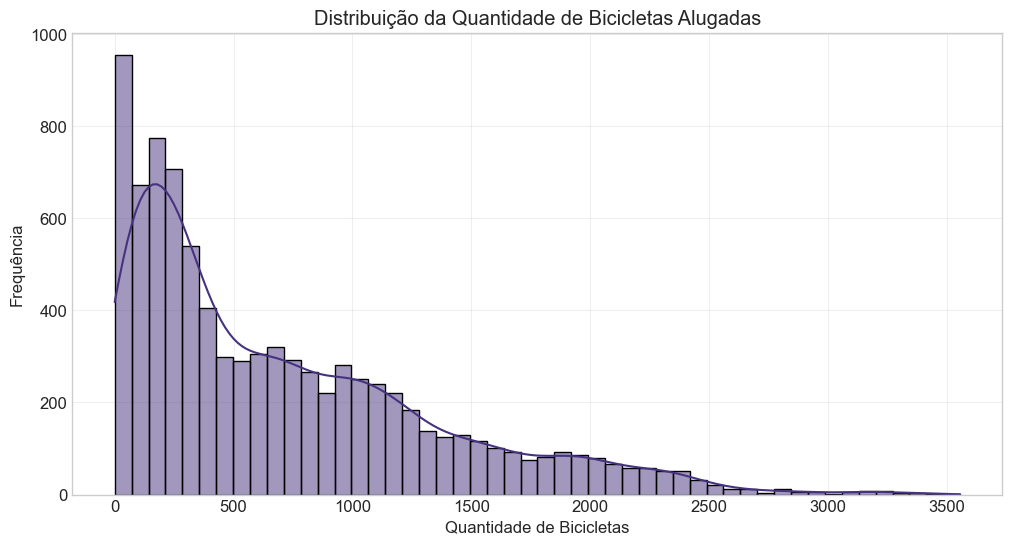

Estatísticas da variável 'Rented Bike Count':
Mínimo: 0
Máximo: 3556
Média: 704.60
Mediana: 504.5
Desvio padrão: 645.00


In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Rented Bike Count'], kde=True, bins=50)
plt.title('Distribuição da Quantidade de Bicicletas Alugadas')
plt.xlabel('Quantidade de Bicicletas')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

print("Estatísticas da variável 'Rented Bike Count':")
print(f"Mínimo: {df['Rented Bike Count'].min()}")
print(f"Máximo: {df['Rented Bike Count'].max()}")
print(f"Média: {df['Rented Bike Count'].mean():.2f}")
print(f"Mediana: {df['Rented Bike Count'].median()}")
print(f"Desvio padrão: {df['Rented Bike Count'].std():.2f}")

---

# Análise Temporal

A análise temporal foi realizada para identificar padrões de comportamento no aluguel de bicicletas ao longo do tempo, como variações por hora do dia, dia da semana, mês e estação do ano. Esses padrões ajudam a compreender a demanda em diferentes momentos, orientando decisões operacionais e estratégicas, como alocação de frotas e planejamento de manutenção. Além disso, a análise temporal fundamenta a criação de variáveis preditivas mais robustas, como indicadores de fim de semana, estações do ano e variáveis cíclicas, que enriquecem a modelagem e melhoram o desempenho dos algoritmos de previsão.

---

## Quantidade de Bicicletas por Hora do Dia

Para investigar como a demanda por bicicletas varia ao longo do dia, utilizei um gráfico de boxplot, que agrupa os registros de `Rented Bike Count` para cada hora (de 0 a 23). Este tipo de visualização é excelente para identificar padrões, como horários de pico, e entender a dispersão dos dados em cada período.

**Análise do Gráfico:**

O gráfico de boxplot acima nos permite visualizar claramente a distribuição da quantidade de bicicletas alugadas para cada hora do dia. Algumas observações importantes incluem:

* **Picos de Demanda Identificados:** Observamos dois períodos principais de alta demanda:
    * **Pico da Manhã:** Concentrado entre as **7h e 9h**, com as **8h** se destacando. Este padrão sugere um uso intenso para deslocamentos matinais (ida ao trabalho/estudo).
    * **Pico da Tarde/Noite:** Um pico ainda mais expressivo ocorre entre as **17h e 19h**, sendo as **18h** o horário com a mediana mais alta e também com grande variabilidade, indicando o principal horário de retorno.
* **Períodos de Baixa Demanda:** Durante a **madrugada (aproximadamente de 0h às 5h)**, a quantidade de aluguéis é consistentemente muito baixa, com pouca variação.
* **Variação durante o Dia:** Os horários de pico não apenas apresentam medianas mais altas, mas também uma maior dispersão nos dados (caixas mais longas e presença de *outliers* – pontos fora do padrão), indicando que, embora a demanda seja geralmente alta nesses horários, ela pode variar bastante de um dia para o outro.
* **Horários Intermediários:** Durante o meio do dia (entre os picos), a demanda se mantém em níveis moderados.

Essa análise horária é fundamental para entender o comportamento dos usuários ao longo do dia. Identificar esses picos e vales de demanda permite otimizar a logística de distribuição das bicicletas, garantindo disponibilidade nos locais e horários certos, e, consequentemente, melhorar a experiência do serviço para os cidadãos de Seul.

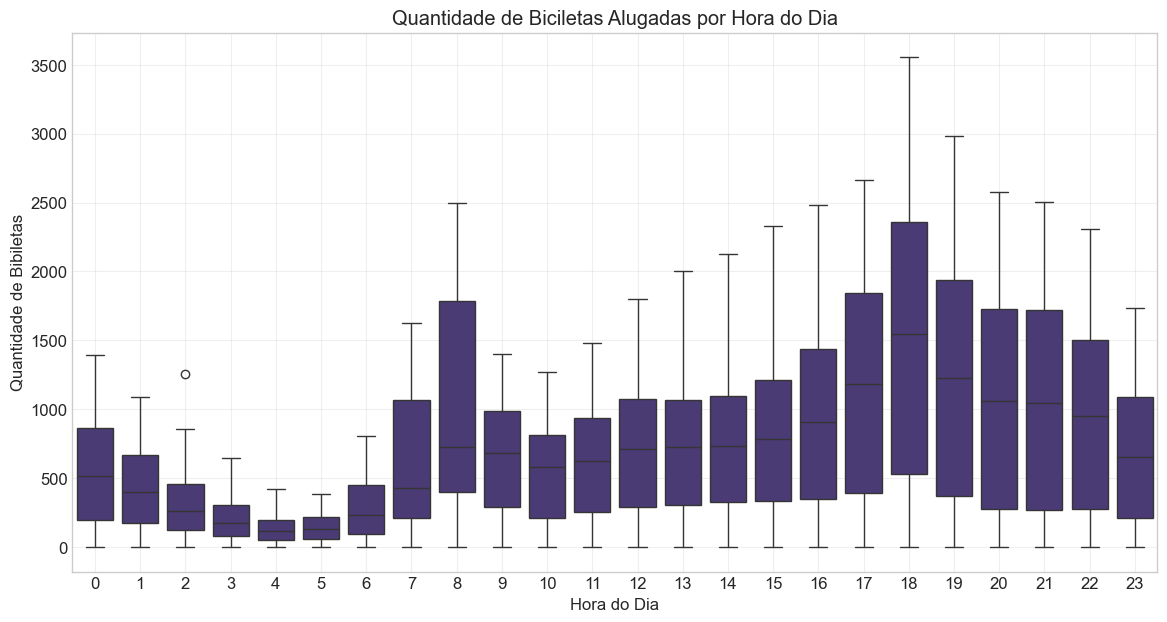

In [14]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Hour', y='Rented Bike Count', data=df)
plt.title('Quantidade de Biciletas Alugadas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Bibiletas')
plt.grid(True, alpha=0.3)
plt.show()

---

## Quantidade de Bicicletas por Dia da Semana

O boxplot da Quantidade de Bicicletas Alugadas por Dia da Semana foi utilizado para identificar variações no uso das bicicletas entre os dias úteis e os finais de semana. Esta análise é fundamental para entender o comportamento dos usuários em relação à rotina semanal.

**Análise do Gráfico:**

O gráfico mostra a distribuição do número de bicicletas alugadas para cada dia da semana (onde, comumente, 0 pode representar Segunda-feira e 6, Domingo). Algumas observações importantes são:

* **Dias Úteis:**
    * A mediana da quantidade de bicicletas alugadas parece ser relativamente estável durante os dias úteis, embora cada dia tenha sua própria distribuição e variabilidade.
    * Nota-se uma dispersão considerável nos dados (representada pelo tamanho das "caixas" e pelos "bigodes" do boxplot), além da presença de *outliers* (valores atípicos) indicando dias com aluguéis bem acima do normal.
* **Fim de Semana:**
    * O **Sábado** tende a apresentar uma mediana de aluguéis que pode ser comparável ou até um pouco superior à de alguns dias úteis, também com uma variabilidade significativa e picos de demanda (outliers).
    * O **Domingo**, em contraste, parece ter uma mediana de aluguéis um pouco inferior à do sábado e, possivelmente, a alguns dias da semana.
* **Padrão Geral de Variabilidade:** Todos os dias da semana exibem uma quantidade notável de *outliers* na extremidade superior. Isso sugere que, independentemente do dia, ocorrem circunstâncias ou períodos específicos que levam a um volume de aluguéis excepcionalmente alto.

Compreender essas diferenças na demanda ao longo da semana é crucial. Essa análise revela quais dias apresentam maior ou menor volume de uso, auxiliando no planejamento operacional e estratégico. Por exemplo, permite uma melhor alocação de bicicletas e recursos, além de embasar campanhas promocionais direcionadas para dias ou períodos específicos, visando otimizar o serviço.

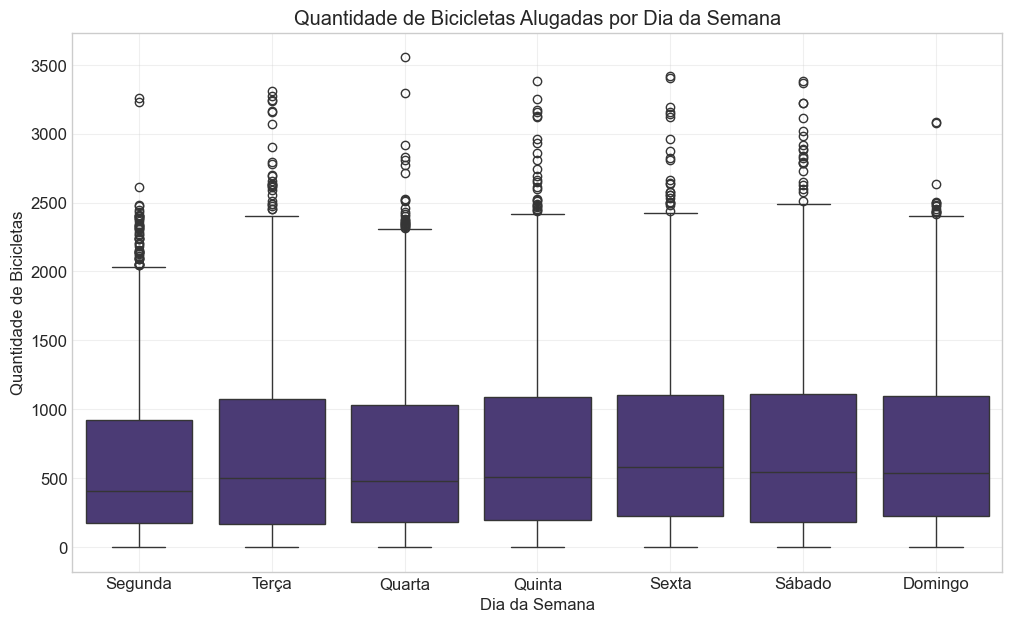

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Weekday', y='Rented Bike Count', data=df)
plt.title('Quantidade de Bicicletas Alugadas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Bicicletas')
plt.xticks(range(7), ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.grid(True, alpha=0.3)
plt.show()

---

## Quantidade de Biciletas Alugadas por Mês.

Para investigar a variação sazonal com maior detalhe e identificar nuances dentro de cada estação, utilizei o boxplot da Quantidade de Bicicletas Alugadas (`Rented Bike Count`) por Mês. Esta análise mais granular é importante para identificar os meses exatos de transição, picos e vales de demanda, o que geralmente reflete influências climáticas mais pontuais, períodos de férias ou outros eventos sazonais específicos de cada mês.

**Análise do Gráfico:**

O gráfico ilustra a distribuição do `Rented Bike Count` para cada mês do ano (1 para Janeiro, 12 para Dezembro). A análise visual revela um padrão sazonal bastante claro e significativo, complementando a visão por estação:

* **Meses de Baixa Demanda (Inverno):** Os meses de **Janeiro (1), Fevereiro (2) e Dezembro (12)** consistentemente apresentam as medianas mais baixas de aluguéis e uma menor dispersão nos dados. Isso indica uma demanda significativamente reduzida durante o período mais frio do ano.
* **Meses de Crescimento (Primavera):** A partir de **Março (3)**, observamos um aumento progressivo na quantidade de bicicletas alugadas, com **Abril (4) e Maio (5)** mostrando um crescimento robusto na mediana e na variabilidade da demanda, à medida que as condições climáticas melhoram.
* **Meses de Alta Demanda (Verão):** O pico de aluguéis ocorre claramente nos meses de verão, especialmente em **Junho (6), Julho (7) e Agosto (8)**. Estes meses exibem as maiores medianas e também uma grande dispersão (incluindo muitos *outliers* com valores altos), o que sugere uma demanda elevada e também dias com procura excepcionalmente alta.
* **Meses de Declínio (Outono):** A demanda começa a diminuir a partir de **Setembro (9)**. Embora **Setembro e Outubro (10)** ainda mantenham níveis de aluguel consideravelmente altos, **Novembro (11)** já mostra uma queda mais acentuada, fazendo a transição para os meses de menor atividade do inverno.

Compreender essa variação mensal detalhada é essencial. Com essa informação refinada, é possível **ajustar taticamente as estratégias de operação** (como a alocação precisa de bicicletas semana a semana), planejar manutenções preventivas para os meses exatos de menor uso e direcionar campanhas de marketing mais específicas e eficazes, otimizando a resposta às flutuações de demanda dos usuários ao longo do ano.

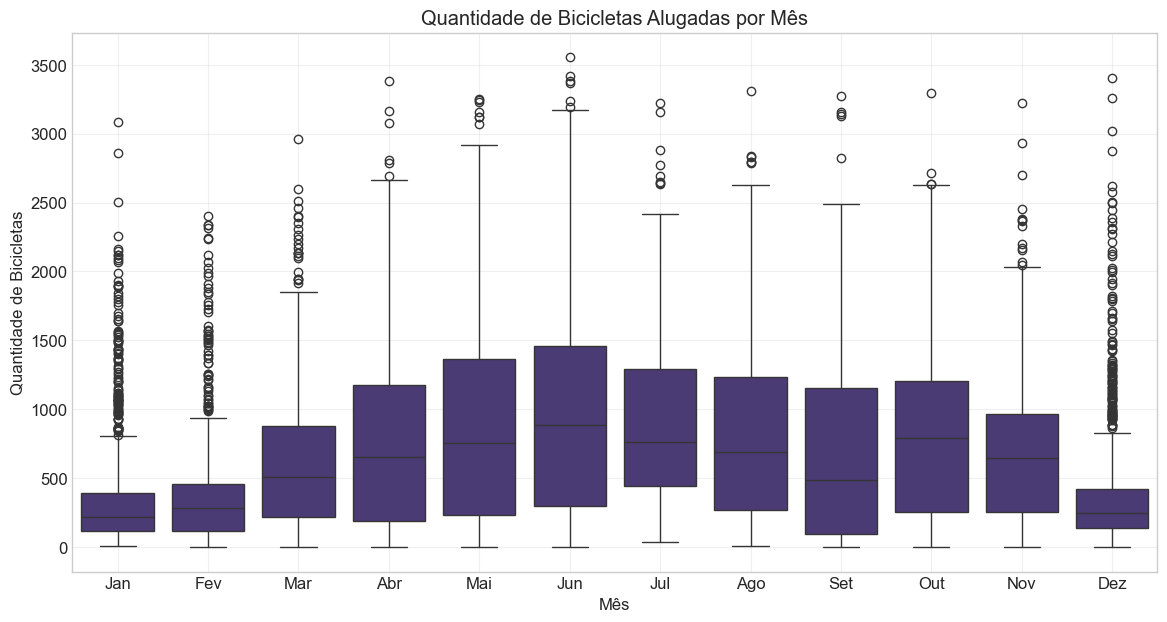

In [16]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='Rented Bike Count', data=df)
plt.title('Quantidade de Bicicletas Alugadas por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Bicicletas')
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True, alpha=0.3)
plt.show()

---

## Quantidade de Biciletas por Estação do Ano

Para avaliar o impacto das **grandes estações do ano** no uso das bicicletas, gerei um boxplot da Quantidade de Bicicletas Alugadas (`Rented Bike Count`) agrupado por `Season_Name` (Inverno, Primavera, Verão, Outono). Esta análise é crucial para entender como as macrotendências climáticas e os padrões de comportamento típicos de cada estação influenciam a demanda de forma geral.

**Análise do Gráfico:**

O gráfico de boxplot ilustra de forma clara a variação na demanda por bicicletas ao longo das quatro estações do ano:

* **Inverno:** Destaca-se como a estação com a **menor demanda**. A mediana de aluguéis é visivelmente mais baixa e os dados são mais concentrados em valores menores, refletindo um uso consistentemente reduzido durante os meses mais frios.
* **Primavera:** Apresenta um **aumento significativo** na quantidade de bicicletas alugadas em comparação com o inverno. Tanto a mediana quanto a dispersão dos dados (tamanho da "caixa" e "bigodes") são maiores, indicando uma retomada no uso com a melhora das condições climáticas.
* **Verão:** É claramente a estação de **pico de demanda**. O verão exibe a mediana mais alta de aluguéis entre todas as estações. Além disso, a variabilidade é considerável, com uma ampla gama de valores e a presença de *outliers* (dias com aluguéis excepcionalmente altos).
* **Outono:** A demanda no outono permanece **bastante elevada**, com uma mediana e uma dispersão de dados muito próximas às observadas no verão. Os níveis de aluguel são significativamente superiores aos da primavera e, principalmente, aos do inverno.

Compreender este forte padrão sazonal agregado é fundamental. Ele fornece uma visão macro que permite ao serviço de aluguel de bicicletas **alinhar suas estratégias gerais** de operação, como planejamento de frota e grandes campanhas de marketing, com os ciclos anuais de demanda. A análise mensal seguinte detalhará ainda mais essas variações.

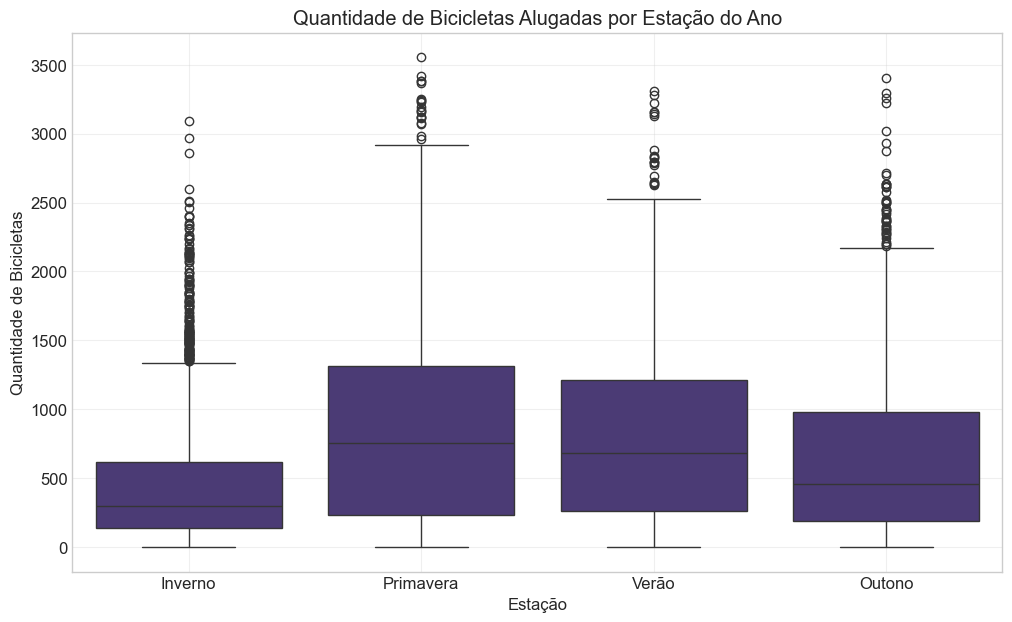

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Season_Name', y='Rented Bike Count', data=df, order=['Inverno', 'Primavera', 'Verão', 'Outono'])
plt.title('Quantidade de Bicicletas Alugadas por Estação do Ano')
plt.xlabel('Estação')
plt.ylabel('Quantidade de Bicicletas')
plt.grid(True, alpha=0.3)
plt.show()

---

## Análise de Variáveis Climáticas

A análise das variáveis climáticas foi realizada para entender como fatores ambientais influenciam a demanda por bicicletas. Observou-se a relação entre a quantidade de aluguéis e variáveis como temperatura, umidade, chuva e neve. As dispersões indicam que temperaturas amenas favorecem mais aluguéis, enquanto altos índices de umidade e precipitação tendem a reduzir a demanda. Além disso, os boxplots de chuva e neve reforçam que a presença desses fenômenos climáticos está associada a uma diminuição significativa no número de bicicletas alugadas, o que evidencia a importância do clima na previsão da demanda.

---

### Relação entre Temperatura e Quantidade de Bicicletas Alugadas

Para entender como a temperatura ambiente afeta diretamente o uso das bicicletas, gerei um **gráfico de dispersão** (scatter plot) que relaciona a `Temperature(°C)` com a `Rented Bike Count`. Este tipo de visualização é ideal para observar se existe uma tendência clara de aumento ou redução da demanda conforme a variação térmica.

**Análise do Gráfico:**

O gráfico de dispersão revela uma relação interessante e não estritamente linear entre a temperatura e a quantidade de bicicletas alugadas:

* **Temperaturas Baixas (aproximadamente abaixo de 5°C a 10°C):** Nestas condições, a quantidade de bicicletas alugadas é consistentemente baixa. O frio intenso parece ser um fator que desestimula fortemente o uso das bicicletas, com a maioria dos pontos concentrada na parte inferior do eixo Y.
* **Temperaturas Moderadas a Quentes (aproximadamente entre 10°C e 30°C):** À medida que a temperatura aumenta dentro desta faixa, observamos um aumento geral na demanda. É neste intervalo que ocorrem os maiores picos de aluguel de bicicletas. No entanto, é importante notar a grande dispersão dos pontos: mesmo em temperaturas agradáveis, outros fatores (como hora do dia, dia da semana, chuva, etc.) ainda influenciam significativamente a quantidade de aluguéis.
* **Temperaturas Muito Altas (acima de aproximadamente 30°C a 35°C):** Em temperaturas excessivamente altas, parece haver uma tendência de estagnação ou até uma leve redução na quantidade de aluguéis em comparação com a faixa ótima. Isso sugere que o calor extremo também pode desencorajar o uso das bicicletas.

Esta análise visual é essencial, pois confirma a forte influência da temperatura na demanda. Ela indica que não se trata de uma simples relação linear: existe uma faixa de temperatura "ideal" para o aluguel de bicicletas, e temperaturas extremas (tanto frias quanto quentes) tendem a impactar negativamente o uso do serviço. Essa compreensão é valiosa para identificar faixas de temperatura que favorecem ou inibem o aluguel, o que pode ser usado em modelos preditivos e no planejamento operacional.

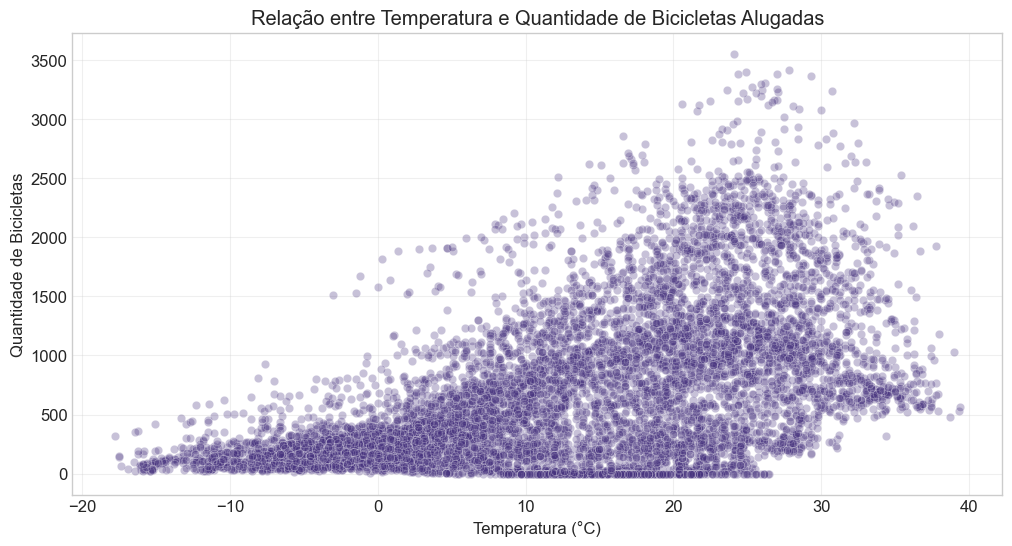

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df, alpha=0.3)
plt.title('Relação entre Temperatura e Quantidade de Bicicletas Alugadas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Quantidade de Bicicletas')
plt.grid(True, alpha=0.3)
plt.show()

---

### Relação entre Umidade e Quantidade de Bicicletas Alugadas

A umidade relativa do ar é outro fator climático que pode impactar o conforto térmico e, consequentemente, influenciar a decisão das pessoas de utilizar bicicletas. Para investigar essa relação, gerei um gráfico de dispersão (scatter plot) entre a `Humidity(%)` e a `Rented Bike Count`. O objetivo é identificar se existe uma tendência de diminuição da demanda em condições de umidade elevada, que podem tornar a atividade física ao ar livre mais desconfortável.

**Análise do Gráfico:**

O gráfico de dispersão nos permite visualizar como a quantidade de bicicletas alugadas se comporta em diferentes níveis de umidade:

* **Tendência Geral Observada:** Embora não seja uma relação linear forte, o gráfico sugere uma **leve tendência negativa** entre a umidade e o número de bicicletas alugadas. Isso significa que, à medida que a umidade aumenta, o volume máximo de aluguéis tende a ser um pouco menor.
* **Níveis de Umidade Baixa a Moderada (aproximadamente 0% a 70%):** Nesta faixa, o dataset mostra que é possível atingir os picos mais altos de aluguel de bicicletas. No entanto, a dispersão dos pontos é grande, indicando que, mesmo com umidade favorável, outros fatores também influenciam fortemente a demanda.
* **Níveis de Umidade Elevada (acima de 70% a 80%):** Quando a umidade se torna muito alta, observamos que os picos de demanda (valores muito altos de `Rented Bike Count`) se tornam menos frequentes e menos intensos. A maior concentração de pontos tende a ocorrer em contagens de aluguel mais baixas.

Essa análise indica que, embora a umidade possa não ser um fator tão determinante quanto a temperatura em seus extremos, níveis muito elevados de umidade relativa do ar parecem, de fato, estar associados a uma ligeira redução no uso de bicicletas. Essa percepção é valiosa, pois o conforto térmico, influenciado pela umidade, é um componente importante na decisão de realizar atividades ao ar livre.

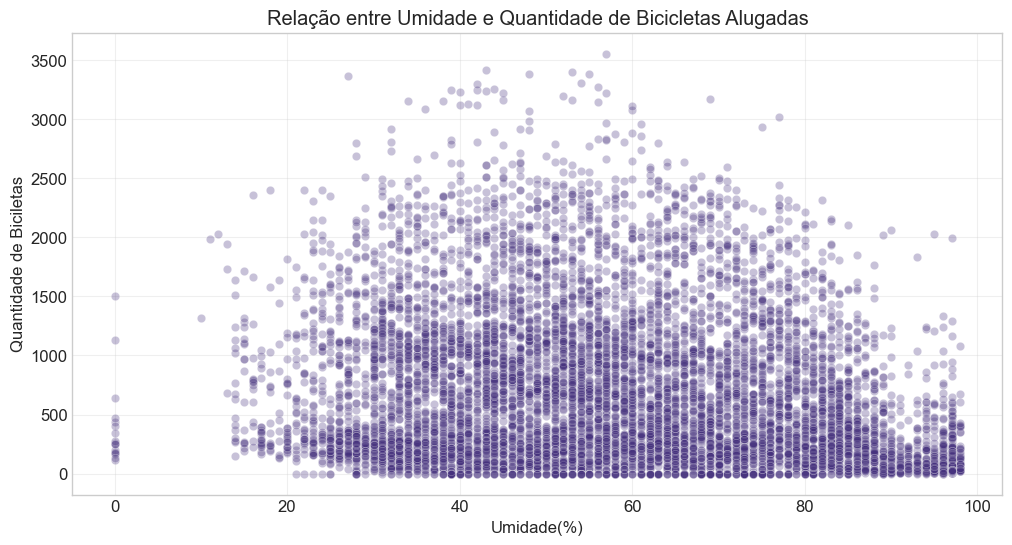

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=df, alpha=0.3)
plt.title('Relação entre Umidade e Quantidade de Bicicletas Alugadas')
plt.xlabel('Umidade(%)')
plt.ylabel('Quantidade de Biciletas')
plt.grid(True, alpha=0.3)
plt.show()

---

### Relação entre Chuva e Quantidade de Bicicletas

A presença de chuva é, intuitivamente, um dos fatores climáticos mais relevantes que podem afetar o uso de bicicletas. Para quantificar essa relação, gerei um gráfico de dispersão (scatter plot) comparando a `Rainfall(mm)` (precipitação em milímetros) com a `Rented Bike Count` (quantidade de bicicletas alugadas). O objetivo principal desta análise é avaliar se há uma tendência clara de queda nos aluguéis conforme aumenta o volume de precipitação, considerando que dias chuvosos costumam ser menos propícios para este tipo de transporte.

**Análise do Gráfico:**

O gráfico de dispersão ilustra de forma bastante evidente o impacto da chuva na demanda por bicicletas:

* **Ausência de Chuva (`Rainfall(mm) = 0`):** A grande maioria dos pontos de dados está concentrada onde a precipitação é zero. Nestas condições (sem chuva), observamos a maior amplitude na quantidade de bicicletas alugadas – desde valores muito baixos até os picos mais altos de demanda registrados no dataset. Isso sugere que, na ausência de chuva, outros fatores (como temperatura, hora, dia da semana) são os principais moduladores da demanda.
* **Presença de Chuva (`Rainfall(mm) > 0`):** O efeito da chuva é notavelmente negativo e pronunciado. Assim que há qualquer registro de precipitação, mesmo que em volumes pequenos (valores de `Rainfall(mm)` ligeiramente acima de zero), a quantidade de bicicletas alugadas cai drasticamente. A vasta maioria dos pontos com chuva está agrupada em níveis muito baixos de `Rented Bike Count`.
* **Impacto do Volume de Chuva:** Embora o gráfico mostre menos ocorrências de chuvas intensas, a tendência é clara: a presença de chuva, independentemente do volume exato (dentro do observado), está associada a uma demanda significativamente reduzida. Não se observa um grande número de aluguéis quando está chovendo.

Esta análise confirma que a chuva atua como um forte desincentivo ao uso de bicicletas. A queda abrupta na demanda assim que a chuva começa é um insight crucial para a modelagem preditiva, indicando que a variável `Rainfall(mm)` (ou uma variável binária derivada como `Has_Rain`) provavelmente terá um peso importante nas previsões. Compreender essa relação é vital para a gestão da mobilidade urbana por bicicleta.

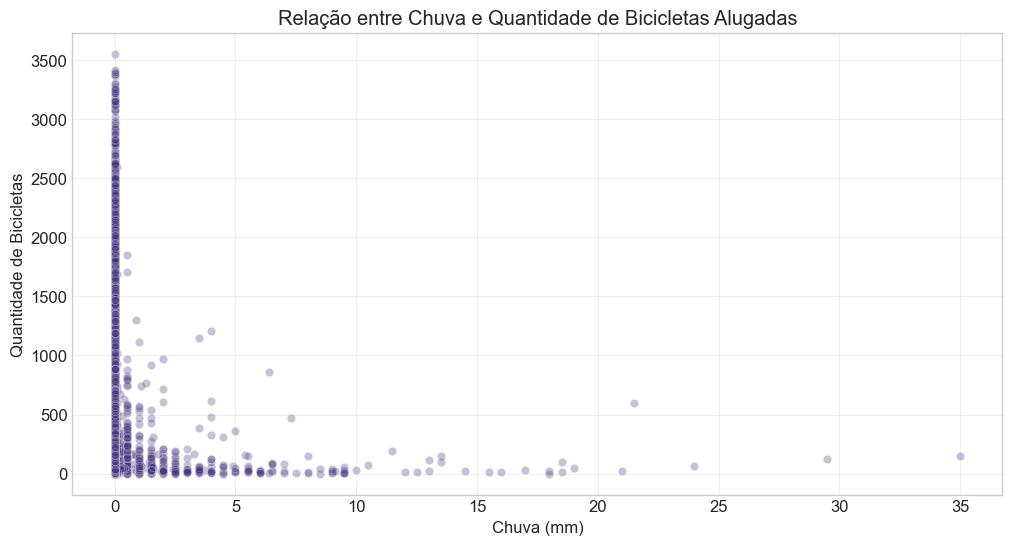

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rainfall(mm)', y='Rented Bike Count', data=df, alpha=0.3)
plt.title('Relação entre Chuva e Quantidade de Bicicletas Alugadas')
plt.xlabel('Chuva (mm)')
plt.ylabel('Quantidade de Bicicletas')
plt.grid(True, alpha=0.3)
plt.show()

---

### Impacto da Chuva nos Aluguéis de Bicicletas

Para visualizar de forma direta e clara como a simples ocorrência de chuva influencia a quantidade de bicicletas alugadas, analisei o boxplot da `Rented Bike Count` agrupado pela variável binária `Has_Rain` (onde '0' indica ausência de chuva e '1' indica presença de chuva). Este tipo de comparação é fundamental para confirmar o impacto de condições climáticas adversas.

**Análise do Gráfico:**

O gráfico de boxplot demonstra de maneira inequívoca o forte impacto da chuva na demanda por bicicletas:

* **Dias Sem Chuva (`Has_Rain = 0`):**
    * A mediana da quantidade de bicicletas alugadas é significativamente **mais alta**.
    * Observa-se uma **maior dispersão** nos dados, representada por uma "caixa" (intervalo interquartil) mais longa e "bigodes" mais estendidos. Isso indica que, na ausência de chuva, a demanda pode variar consideravelmente, atingindo desde níveis moderados até picos elevados de aluguel, como evidenciado pelos numerosos *outliers* na parte superior.
* **Dias Com Chuva (`Has_Rain = 1`):**
    * O cenário é drasticamente diferente. A mediana de aluguéis **cai para valores muito baixos**.
    * A "caixa" do boxplot fica extremamente **comprimida e próxima de zero**, indicando que a demanda é consistentemente baixa e apresenta pouquíssima variação quando está chovendo.
    * Os *outliers*, embora possam existir, são muito menos frequentes e representam contagens de aluguel consideravelmente menores do que nos dias sem chuva.

Esta visualização reforça de maneira contundente a importância de considerar as variáveis climáticas na modelagem da demanda. A simples presença de chuva atua como um fator fortemente limitante para o uso de bicicletas, reduzindo significativamente tanto o volume médio de aluguéis quanto a variabilidade da demanda.

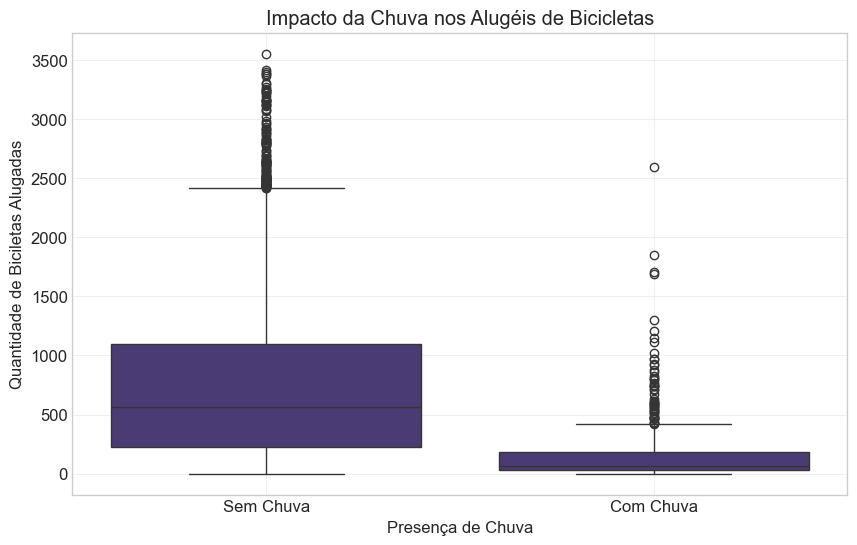

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has_Rain', y='Rented Bike Count', data=df)
plt.title('Impacto da Chuva nos Alugéis de Bicicletas')
plt.xlabel('Presença de Chuva')
plt.ylabel('Quantidade de Biciletas Alugadas')
plt.xticks([0, 1], ['Sem Chuva', 'Com Chuva'])
plt.grid(True, alpha=0.3)
plt.show()

---

### Impacto da Neve nos Alugués de Bicicleta

Assim como a chuva, a ocorrência de neve é uma condição climática que intuitivamente impacta negativamente o uso de bicicletas. Para confirmar e visualizar essa relação, analisei o boxplot da `Rented Bike Count` agrupado pela variável binária `Has_Snow` (onde '0' indica ausência de neve e '1' indica sua presença).

**Análise do Gráfico:**

A análise do boxplot revela um impacto ainda mais pronunciado da neve nos aluguéis, quando comparada com outras condições climáticas:

* **Dias Sem Neve (`Has_Snow = 0`):**
    * Nestas condições, a `Rented Bike Count` apresenta uma mediana significativamente mais elevada e uma grande variabilidade, com aluguéis atingindo desde níveis moderados até os picos mais altos observados no dataset. Isso é evidenciado pela caixa mais ampla e pela presença de múltiplos *outliers* superiores.
* **Dias Com Neve (`Has_Snow = 1`):**
    * A presença de neve resulta em uma **queda acentuada e drástica** na quantidade de bicicletas alugadas.
    * A **mediana dos aluguéis é consideravelmente menor**, situando-se muito próxima de zero.
    * A **dispersão dos dados também se reduz drasticamente**; a "caixa" do boxplot para dias com neve é extremamente pequena e achatada na base do gráfico, indicando que os poucos aluguéis que ocorrem são invariavelmente baixos e com pouca variação.
    * Praticamente não se observam *outliers* significativos em dias com neve.

Isso sugere que a presença de neve representa uma condição climática adversa particularmente significativa, desestimulando fortemente o uso do serviço de aluguel de bicicletas, mais ainda do que a chuva isolada. Essa informação é crucial para ajustar previsões de demanda de forma realista em regiões ou períodos com possibilidade de neve, pois indica uma redução substancial na utilização esperada.

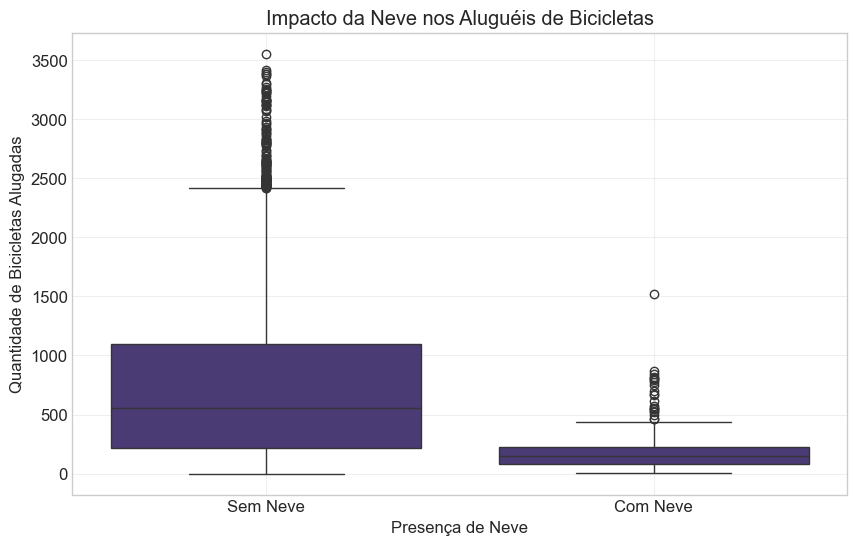

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has_Snow', y='Rented Bike Count', data=df)
plt.title('Impacto da Neve nos Aluguéis de Bicicletas')
plt.xlabel('Presença de Neve')
plt.ylabel('Quantidade de Bicicletas Alugadas')
plt.xticks([0, 1], ['Sem Neve', 'Com Neve'])
plt.grid(True, alpha=0.3)
plt.show()

---

## Análise de Correlação

A análise de correlação foi conduzida para identificar quais variáveis numéricas possuem maior influência sobre a quantidade de bicicletas alugadas. Foram selecionadas apenas colunas numéricas, e calculada a matriz de correlação de Pearson. Os resultados indicaram que variáveis como temperatura apresentam correlação positiva com os aluguéis, ou seja, quanto mais quente, maior tende a ser a demanda. Por outro lado, fatores como umidade, precipitação e presença de neve mostraram correlações negativas, sinalizando que essas condições climáticas desfavoráveis reduzem o número de aluguéis. O mapa de calor (heatmap) permitiu visualizar essas relações de forma clara, auxiliando na identificação de variáveis potencialmente relevantes para modelos preditivos e reforçando a influência direta de variáveis ambientais e temporais sobre o comportamento de uso do sistema.

**Lengenda Coeficiente de Correlação:**

Existem diferentes diretrizes para interpretar a magnitude do coeficiente de correlação de Pearson (r). Abaixo estão duas sugestões comuns:

**Sugestão de Cohen (1992):**

| Coeficiente (r) | Interpretação da Força |
| :-------------- | :--------------------- |
| `r = \|±0.10\|` | Correlação Fraca       |
| `r = \|±0.30\|` | Correlação Moderada    |
| `r = \|±0.50\|` | Correlação Forte       |

**Sugestão de Rumsey (2023) para tamanhos de efeito:**

| Coeficiente (r) | Interpretação da Relação Linear |
| :-------------- | :------------------------------ |
| `r = \|±1.00\|` | Perfeita                        |
| `r = \|±0.70\|` | Forte                           |
| `r = \|±0.50\|` | Moderada                        |
| `r = \|±0.30\|` | Fraca                           |
| `r = 0`         | Ausência de Relação Linear      |

---

### Correlação entre Variáveis

Para entender melhor as inter-relações entre as variáveis numéricas do nosso dataset e, principalmente, como elas se associam à quantidade de bicicletas alugadas (`Rented Bike Count`), utilizei um **mapa de calor (heatmap) de correlação**. Esta visualização é poderosa para identificar rapidamente a força e a direção das relações lineares entre pares de variáveis.

**Análise do Gráfico:**

A análise das correlações, evidenciada pelo mapa de calor, revelou quais fatores estão mais diretamente relacionados à demanda por bicicletas:

* Observou-se que variáveis como a **`Temperature(°C)`** (com uma correlação de aproximadamente **+0.54** com `Rented Bike Count`) e a **`Hour`** (cerca de **+0.41**) apresentam uma correlação positiva significativa. Isso indica que temperaturas mais amenas e determinados horários do dia tendem a favorecer um aumento no volume de aluguéis. A **`Solar Radiation (MJ/m2)`** também mostrou uma correlação positiva moderada (próxima de **+0.26**).

* Por outro lado, variáveis relacionadas a condições que podem ser percebidas como adversas, como **`Humidity(%)`** (correlação em torno de **-0.20**) e **`Rainfall(mm)`** (aproximadamente **-0.12**), apresentam correlação negativa com a quantidade de bicicletas alugadas, reforçando que o aumento dessas condições tende a reduzir a demanda.

* Também é interessante notar a forte correlação positiva entre **`Temperature(°C)`** e **`Dew point temperature(°C)`** (próxima de **+0.91**), o que é esperado dada a relação física entre essas duas métricas climáticas.

O mapa de calor, com sua representação visual por cores e os valores numéricos dos coeficientes de correlação, facilita a identificação dessas conexões. Compreender essas relações é fundamental não apenas para a seleção de variáveis relevantes na etapa de modelagem preditiva, mas também para confirmar hipóteses sobre os fatores que impulsionam a demanda por bicicletas em Seul.

,Variável,Correlação com Rented Bike Count
0,Temperature(°C),0.538558
1,Temp_Category,0.523098
2,Hour,0.410257
3,Dew point temperature(°C),0.379788
4,Solar Radiation (MJ/m2),0.261837
5,Visibility (10m),0.199280
6,Wind speed (m/s),0.121108
7,Year,0.114473
8,Season,0.082012
9,Day_of_Year,0.073113


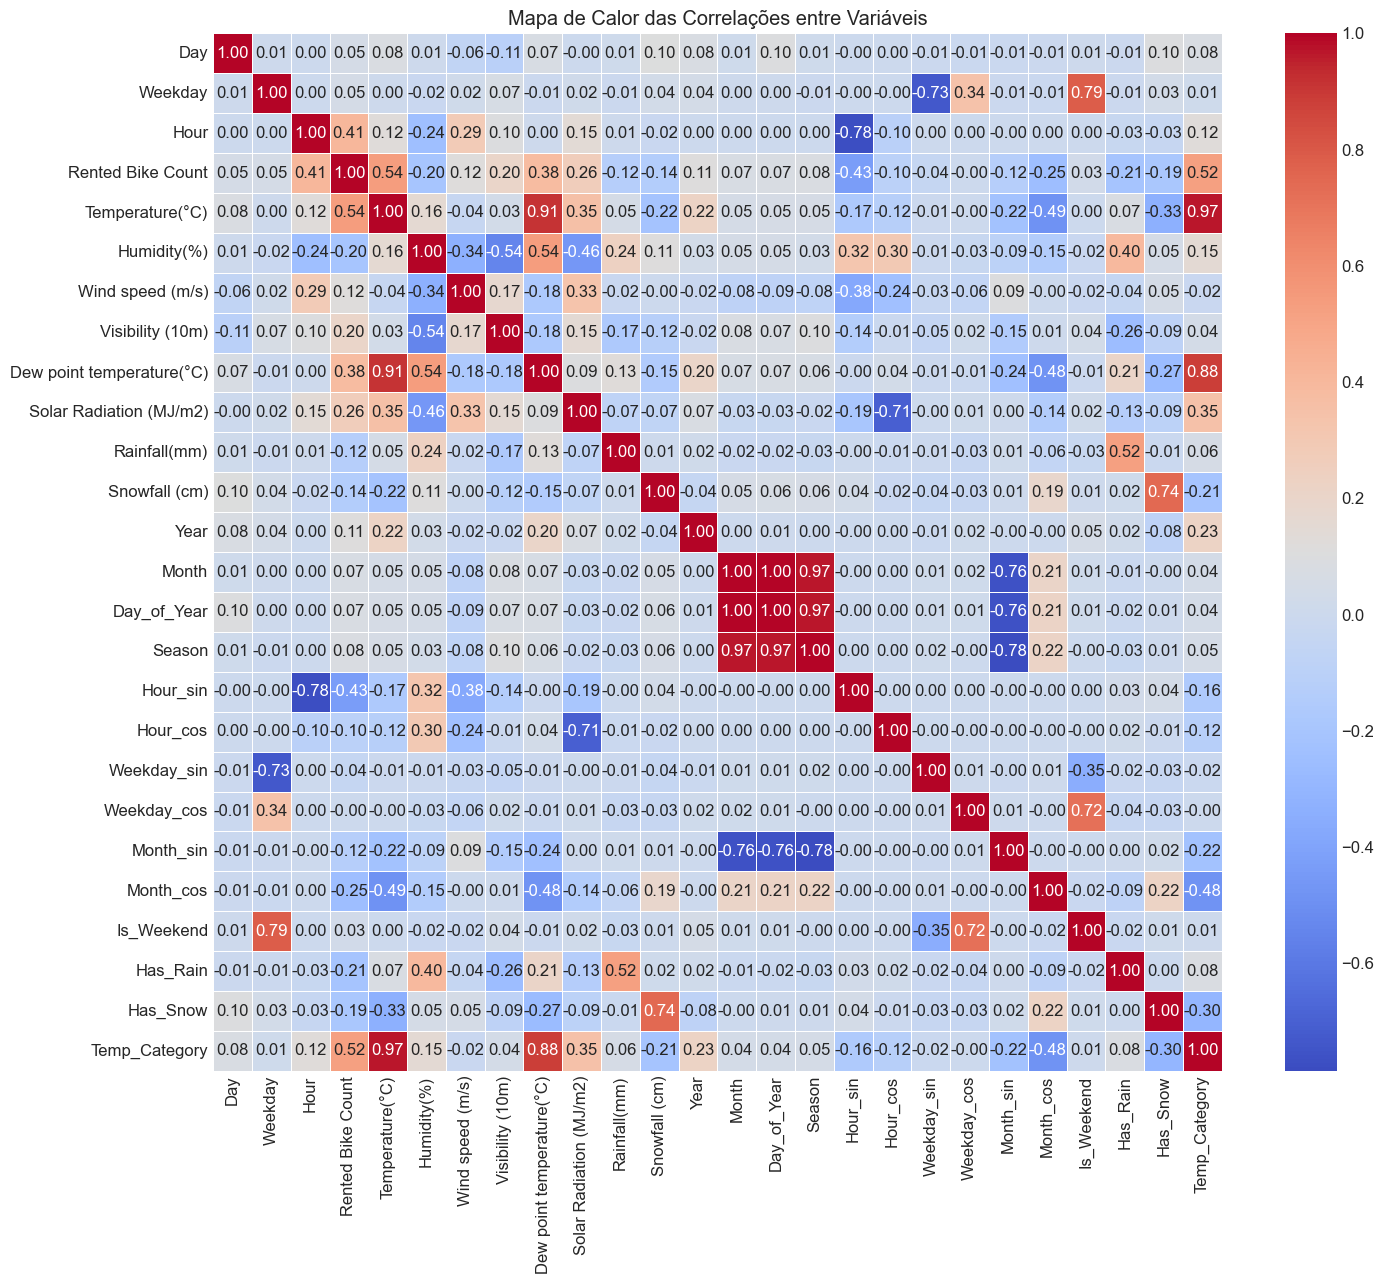

In [23]:
colunas_numericas = df.select_dtypes(include=['number']).columns
correlacoes = df[colunas_numericas].corr()

correlacoes_alvo = correlacoes['Rented Bike Count'].drop('Rented Bike Count').sort_values(ascending=False)

tabela_correlacoes = pd.DataFrame(correlacoes_alvo).reset_index()
tabela_correlacoes.columns = ['Variável', 'Correlação com Rented Bike Count']
display(tabela_correlacoes)


plt.figure(figsize=(15, 13))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações entre Variáveis')
plt.tight_layout()
plt.show()

---

## Análise de Interações entre Variáveis

A análise das interações entre variáveis explorou como diferentes fatores combinados influenciam a demanda por bicicletas. Observou-se a média de aluguéis por hora do dia, diferenciando dias úteis e fins de semana, revelando padrões distintos de uso conforme o dia da semana. O heatmap da média de aluguéis por hora e dia da semana evidenciou variações temporais detalhadas, permitindo identificar horários e dias com maior concentração de aluguéis. Além disso, a análise por categoria de temperatura mostrou que a demanda varia significativamente conforme a faixa térmica, reforçando a importância da temperatura como fator determinante no comportamento dos usuários. Esses insights são fundamentais para modelagens mais precisas, considerando a interação entre variáveis temporais e climáticas na previsão da demanda.

---

### Média de Aluguéis por Hora do Dia, Separado Por Dia Útil vs Final de Semana

Para aprofundar a compreensão dos padrões de uso, analisei a média de bicicletas alugadas (`Rented Bike Count`) para cada hora do dia, separando os dados entre "Dias Úteis" e "Finais de Semana". Esta diferenciação é crucial, pois os motivos e horários de deslocamento costumam variar significativamente entre esses dois períodos.

**Análise do Gráfico:**

O gráfico de linhas ilustra claramente os padrões distintos de uso das bicicletas:

* **Durante os Dias Úteis:**
    * O gráfico evidencia picos de demanda muito pronunciados e bem definidos. Observa-se um **pico pela manhã**, atingindo o auge por volta das **8h** (com uma média que pode ultrapassar 1.200 aluguéis), e outro pico, frequentemente ainda mais acentuado, no **final da tarde, por volta das 18h** (também superando os 1.200 aluguéis em média).
    * Entre esses picos, durante o meio do dia, a demanda é consideravelmente menor, embora ainda presente.
    * Durante a madrugada e início da manhã (aproximadamente de 22h às 6h), a média de aluguéis é bastante baixa.
    * Este comportamento é característico do uso das bicicletas para **deslocamentos cotidianos**, como ir e voltar do trabalho ou local de estudo.

* **Durante os Finais de Semana:**
    * O padrão é notavelmente diferente. Não observamos os picos agudos da manhã e do final da tarde típicos dos dias úteis.
    * A demanda começa a crescer mais tarde, geralmente a partir das 9h ou 10h, e se concentra em um **platô mais amplo durante a tarde**, com o período de maior uso ocorrendo aproximadamente entre as **14h e 17h** (com uma média em torno de 800-900 aluguéis).
    * A queda na demanda ao final do dia também é mais gradual em comparação com os dias úteis.
    * Este perfil sugere um uso mais associado ao **lazer, atividades recreativas e passeios**, distribuído de forma mais contínua ao longo das horas de luz do dia e tarde.

Essa diferenciação clara nos padrões de uso é uma informação valiosa para o planejamento operacional do serviço. Ela permite, por exemplo, ajustar a disponibilidade e a realocação de bicicletas de forma distinta para dias úteis e finais de semana, otimizando a oferta para atender aos picos específicos de cada período e, assim, melhorar a experiência do usuário.

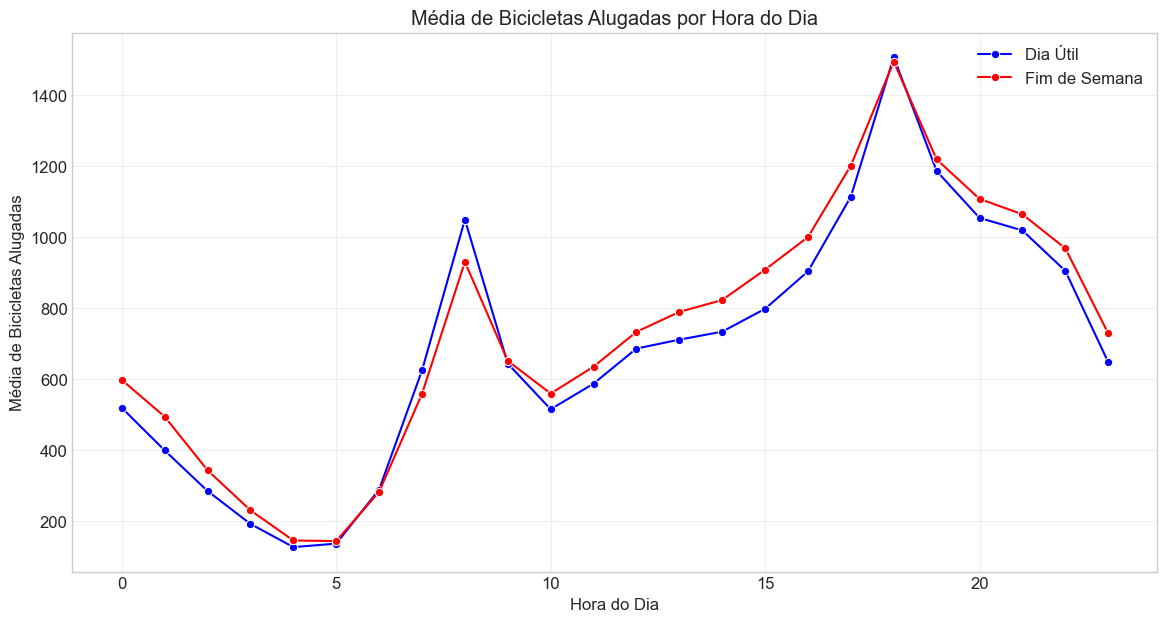

In [24]:
plt.figure(figsize=(14, 7))
sns.lineplot( x='Hour', y='Rented Bike Count', hue='Is_Weekend', data=df, errorbar=None,marker='o', palette={0: 'blue', 1: 'red'})
plt.title('Média de Bicicletas Alugadas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Média de Bicicletas Alugadas')
plt.legend(title='', labels=['Dia Útil', 'Fim de Semana'])
plt.grid(True, alpha=0.3)
plt.show()

---

### Média de Aluguéis por Hora e Dia da Semana 

Para obter uma visão combinada de como a demanda por bicicletas se comporta ao longo das horas do dia e dos diferentes dias da semana, utilizei um **heatmap (mapa de calor)**. Esta visualização representa a média de bicicletas alugadas (`Rented Bike Count`) através de cores, permitindo identificar rapidamente os períodos de maior e menor atividade.

**Análise do Gráfico:**

O mapa de calor revela variações claras e padrões distintos no uso das bicicletas ao longo da semana:

* **Dias Úteis:**
    * Observamos "manchas quentes" (cores mais intensas, indicando maior média de aluguéis) muito bem definidas, caracterizando os **picos de demanda**.
    * Um pico ocorre consistentemente pela manhã, por volta das **8h**.
    * Outro pico, geralmente ainda mais intenso, acontece no final da tarde, por volta das **18h**.
    * Estes picos são típicos do uso das bicicletas para **deslocamentos relacionados ao trabalho ou estudo**.
    * Fora desses horários (madrugada, meio do dia), a demanda é visivelmente menor, representada por cores mais frias.

* **Finais de Semana:**
    * O padrão de uso muda consideravelmente. Os picos agudos de deslocamento matutino e vespertino, característicos dos dias úteis, não são observados ou são muito menos pronunciados.
    * Em vez disso, a demanda nos finais de semana tende a ser mais **distribuída ao longo da tarde**. Observa-se uma atividade mais concentrada e elevada geralmente entre as **13h e 18h**, especialmente no sábado.
    * Embora a demanda durante a tarde do fim de semana possa ser robusta, a intensidade máxima média não costuma atingir os níveis vistos nos horários de pico dos dias úteis.
    * A atividade geralmente começa mais tarde pela manhã em comparação com os dias úteis.

Esta visualização combinada é extremamente útil, pois permite identificar com precisão os horários e dias de maior movimento. Esse conhecimento é fundamental para o planejamento operacional, como a otimização da disponibilidade e alocação das bicicletas, garantindo que o serviço atenda melhor à demanda específica de cada período da semana.

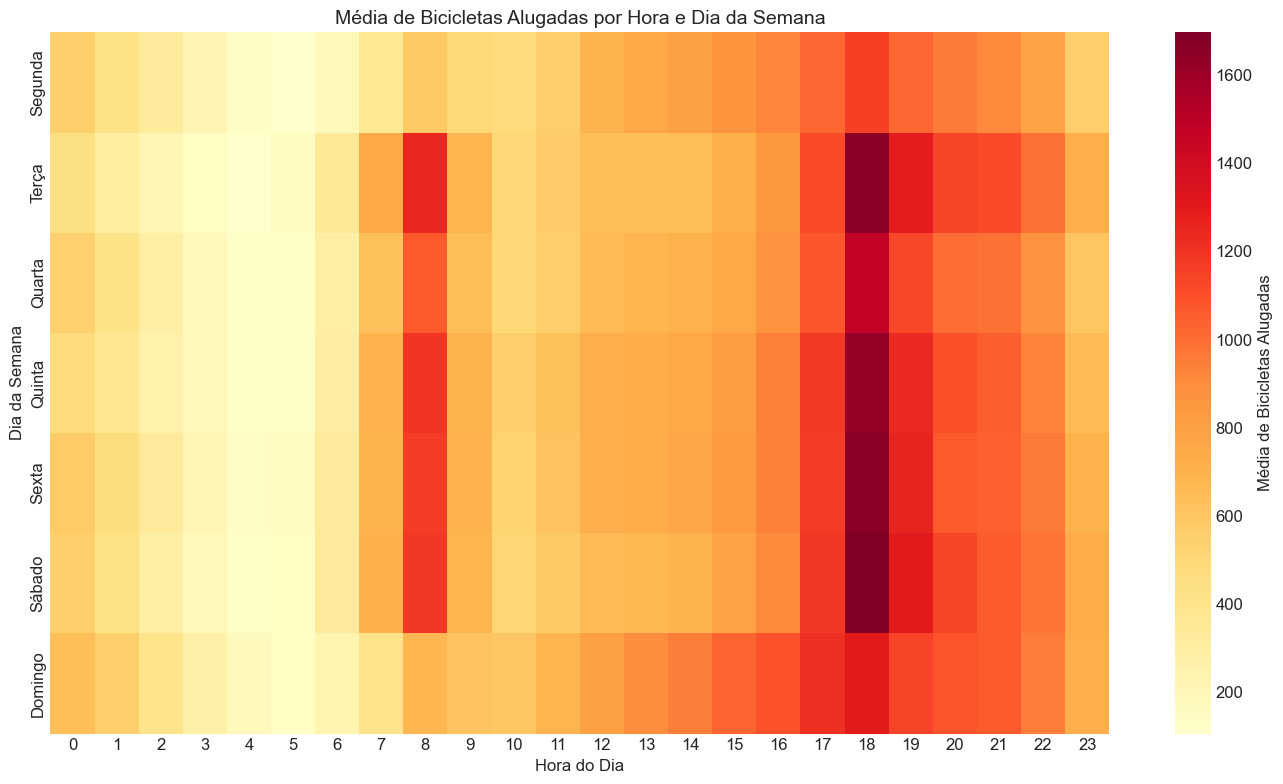

In [25]:
hour_weekday_heatmap = df.groupby(['Weekday', 'Hour'])['Rented Bike Count'].mean().unstack()
plt.figure(figsize=(14, 8))

heatmap = sns.heatmap(hour_weekday_heatmap, cmap='YlOrRd', annot=False, cbar_kws={'label': 'Média de Bicicletas Alugadas'})

plt.title('Média de Bicicletas Alugadas por Hora e Dia da Semana', fontsize=14)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Dia da Semana', fontsize=12)

plt.yticks(np.arange(7) + 0.5, ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])

plt.tight_layout()
plt.show()

---

### Quantidade de Bicicletas por Categoria de Temperatura

Para entender de forma mais segmentada como diferentes níveis de temperatura afetam o uso das bicicletas, analisei a `Rented Bike Count` agrupada por `Temp_Category_Name` (as categorias de temperatura que criei anteriormente: Muito Frio, Frio, Moderado, Quente, Muito Quente). O boxplot é uma excelente ferramenta para visualizar essas distribuições comparativamente.

**Análise do Gráfico:**

O gráfico de boxplot ilustra claramente como a quantidade de bicicletas alugadas varia conforme as diferentes faixas de temperatura:

* **Temperaturas Extremas:**
    * Na categoria **'Muito Frio (<0°C)'**, a mediana de aluguéis é visivelmente muito baixa, e a dispersão dos dados é mínima. Isso indica que o frio intenso reduz drasticamente a demanda.
    * Similarmente, na categoria **'Muito Quente (>30°C)'**, observamos uma queda na mediana dos aluguéis e uma menor variabilidade em comparação com temperaturas mais amenas, sugerindo que o calor excessivo também desencoraja o uso das bicicletas.

* **Temperaturas Favoráveis:**
    * A categoria **'Frio (0-10°C)'** já mostra um aumento considerável na mediana e na dispersão dos aluguéis em relação ao 'Muito Frio'.
    * As categorias **'Moderado (10-20°C)'** e, especialmente, **'Quente (20-30°C)'** são as que apresentam as **maiores medianas** e a maior dispersão de aluguéis. A faixa 'Quente (20-30°C)' se destaca com a maior atividade, indicando que estas são as condições térmicas preferenciais para o uso das bicicletas, onde também ocorrem os picos mais elevados de demanda (evidenciados pelos *outliers* superiores).

Esta análise por categorias de temperatura reforça a ideia de que existe uma "janela ótima" de temperatura para o aluguel de bicicletas. Condições de frio ou calor intensos atuam como fatores limitantes. Essa informação é relevante não apenas para entender o comportamento dos usuários, mas também para refinar modelos preditivos e ajustar estratégias de operação e marketing conforme as condições climáticas e as faixas de temperatura predominantes em diferentes períodos.


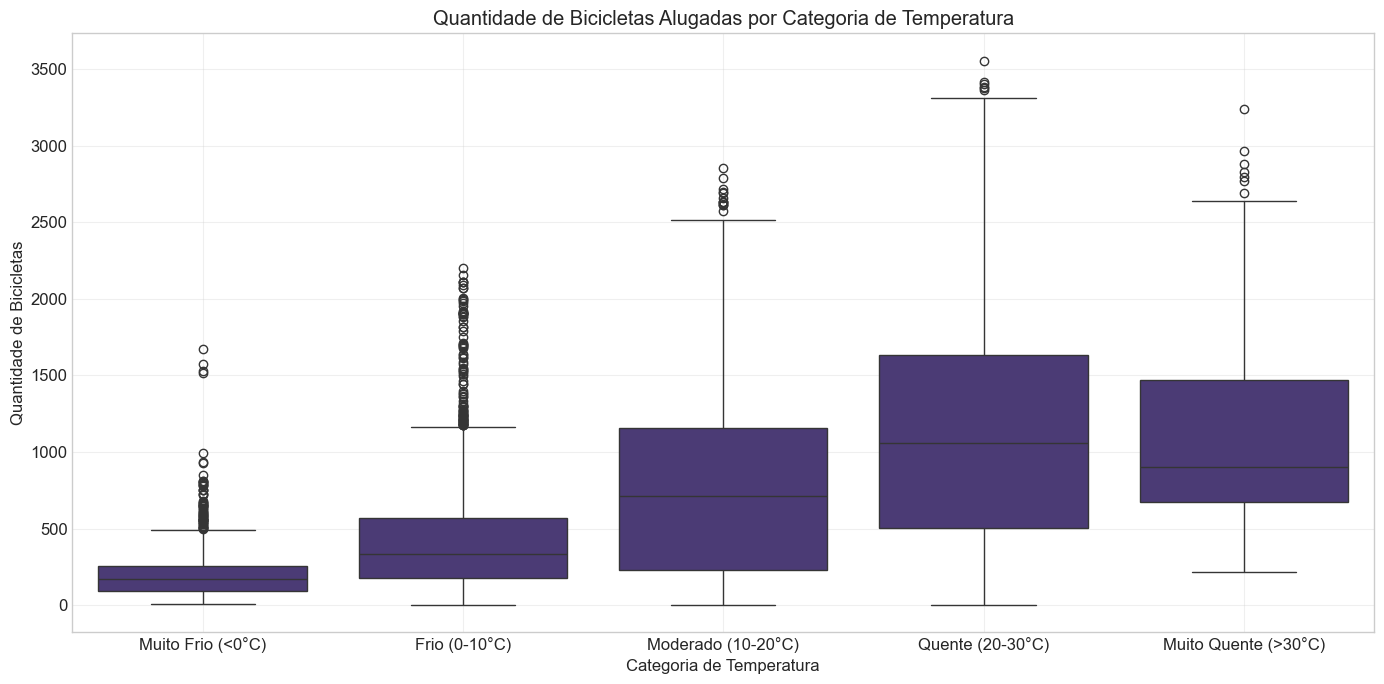

In [26]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Temp_Category_Name', y='Rented Bike Count', data=df)
plt.title('Quantidade de Bicicletas Alugadas por Categoria de Temperatura')
plt.xlabel('Categoria de Temperatura')
plt.ylabel('Quantidade de Bicicletas')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

## Análise de Componentes Principais (PCA)

A Análise de Componentes Principais (PCA) foi utilizada com o objetivo de reduzir a dimensionalidade do conjunto de dados climáticos, mantendo a maior parte da variância presente nas variáveis originais. Este método é especialmente útil para eliminar redundâncias entre variáveis altamente correlacionadas, facilitar a visualização dos dados em espaços de menor dimensão e preparar o conjunto para algoritmos de modelagem que se beneficiam de dados menos colineares.

Nesta etapa, foram selecionadas variáveis exclusivamente climáticas, como temperatura, umidade, velocidade do vento, visibilidade, entre outras. Após a padronização dos dados, aplicou-se o PCA, resultando em novos componentes principais que representam combinações lineares das variáveis originais.

---

### Seleção e Padronização

Antes de aplicar a Análise de Componentes Principais (PCA), selecionei um conjunto específico de **variáveis climáticas**. Estas incluem: temperatura, umidade, velocidade do vento, visibilidade, ponto de orvalho, radiação solar, chuva e neve. A escolha dessas variáveis se deu por sua influência direta e observada no comportamento dos usuários em relação ao aluguel de bicicletas.

Para que todas essas variáveis pudessem contribuir de forma equilibrada na análise do PCA, independentemente de suas unidades ou escalas originais (por exemplo, graus Celsius, percentual, m/s), apliquei a **padronização**. Utilizei o método `StandardScaler` do `scikit-learn`, que transforma os dados de cada variável para que apresentem **média zero e desvio padrão igual a um**.

Este passo de padronização é crucial, pois o PCA é sensível à variância dos dados. Sem ele, variáveis com magnitudes naturalmente maiores (como a visibilidade, que pode ter valores na casa dos milhares) poderiam dominar a análise, mascarando o efeito de outras variáveis igualmente importantes, mas com valores menores. A padronização garante uma representação mais fiel das relações subjacentes entre os diversos fatores climáticos.

In [27]:
pca_variaveis = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
            'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[pca_variaveis])

---

### Aplicação PCA

Após a padronização dos dados climáticos, apliquei a **Análise de Componentes Principais (_PCA_)**. Essa técnica estatística busca reduzir a dimensionalidade do conjunto de dados, ou seja, diminuir o número de variáveis, ao mesmo tempo em que tenta preservar a maior parte da variabilidade (informação) original. O PCA faz isso transformando as variáveis climáticas originais em um novo conjunto de variáveis não correlacionadas entre si, chamadas **componentes principais**. Cada um desses componentes é uma combinação linear das variáveis climáticas que utilizamos.

In [28]:
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

---

### Visualização da Variância Explicada

A visualização da variância explicada pelos componentes principais é uma etapa chave após a aplicação do PCA. Ela nos permite avaliar o quanto cada novo componente, derivado das variáveis climáticas originais, contribui individualmente para explicar a variabilidade total presente nos dados.

**Análise do Gráfico (Scree Plot):**

O gráfico conhecido como *scree plot*, ilustra dois aspectos importantes:

1.  **Variância Individual por Componente (Barras):**
    * Observa-se claramente que os **primeiros componentes principais concentram a maior parte da variância**. O primeiro componente (PC1) sozinho é responsável por explicar aproximadamente **35%** da variabilidade total dos dados climáticos.
    * O segundo componente (PC2) adiciona cerca de **20%** à explicação, e o terceiro (PC3) contribui com aproximadamente mais **15%**.
    * A partir do PC3/PC4, a contribuição individual de cada componente subsequente diminui notavelmente, o que é um comportamento típico do PCA.

2.  **Variância Acumulada (Linha Pontilhada):**
    * Esta linha indica a proporção total de informação (variância) que conseguimos preservar à medida que adicionamos mais componentes principais. Por exemplo:
        * Com os **3 primeiros componentes**, já capturamos cerca de **70%** da variância original das variáveis climáticas.
        * Utilizando **4 componentes**, esse valor sobe para aproximadamente **80%**.
        * Para alcançar o **limite de 95%** da variância explicada (indicado pela linha tracejada vermelha no gráfico como referência), seriam necessários aproximadamente **6 componentes principais**.

**Interpretação e Utilidade:**
Este gráfico é fundamental para tomar uma decisão informada sobre quantos componentes principais reter caso o objetivo seja reduzir a dimensionalidade. Por exemplo, se decidirmos que explicar 80% da variância é suficiente, poderíamos reduzir as 8 variáveis climáticas originais para apenas 4 componentes principais, simplificando o modelo sem uma perda excessiva de informação. A escolha do número de componentes é um equilíbrio entre a redução da complexidade e a retenção de informação relevante.

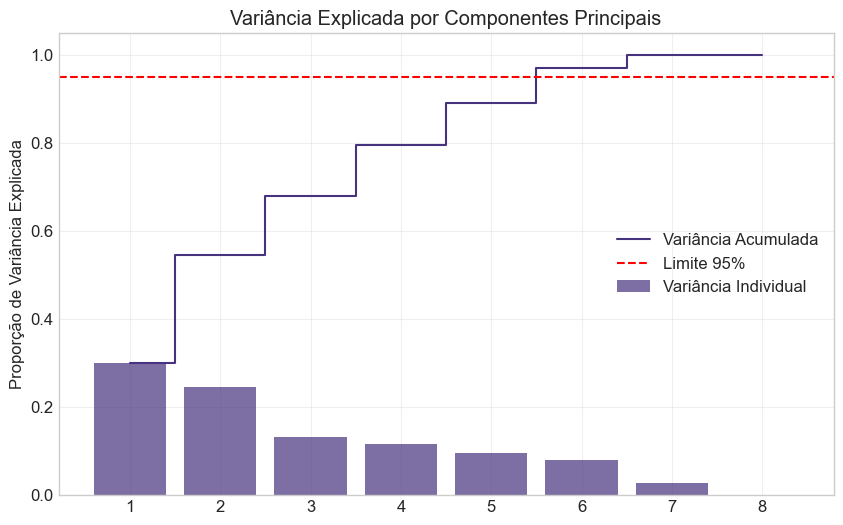

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len (explained_variance) + 1), explained_variance, alpha=0.7, label='Variância Individual')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Variância Acumulada')
plt.axhline(y=0.95, color='r', linestyle='--', label='Limite 95%')
plt.title('Variância Explicada por Componentes Principais')
plt.ylabel('Número de Componentes')
plt.ylabel('Proporção de Variância Explicada')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---

### Exibição dos Componentes Principais

A Análise de Componentes Principais (PCA) foi aplicada sobre as variáveis climáticas previamente padronizadas. O objetivo desta técnica é tanto reduzir a dimensionalidade dos dados (ou seja, o número de variáveis) quanto identificar padrões latentes que possam explicar a variabilidade climática de uma forma mais concisa. Ao invés de olharmos para todas as variáveis climáticas individualmente, os componentes principais nos dão uma visão resumida dessas relações.

Abaixo, descrevo a interpretação dos três primeiros componentes principais, que, como vimos no gráfico anterior de variância explicada, são os que mais contribuem para explicar a variação nos dados:

* **Primeiro Componente Principal (PC1):**
    Este componente é fortemente influenciado positivamente por `Dew point temperature(°C)` (com um peso de 0.55), `Humidity(%)` (peso 0.53) e `Temperature(°C)` (peso 0.39). Isso sugere que o PC1 representa uma dimensão claramente relacionada à **sensação térmica e à umidade do ambiente**. Ele resume os efeitos combinados de calor e umidade, sendo um fator relevante para entender o conforto (ou desconforto) climático.

* **Segundo Componente Principal (PC2):**
    O PC2 apresenta altas cargas (pesos) positivos para `Temperature(°C)` (0.54), `Solar Radiation (MJ/m2)` (0.52) e `Dew point temperature(°C)` (0.35), além de uma contribuição positiva de `Visibility (10m)` (0.29). Isso indica que este componente está fortemente ligado à **radiação solar, luminosidade e clareza atmosférica**, fatores que influenciam diretamente a percepção de calor e a visibilidade geral.

* **Terceiro Componente Principal (PC3):**
    Este componente reflete uma combinação de influências positivas de `Wind speed (m/s)` (0.53), `Rainfall(mm)` (0.50) e `Snowfall (cm)` (0.48). Assim, o PC3 caracteriza um eixo associado principalmente às **condições meteorológicas adversas**, como vento, chuva e neve. Estes são elementos que, intuitivamente, tendem a dificultar a mobilidade urbana e, consequentemente, o uso de bicicletas.

Compreender a composição desses componentes nos ajuda a interpretar de forma mais resumida as principais "forças" ou "dimensões" climáticas que variam em nosso conjunto de dados.

In [30]:
components = pd.DataFrame(pca.components_, columns=pca_variaveis)
print("Contribuição das variáveis para os primeiros 3 componentes principais:")
display(components.head(3))

Contribuição das variáveis para os primeiros 3 componentes principais:


,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0.389850,0.533972,-0.286738,-0.337635,0.547519,-0.153153,0.204716,-0.039162
1,0.541549,-0.272843,0.247499,0.288559,0.348701,0.524826,-0.091894,-0.286844
2,-0.018022,0.046412,0.527652,-0.340801,-0.022151,0.346634,0.500848,0.481108


---

## Preparação dos Dados para Modelagem

Para viabilizar a construção dos modelos preditivos, defini dois conjuntos distintos de variáveis explicativas (features):

1.  **Conjunto Básico:** Contendo os atributos originais relacionados a informações temporais e climáticas.
2.  **Conjunto Expandido:** Incorporando, além das variáveis originais, as variáveis derivadas que criei anteriormente a partir de transformações (como as features cíclicas sazonais e as categorias de temperatura).

A variável alvo (`target`) para ambos os cenários é o número de bicicletas alugadas, a coluna **`Rented Bike Count`**.

Com as features e o alvo definidos, os dados foram então divididos em conjuntos de **treino (75% das amostras)** e **teste (25% das amostras)**. Para esta divisão, utilizei a técnica de **estratificação pela estação do ano (`Season_Name`)**.

**Por que estratificar pela estação?**
Essa abordagem assegura que a proporção de registros de cada estação do ano (Inverno, Primavera, Verão, Outono) seja similar tanto no conjunto de treino quanto no de teste. Isso é particularmente importante em dados com forte componente sazonal, como o nosso, pois garante que os modelos sejam treinados e avaliados de forma mais robusta e representativa em relação à influência da sazonalidade.

A conclusão desta etapa de preparação é fundamental, pois garante que os modelos de machine learning (regressão, neste caso) possam ser treinados de maneira consistente, com variáveis bem estruturadas e amostras de treino e teste bem distribuídas. Isso promove uma maior acurácia e capacidade de generalização das previsões dos modelos para dados não vistos.

---

### Definição de Váriaveis de Entrada e Alvo

Nesta etapa crucial, preparei os dados que serão utilizados para treinar e avaliar nossos modelos de previsão, definindo claramente quais informações servirão como entrada (variáveis explicativas ou *features*) e qual informação queremos prever (variável alvo ou *target*).

Para explorar diferentes abordagens e avaliar o impacto da engenharia de features, defini dois conjuntos de variáveis explicativas:

1.  **Conjunto Básico (`basic_features`):**
    * Este conjunto é composto pelas variáveis temporais e climáticas que foram diretamente observadas ou minimamente processadas. Inclui atributos como a hora do dia, temperatura, umidade, velocidade do vento, visibilidade, entre outras informações originais do dataset.

2.  **Conjunto com Variáveis Derivadas (`derived_features`):**
    * Além de todas as variáveis presentes no conjunto básico, este conjunto expandido incorpora os atributos que foram criados ou transformados durante a etapa de preparação dos dados. Isso inclui:
        * Variáveis sazonais em formato senoidal e cosenoidal (ex: `Hour_sin`, `Month_cos`) para capturar a ciclicidade.
        * Indicadores binários para a presença de chuva ou neve (`Has_Rain`, `Has_Snow`).
        * A classificação da temperatura em categorias (`Temp_Category_Name`).
        * A identificação de fim de semana (`Is_Weekend`).

A **variável alvo** (`target`) definida para a modelagem em ambos os cenários é:

* **`Rented Bike Count`**: Representa a quantidade de bicicletas alugadas em cada registro horário.

Essa distinção entre os dois conjuntos de features (`basic_features` e `derived_features`) me permitirá testar diferentes abordagens de modelagem. Com isso, poderei avaliar de forma objetiva o impacto que a adição dessas variáveis derivadas e transformadas tem sobre a performance preditiva e a capacidade de generalização dos modelos.

In [31]:
basic_features = ['Hour', 'Weekday', 'Month', 'Temperature(°C)', 'Humidity(%)', 
    'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

derived_features = basic_features + ['Year', 'Season', 'Day_of_Year', 'Hour_sin', 'Hour_cos', 
    'Weekday_sin', 'Weekday_cos', 'Month_sin', 'Month_cos',
    'Is_Weekend', 'Has_Rain', 'Has_Snow', 'Temp_Category']

target = 'Rented Bike Count'

---

### Separação dos Dados em X e y

Com base no conjunto de **variáveis derivadas** (o `derived_features`, que inclui tanto as informações originais quanto as transformações e novas features que criei), organizei os dados para a modelagem da seguinte forma:

* **`X`**: Esta é a nossa **matriz de variáveis explicativas** (ou *features*). Ela é composta por todas as colunas que foram definidas no conjunto `derived_features`. Essencialmente, `X` contém todas as informações que usaremos para tentar prever a quantidade de bicicletas alugadas, englobando tanto os dados originais do clima e tempo quanto as transformações temporais (como seno/cosseno) e as variáveis categóricas relevantes que foram processadas.

* **`y`**: Este é o nosso **vetor da variável alvo** (ou *target*). Ele corresponde especificamente à coluna `Rented Bike Count`, que representa a quantidade de bicicletas alugadas em cada hora. É este valor que nossos modelos de regressão tentarão prever.

Essa separação entre `X` (as informações que o modelo usará para aprender) e `y` (o que o modelo tentará prever) é um passo fundamental e obrigatório para a aplicação de algoritmos de aprendizado supervisionado. Ela garante uma estrutura clara entre os atributos preditores e o valor que queremos estimar.

In [32]:
X = df[derived_features]
y = df[target]

---

### Divisão em Treino  e Teste

Para desenvolver e avaliar os modelos de forma robusta, dividi o conjunto de dados (composto pelas variáveis explicativas `X` e a variável alvo `y`) em dois subconjuntos distintos:

* **Conjunto de Treinamento:** **75% dos dados** (correspondendo a 6.570 registros) foram reservados para esta finalidade. É com esta porção dos dados que os modelos de machine learning irão "aprender" os padrões e relações históricas presentes nas informações.
* **Conjunto de Teste:** Os **25% restantes dos dados** (totalizando 2.190 registros) foram separados para compor o conjunto de teste. Estes dados são mantidos "intocados" durante a fase de treinamento e são utilizados exclusivamente para avaliar o desempenho final do modelo em dados que ele nunca viu antes, simulando como ele se comportaria com novas informações.

Um aspecto importante desta divisão foi a utilização da **estratificação pela estação do ano (`Season`)**. Isso significa que, ao realizar a divisão, garanti que a proporção de registros de cada estação (Inverno, Primavera, Verão, Outono) fosse mantida de forma similar tanto no conjunto de treino quanto no de teste.

**Por que a estratificação é relevante aqui?**
Essa abordagem assegura que o modelo seja exposto de forma equilibrada às diferentes variações sazonais durante o treinamento e também seja testado de maneira representativa em relação a essas mesmas variações. Isso é crucial para uma avaliação mais confiável da capacidade do modelo em generalizar seu aprendizado para diferentes períodos do ano.

In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42, stratify=df['Season'])

print(f"Total de registros: {len(df)}")
print(f"Registros no conjunto de treino: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Registros no conjunto de teste: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

Total de registros: 8760
Registros no conjunto de treino: 6570 (75.0%)
Registros no conjunto de teste: 2190 (25.0%)


---

## Desenvolvimento de Pipiline de Pré-Processamento

Para garantir que os dados estejam no formato ideal antes de alimentar os modelos de machine learning, construí um **pipeline de pré-processamento**. O objetivo desse pipeline é padronizar e transformar as variáveis de forma sistemática e consistente, assegurando que os diferentes tipos de dados (numéricos e categóricos) sejam tratados adequadamente:

1.  **Tratamento de Variáveis Numéricas:**
    * As colunas contendo dados numéricos (como temperatura, umidade, etc.) são **padronizadas** utilizando o `StandardScaler`. Esta técnica transforma os dados de cada variável numérica para que tenham **média 0 e desvio padrão 1**.
    * **Por que isso é importante?** Muitos algoritmos de aprendizado de máquina são sensíveis à escala das variáveis de entrada. A padronização evita que variáveis com magnitudes maiores dominem indevidamente o processo de aprendizado, garantindo que todas contribuam de forma equilibrada.

2.  **Tratamento de Variáveis Categóricas:**
    * As colunas com dados categóricos (como 'Seasons', 'Holiday', etc.) são transformadas utilizando o `OneHotEncoder`. Este método converte cada categoria em um conjunto de novas **variáveis binárias (0 ou 1)**.
    * **Por que isso é importante?** Os modelos de machine learning geralmente exigem entradas numéricas. O One-Hot Encoding permite que as informações categóricas sejam representadas numericamente sem criar uma falsa relação de ordem entre as categorias.

Esses dois transformadores (`StandardScaler` e `OneHotEncoder`) são aplicados às colunas corretas e integrados de forma organizada utilizando o `ColumnTransformer`. Isso compõe um pipeline de pré-processamento robusto e reutilizável.

O resultado final desta etapa são conjuntos de dados (treino e teste) contendo apenas informações numéricas, prontas e compatíveis para serem utilizadas pelos modelos preditivos, com todas as transformações aplicadas de forma consistente.

---

### Identificação de Variáveis Numéricas e Categóricas

Para direcionar corretamente o pré-processamento, nesta etapa realizei a separação das variáveis preditoras (features) de acordo com o seu tipo de dado:

* **Variáveis Numéricas (`numeric_features`):**
    Estas foram identificadas por seus tipos de dados `int64` (inteiros) e `float64` (ponto flutuante). São variáveis que representam quantidades, medições ou contagens e podem ser submetidas a operações matemáticas e transformações de escala diretamente.

* **Variáveis Categóricas (`categorical_features`):**
    Identificadas principalmente pelo tipo de dado `object` (que geralmente armazena texto/strings), estas variáveis representam categorias, rótulos ou qualidades (como 'Inverno', 'Sim'/'Não'). Elas precisarão ser convertidas para um formato numérico (codificadas) antes de serem utilizadas pelos algoritmos de machine learning.

Essa distinção clara entre os tipos de variáveis é um passo fundamental, pois permite que eu aplique as transformações adequadas e específicas para cada grupo dentro do pipeline de pré-processamento que foi construído (como a padronização para as numéricas e o *one-hot encoding* para as categóricas).

In [34]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

---

### Definição dos Transformadores Individuais

Com as variáveis numéricas e categóricas devidamente identificadas, configurei os transformadores específicos que serão aplicados a cada um desses grupos de dados. Esta etapa detalha como cada tipo de variável será tratado:

1.  **Transformador Numérico (`numeric_transformer`):**
    * Para as variáveis numéricas, utilizei o `StandardScaler`. A função deste transformador é **padronizar** os dados, ajustando-os para que cada variável numérica tenha **média zero e variância unitária** (ou desvio padrão igual a um).
    * **Importância:** Esta padronização é crucial porque muitos algoritmos de aprendizado de máquina (como Regressão Linear com regularização, SVMs, Redes Neurais e algoritmos baseados em distância como KNN) podem ter seu desempenho afetado negativamente se as variáveis de entrada estiverem em escalas muito diferentes. O `StandardScaler` garante que todas as variáveis numéricas contribuam de forma equilibrada para o modelo.

2.  **Transformador Categórico (`categorical_transformer`):**
    * Para as variáveis categóricas, apliquei o `OneHotEncoder`. Este transformador converte cada categoria de uma variável em uma nova **coluna binária (0 ou 1)**.
    * **Importância:** Modelos de machine learning geralmente não conseguem processar dados textuais ou categóricos diretamente. O `OneHotEncoder` cria uma representação numérica que os modelos podem entender, sem introduzir uma relação de ordem artificial entre as categorias (o que aconteceria se simplesmente atribuíssemos números sequenciais a elas). Configurei-o também para lidar com categorias desconhecidas que possam surgir em novos dados durante a predição (parâmetro `handle_unknown='ignore'`).

Esses transformadores individuais (`numeric_transformer` e `categorical_transformer`) são os blocos de construção que serão integrados no `ColumnTransformer` para compor o pipeline de pré-processamento completo. Isso assegura que cada tipo de dado receba o tratamento adequado de forma eficiente e consistente.

In [35]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

---

### Criação do Pré-processador Combinado

Nesta etapa, com os transformadores individuais para dados numéricos e categóricos já definidos, o foco foi **integrá-los em um único e coeso pré-processador**. Para essa tarefa, utilizei a ferramenta `ColumnTransformer` da biblioteca `scikit-learn`.

1.  **Definição do `ColumnTransformer`:**
    * O `ColumnTransformer` foi configurado para aplicar as transformações corretas aos subconjuntos apropriados de colunas. Especificamente:
        * O `numeric_transformer` (contendo o `StandardScaler`) é direcionado para operar sobre as colunas identificadas como `numeric_features`.
        * O `categorical_transformer` (contendo o `OneHotEncoder`) é direcionado para operar sobre as colunas identificadas como `categorical_features`.
    * **Importância:** Esta configuração garante que a **padronização** seja aplicada somente aos dados numéricos e a codificação **one-hot** seja aplicada somente aos dados categóricos, tudo dentro de um mesmo passo. Isso evita erros e garante que cada tipo de dado receba o tratamento adequado.

2.  **Funcionamento e Resultado:**
    * Ao aplicar este `preprocessor` combinado, ele processa simultaneamente os diferentes tipos de variáveis. As colunas numéricas são padronizadas, e as colunas categóricas são convertidas em representações numéricas binárias.
    * **Importância:** O resultado é um conjunto de dados transformado contendo apenas features numéricas, prontas para serem utilizadas pelos algoritmos de machine learning. Essa abordagem de pipeline único simplifica o fluxo de trabalho, reduz a chance de erros (como aplicar uma transformação no conjunto de treino e esquecer no de teste) e facilita a manutenção e reutilização do código de pré-processamento.

A criação deste pré-processador combinado é um passo crucial para assegurar que a preparação dos dados para a modelagem seja feita de forma consistente, eficiente e robusta.

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

---

## Aplicação Pré-Processador aos Dados de Treino e Teste

---

### Aplicação do Pré-Processador aos Dados

Para garantir que nossos modelos sejam treinados e avaliados com dados preparados de forma idêntica e sem vazamento de informações do conjunto de teste, segui um procedimento rigoroso ao aplicar o `preprocessor` (nosso pipeline de transformações):

1.  **Ajuste e Transformação dos Dados de Treino:**
    * O `preprocessor` foi primeiramente **ajustado (utilizando o método `fit`) exclusivamente com os dados do conjunto de treinamento (`X_train`)**. Durante esta etapa, o pré-processador "aprende" os parâmetros necessários para cada transformação a partir dos dados de treino (por exemplo, a média e o desvio padrão para a padronização das variáveis numéricas, ou as categorias existentes para a codificação one-hot das variáveis categóricas).
    * Imediatamente após o ajuste, o mesmo `preprocessor` foi utilizado para **transformar os dados de treino (`X_train`)**, gerando o `X_train_processed`.

2.  **Transformação dos Dados de Teste:**
    * Crucialmente, o **mesmo pré-processador já ajustado com os dados de treino** foi então utilizado para **transformar os dados do conjunto de teste (`X_test`)**, resultando no `X_test_processed`.
    * **Importância:** É fundamental **não realizar um novo ajuste (`fit`)** do pré-processador nos dados de teste. Ao aplicar apenas a transformação (`transform`), garantimos que as mesmas regras e parâmetros aprendidos no conjunto de treino sejam aplicados ao conjunto de teste. Isso simula como o modelo receberia novos dados no mundo real e previne o *data leakage* (vazamento de informações do teste para o treino), que poderia levar a uma avaliação excessivamente otimista do desempenho do modelo.

Este procedimento assegura que tanto os dados de treinamento quanto os de teste sejam processados de maneira idêntica e consistente, deixando-os devidamente preparados para as etapas subsequentes de treinamento e avaliação dos modelos preditivos.

In [37]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

---

### Verificação das Dimensões dos Dados Processados

Após a aplicação do `preprocessor` (nosso pipeline de transformações) aos conjuntos de treino e teste, uma etapa importante de validação foi verificar as dimensões resultantes de ambos os conjuntos de dados.

1.  **Procedimento de Verificação:**
    * Inspecionei o atributo `.shape` tanto do `X_train_processed` quanto do `X_test_processed`.
    * **Observação:** Constatou-se que ambos os conjuntos de dados processados passaram a ter **16 colunas**. O número de linhas, naturalmente, correspondeu aos 75% para treino e 25% para teste definidos anteriormente.

2.  **Importância da Consistência Dimensional:**
    * A consistência no número de colunas (16, neste caso) entre os dados de treino processados e os dados de teste processados é um forte indicativo de que as transformações (como a padronização das variáveis numéricas e, principalmente, a codificação *one-hot* das variáveis categóricas, que altera o número de colunas) foram aplicadas corretamente e de maneira uniforme em ambos os conjuntos.
    * Esta verificação assegura a **integridade estrutural dos dados** que serão utilizados para a modelagem. É fundamental que os modelos sejam treinados e testados com o mesmo conjunto e formato de *features*.

Essa validação final das dimensões é essencial para confirmar que os dados estão devidamente preparados e prontos para as etapas subsequentes de treinamento e avaliação dos modelos preditivos, minimizando a chance de erros relacionados à estrutura das features.

In [38]:
print(f"\nDimensões dos Dados Processados:")
print(f"X_train_processed: {X_train_processed.shape}")
print(f"X_test_processed: {X_test_processed.shape}")


Dimensões dos Dados Processados:
X_train_processed: (6570, 16)
X_test_processed: (2190, 16)


---

## Construção e Avaliação de Modelos Preditivos

---

### Função para Avaliar e Registrar o Desempenho do Modelo 

Para padronizar e simplificar o processo de avaliação de diferentes algoritmos de machine learning, desenvolvi uma função específica. O objetivo principal desta função é treinar um modelo, calcular seu desempenho e organizar os resultados de forma consistente.

**Principais Ações Realizadas pela Função:**

1.  **Treinamento do Modelo:**
    * A função recebe um modelo não treinado, juntamente com os dados de treino (`X_train_processed`, `y_train`).
    * Ela então executa o processo de **treinamento (ajuste ou `fit`)** do modelo utilizando esses dados.

2.  **Geração de Previsões:**
    * Após o treinamento, o modelo ajustado é utilizado para **gerar previsões** tanto para o conjunto de **treino** quanto para o conjunto de **teste**.

3.  **Cálculo de Métricas de Desempenho:**
    * Com as previsões e os valores reais em mãos, a função calcula um conjunto de métricas de desempenho chave para avaliar a qualidade do modelo:
        * **RMSE (Root Mean Squared Error):** Mede a raiz do erro quadrático médio das previsões, fornecendo uma indicação da magnitude média dos erros na mesma unidade da variável alvo.
        * **MAE (Mean Absolute Error):** Avalia o erro absoluto médio, dando outra perspectiva sobre a magnitude média dos erros, menos sensível a outliers do que o RMSE.
        * **R² (Coeficiente de Determinação):** Indica a proporção da variância na variável alvo que é explicada pelo modelo. Valores mais próximos de 1 indicam um melhor ajuste.

4.  **Registro Estruturado dos Resultados:**
    * Todos os resultados – incluindo o nome do modelo, as métricas calculadas para os conjuntos de treino e teste, e o próprio objeto do modelo treinado – são organizados e retornados em um **dicionário**.
    * **Importância:** Este formato estruturado facilita o armazenamento dos resultados de cada modelo testado e, crucialmente, permite uma comparação direta e objetiva entre o desempenho de diferentes algoritmos, auxiliando na seleção do modelo mais promissor.

A criação desta função é uma prática eficiente que garante consistência na avaliação e facilita a experimentação com múltiplos modelos.

In [39]:
def avaliar_modelo(nome, modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)

    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)


    return{
    'nome': nome,
    'rmse_train':rmse_train,
    'rmse_test': rmse_test,
    'mae_train': mae_train,
    'mae_test': mae_test,
    'r2_train': r2_train,
    'r2_test': r2_test,
    'modelo': modelo
    }

---

### Lista para Armazenar Resultados

Foi criada uma lista vazia denominada `resultados`, com o objetivo de armazenar os desempenhos dos modelos avaliados ao longo do processo de experimentação.

Cada entrada nessa lista conterá um dicionário com as métricas de avaliação e o nome correspondente ao modelo, conforme definido na função `avaliar_modelo`.

In [40]:
resultados = []

---

### 1. Modelo Liner (baseline)

Iniciei a construção e avaliação de modelos com um **Modelo de Regressão Linear**. Ele foi utilizado como um *baseline*, ou seja, um ponto de partida e referência para compararmos o desempenho de modelos mais complexos que serão testados posteriormente.

1.  **Treinamento e Avaliação:**
    * O modelo de Regressão Linear foi **ajustado (treinado)** utilizando os dados de treino que já passaram pelo nosso pipeline de pré-processamento (`X_train_processed` e `y_train`).
    * Após o treinamento, seu desempenho foi **avaliado** tanto no conjunto de treino quanto no conjunto de teste, utilizando a função `avaliar_modelo` que preparei anteriormente.

2.  **Armazenamento dos Resultados:**
    * As métricas de desempenho obtidas para a Regressão Linear – incluindo RMSE, MAE e R² – foram devidamente **armazenadas** na lista `resultados`.
    * **Importância:** Ter este primeiro conjunto de resultados é crucial. Ele nos fornece uma referência inicial: qualquer modelo mais sofisticado que testarmos idealmente deverá apresentar um desempenho superior a este modelo linear simples para justificar sua complexidade adicional.

A utilização de um modelo linear como baseline é uma prática comum, pois estabelece um critério mínimo de performance e ajuda a contextualizar os ganhos obtidos com algoritmos mais avançados.

In [41]:
print("Treinando Regressão Linear...")

lr = LinearRegression()
resultados.append(avaliar_modelo('linear_regression', lr, X_train_processed, y_train, X_test_processed, y_test))

Treinando Regressão Linear...


---

### 2. Ridge Regression

Em seguida, treinei o modelo de **Ridge Regression**. Esta é uma variação da regressão linear que incorpora a **regularização L2**. O objetivo principal dessa regularização é reduzir o risco de *overfitting* (quando o modelo se ajusta demais aos dados de treino e perde capacidade de generalizar para novos dados), sendo particularmente útil em cenários onde existe multicolinearidade (alta correlação) entre as variáveis preditoras.

1.  **Configuração e Treinamento:**
    * O modelo foi ajustado utilizando o hiperparâmetro `alpha=1.0`. O valor de `alpha` define a intensidade da penalização L2 aplicada aos coeficientes do modelo; quanto maior o alfa, maior a penalização e, consequentemente, menor a magnitude dos coeficientes.
    * O treinamento foi realizado com os dados pré-processados do conjunto de treino.

2.  **Avaliação e Registro:**
    * Após o treinamento, o desempenho do Ridge Regression foi avaliado nos conjuntos de treino e teste por meio da função `avaliar_modelo`.
    * As métricas resultantes (RMSE, MAE, R²) foram devidamente registradas na lista `resultados`.
    * **Importância:** Isso permite uma comparação direta do desempenho do Ridge Regression com o modelo de Regressão Linear (nosso *baseline*) e com outros algoritmos que serão testados, ajudando a verificar se a regularização trouxe benefícios.

In [42]:
print("Treinando Ridgge Regression...")
ridge = Ridge(alpha=1.0)
resultados.append(avaliar_modelo('ridge', ridge, X_train_processed, y_train, X_test_processed, y_test))

Treinando Ridgge Regression...


---

### 3. Lasso Regression

O próximo modelo explorado foi o **Lasso Regression**. Semelhante ao Ridge, o Lasso é uma técnica de regressão linear que também aplica regularização para combater o *overfitting*. No entanto, ele utiliza a **regularização L1**, que tem uma característica adicional interessante: a capacidade de realizar **seleção de variáveis** ao efetivamente zerar os coeficientes das variáveis consideradas menos relevantes para o modelo.

1.  **Configuração e Treinamento:**
    * Para este modelo, utilizei o hiperparâmetro `alpha=0.1`, que controla a intensidade da penalização L1. Um valor de alfa maior resulta em mais coeficientes sendo zerados.
    * O treinamento foi conduzido com os dados pré-processados do conjunto de treino.

2.  **Avaliação e Registro:**
    * Assim como os modelos anteriores, o desempenho do Lasso Regression foi avaliado nos conjuntos de treino e teste através da função `avaliar_modelo`.
    * As métricas de desempenho resultantes foram adicionadas à lista `resultados`.
    * **Importância:** Estes resultados são importantes não apenas para comparar a performance preditiva (RMSE, MAE, R²) com outros modelos, mas também para, potencialmente, analisar quais variáveis foram selecionadas (ou seja, quais tiveram coeficientes não zerados), o que pode fornecer insights sobre a relevância das features.

In [43]:
print("Treinando Lasso Regression...")
lasso = Lasso(alpha=0.1)
resultados.append(avaliar_modelo('laso', lasso, X_train_processed, y_train, X_test_processed, y_test))

Treinando Lasso Regression...


---

### 4. ElasticNet

Para explorar uma abordagem que combina os benefícios das regularizações L1 e L2, treinei o modelo **ElasticNet**. Esta técnica de regressão linear aplica uma combinação das penalidades encontradas no Lasso (L1) e no Ridge (L2), buscando um equilíbrio entre a capacidade de realizar seleção de variáveis (característica do L1) e a estabilidade na presença de variáveis correlacionadas (onde o L2 se destaca).

1.  **Configuração e Treinamento:**
    * O modelo foi configurado com os hiperparâmetros `alpha=0.1` (que controla a força total da regularização) e `l1_ratio=0.5`. Um `l1_ratio` de 0.5 significa que as penalizações L1 e L2 são aplicadas com peso igual.
    * O treinamento foi realizado utilizando os dados pré-processados do conjunto de treino.

2.  **Avaliação e Registro:**
    * Após o treinamento, o desempenho do ElasticNet foi avaliado nos conjuntos de treino e teste utilizando a função `avaliar_modelo`.
    * As métricas resultantes foram armazenadas na lista `resultados`.
    * **Importância:** Estes resultados nos permitem comparar o desempenho do ElasticNet com os modelos de Regressão Linear, Ridge e Lasso, avaliando se essa abordagem combinada de regularização oferece vantagens em termos de performance preditiva ou generalização para este conjunto de dados específico.

In [44]:
print("Treinando ElasticNet...")
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
resultados.append(avaliar_modelo('elastic_net', elastic, X_train_processed, y_train, X_test_processed, y_test))

Treinando ElasticNet...


---

### 5. Random Forest

Avançando para modelos mais complexos e não lineares, treinei um **Random Forest Regressor**. Este é um algoritmo do tipo *ensemble learning* (aprendizado de conjunto) que opera construindo múltiplas árvores de decisão durante o treinamento e combinando suas previsões (geralmente pela média, no caso da regressão). O objetivo é melhorar a capacidade de generalização do modelo e reduzir o risco de *overfitting* em comparação com uma única árvore de decisão.

1.  **Configuração e Treinamento:**
    * O modelo foi configurado com o hiperparâmetro `n_estimators=100`, o que significa que foram construídas 100 árvores de decisão individuais dentro da "floresta".
    * Utilizei `random_state=42` para garantir a reprodutibilidade dos resultados, ou seja, se o código for executado novamente com os mesmos dados, os resultados do Random Forest serão os mesmos.
    * O treinamento foi realizado com os dados pré-processados do conjunto de treino.

2.  **Avaliação e Registro:**
    * O desempenho do Random Forest foi avaliado nos conjuntos de treino e teste por meio da função `avaliar_modelo`.
    * As métricas de desempenho (RMSE, MAE, R²) foram adicionadas à lista `resultados`.
    * **Importância:** Estes resultados são particularmente interessantes para comparar o desempenho de um modelo de ensemble não linear com os modelos lineares (Regressão Linear, Ridge, Lasso, ElasticNet) testados anteriormente. Isso nos ajuda a entender se a maior complexidade do Random Forest se traduz em uma melhor capacidade preditiva para este problema.

In [45]:
print("Treinando Random Forest...")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
resultados.append(avaliar_modelo('random_forest', rf, X_train_processed, y_train, X_test_processed, y_test))

Treinando Random Forest...


---

### 6. Gradient Boosting

Outro modelo do tipo *ensemble learning* (aprendizado de conjunto) que explorei foi o **Gradient Boosting Regressor**. Esta técnica também utiliza árvores de decisão, mas as constrói de forma sequencial: cada nova árvore é treinada para corrigir os erros (resíduos) cometidos pelo conjunto de árvores anteriores. Esse processo iterativo visa melhorar gradualmente a precisão do modelo.

1.  **Configuração e Treinamento:**
    * O modelo foi configurado com `n_estimators=100`, indicando que 100 árvores de decisão seriam construídas sequencialmente.
    * Assim como no Random Forest, utilizei `random_state=42` para garantir a reprodutibilidade dos resultados.
    * O treinamento foi realizado com os dados pré-processados do conjunto de treino.

2.  **Avaliação e Registro:**
    * O desempenho do Gradient Boosting foi avaliado nos conjuntos de treino e teste através da função `avaliar_modelo`.
    * As métricas resultantes foram adicionadas à lista `resultados`.
    * **Importância:** Estes resultados permitem comparar a capacidade preditiva e de generalização do Gradient Boosting com os demais modelos testados, incluindo o Random Forest e os modelos lineares. O Gradient Boosting é conhecido por seu alto poder preditivo, e esta avaliação nos ajudará a entender seu desempenho neste conjunto de dados específico.

In [46]:
print("Treinando Gradient Boosting...")
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
resultados.append(avaliar_modelo('gradient_boosting', gb, X_train_processed, y_train, X_test_processed, y_test))

Treinando Gradient Boosting...


---

### 7. SVR (com amostra menor)

Para explorar uma abordagem diferente de modelagem, treinei um modelo de **SVR (Support Vector Regression)** utilizando um kernel do tipo **RBF (Radial Basis Function)**. O SVR busca encontrar uma função que melhor se ajuste aos dados, permitindo uma certa margem de erro.

1.  **Considerações sobre a Complexidade e Amostragem:**
    * Dada a alta complexidade computacional do SVR, especialmente com kernels não lineares como o RBF em datasets maiores, optei por utilizar uma **amostra reduzida dos dados de treino** para viabilizar o tempo de processamento.
    * Esta amostra foi limitada a **5.000 instâncias**, selecionadas aleatoriamente do conjunto de treino original.
    * **Importância:** Esta abordagem de amostragem é uma estratégia comum para lidar com algoritmos computacionalmente intensivos, permitindo uma avaliação inicial do seu potencial sem incorrer em tempos de treinamento excessivamente longos.

2.  **Configuração e Treinamento:**
    * O modelo SVR foi configurado com os hiperparâmetros `C=100` (parâmetro de regularização, que controla a penalidade por erros) e `gamma=0.1` (parâmetro do kernel RBF, que define a influência de um único exemplo de treino). Esses valores foram escolhidos como um ponto de partida para buscar um bom equilíbrio entre a complexidade do modelo (margem) e os erros de treinamento.
    * O treinamento foi realizado com esta amostra reduzida dos dados de treino, devidamente pré-processados.

3.  **Avaliação e Registro:**
    * Após o treinamento, o desempenho do SVR foi avaliado no conjunto de **teste completo** (e não apenas na amostra reduzida, para uma avaliação justa de sua capacidade de generalização).
    * As métricas resultantes foram adicionadas à lista `resultados`.
    * **Importância:** Embora treinado em uma amostra, avaliar no conjunto de teste completo nos dá uma indicação do potencial do SVR. Os resultados contribuem para a análise comparativa, permitindo verificar como esta técnica se posiciona em relação aos outros modelos, mesmo com a limitação da amostragem no treino.

In [47]:
print("Treinando SVR (com amostra reduzida)...")

sample_size = min(5000, len(X_train_processed))
indices = np.random.choice(len(X_train_processed), sample_size, replace=False)
X_train_sample = X_train_processed[indices]
y_train_sample = y_train.iloc[indices]
svr = SVR(kernel='rbf', C=100, gamma=0.1)
resultados.append(avaliar_modelo('svr', svr, X_train_sample, y_train_sample, X_test_processed, y_test))

Treinando SVR (com amostra reduzida)...


---

### 8. KNN

Para explorar uma abordagem baseada em instâncias, treinei o modelo **KNN (K-Nearest Neighbors) Regressor**. Diferentemente de outros modelos que buscam uma função matemática global, o KNN realiza previsões para um novo dado com base na média dos valores da variável alvo dos seus vizinhos mais próximos no espaço de características.

1.  **Configuração e Treinamento:**
    * O modelo foi configurado com o hiperparâmetro `n_neighbors=5`. Isso significa que, para fazer uma previsão, o KNN considerará os **5 vizinhos mais próximos** daquele ponto de dados.
    * O treinamento (que no caso do KNN é mais uma etapa de armazenamento dos dados de treino para consulta posterior) foi realizado utilizando os dados pré-processados do conjunto de treino.

2.  **Avaliação e Registro:**
    * Após essa etapa de "treinamento", o desempenho do KNN Regressor foi avaliado nos conjuntos de treino e teste por meio da função `avaliar_modelo`.
    * As métricas de desempenho resultantes foram adicionadas à lista `resultados`.
    * **Importância:** Estes resultados permitem analisar o comportamento e a capacidade preditiva do KNN em relação aos demais modelos avaliados, como os lineares e os baseados em árvores. É uma oportunidade para verificar como um método baseado em proximidade se compara a abordagens que aprendem parâmetros explícitos.

In [48]:
print("Treinando KNN...")
knn = KNeighborsRegressor(n_neighbors=5)
resultados.append(avaliar_modelo('knn', knn, X_train_processed, y_train, X_test_processed, y_test))

Treinando KNN...


---

### Criar DataFrame com os Resultados

Após avaliar individualmente cada um dos modelos treinados, o próximo passo foi consolidar e organizar seus desempenhos para uma análise comparativa eficaz.

1.  **Criação do DataFrame de Resultados:**
    * Utilizei a lista `resultados` (que armazenou os dicionários com as métricas de cada modelo) para criar um **DataFrame do `pandas`**. Esta estrutura tabular é ideal para visualizar e manipular os dados de performance.
    * **Importância:** Transformar a lista de resultados em um DataFrame nos permite aplicar facilmente ordenações, filtros e outras operações analíticas, além de apresentar os dados de forma clara.

2.  **Ordenação para Identificação dos Melhores Modelos:**
    * O DataFrame foi, então, **ordenado** com base na coluna `rmse_teste` (Erro Quadrático Médio no conjunto de teste) em ordem ascendente.
    * **Importância:** Ordenar por uma métrica chave de desempenho no teste (onde menor RMSE é melhor) coloca os modelos mais promissores no topo da tabela, facilitando a identificação rápida daqueles com maior capacidade preditiva em dados não vistos.

3.  **Exibição Consolidada das Métricas:**
    * Por fim, exibi as principais métricas de avaliação para cada modelo: o nome (`nome_modelo`), RMSE, MAE e R² (tanto para treino quanto para teste).

**Análise e Utilidade desta Tabela Consolidada:**

A criação deste DataFrame consolidado é um passo crucial para a tomada de decisão no processo de modelagem. Ao organizar todas as métricas lado a lado e ordenar os modelos pelo `rmse_teste`:

* **Identificação Imediata dos Líderes:** Torna-se visualmente claro quais algoritmos apresentaram o menor erro de previsão (menor `RMSE` e `MAE`) e o maior poder explicativo (maior `R²`) no conjunto de teste – nosso principal critério para avaliar a capacidade de generalização do modelo.
* **Comparação Direta e Objetiva:** Podemos facilmente comparar não apenas o desempenho final no teste, mas também o comportamento de cada modelo no conjunto de treino. Isso nos ajuda a identificar, por exemplo, modelos que, embora performem bem no teste, podem estar sofrendo mais de *overfitting* (indicado por uma grande diferença entre as métricas de treino e teste).
* **Base para Seleção e Otimização:** Esta tabela fornece uma base fundamentada para selecionar o(s) modelo(s) mais promissor(es) que seguirão para etapas mais avançadas, como a otimização de hiperparâmetros. Observando a tabela gerada, por exemplo, modelos como o `RandomForestRegressor` e `GradientBoostingRegressor` geralmente se destacam no topo, indicando seu potencial.

Em resumo, esta visualização tabular dos resultados é essencial para uma análise comparativa eficiente e para guiar as próximas decisões no desenvolvimento do melhor modelo preditivo possível.

In [49]:
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('rmse_test')

print("\nResultados dos modelos:")
display(df_resultados[['nome', 'rmse_test', 'mae_test', 'r2_test']])


Resultados dos modelos:


,nome,rmse_test,mae_test,r2_test
4,random_forest,275.556470,160.572763,0.813395
5,gradient_boosting,311.440721,198.098061,0.761630
7,knn,315.213428,203.307215,0.755820
6,svr,346.557225,201.046129,0.704844
0,linear_regression,467.973606,343.140970,0.461800
1,ridge,467.973972,343.132547,0.461799
2,laso,467.987331,343.115850,0.461768
3,elastic_net,468.657302,341.551359,0.460226


---

### Resultados dos Modelos

Para facilitar a análise comparativa e a interpretação do desempenho dos diversos modelos preditivos que avaliei, a criação de gráficos é uma etapa recomendada. Estas visualizações nos permitem ilustrar de forma clara as métricas principais – como **RMSE** (Raiz do Erro Quadrático Médio), **MAE** (Erro Absoluto Médio) e **R²** (Coeficiente de Determinação) – obtidas no conjunto de teste para cada algoritmo.

Os modelos que foram treinados e avaliados abrangem uma gama de abordagens, incluindo:

* Modelos lineares básicos, como a **Regressão Linear**.
* Técnicas lineares com regularização, como **Ridge Regression**, **Lasso Regression** e **ElasticNet**, que visam melhorar a generalização e lidar com multicolinearidade.
* Métodos baseados em árvores de decisão e *ensemble learning*, como **Random Forest** e **Gradient Boosting**, conhecidos por sua capacidade de capturar relações complexas e não lineares.
* Modelos de aprendizado não linear, como **SVR (Support Vector Regression)** e **KNN (K-Nearest Neighbors)**. (Vale notar que, para o SVR, utilizei uma amostra reduzida de dados no treinamento para otimizar o tempo de processamento, dada sua complexidade computacional).

Essa diversidade de algoritmos testados possibilita uma avaliação abrangente, considerando diferentes formas de modelagem e níveis de complexidade. Os gráficos subsequentes fornecerão uma visão clara e direta dos pontos fortes e das limitações de cada modelo nesta tarefa preditiva específica, ajudando a consolidar a escolha do(s) candidato(s) mais forte(s) para otimização ou uso final.

---
### Visualização do RMSE dos Modelos no Conjunto de Teste

Para uma comparação visual direta da performance dos modelos, o gráfico de barras abaixo apresenta o **Erro Quadrático Médio (RMSE)** obtido por cada algoritmo no conjunto de teste. Os modelos estão ordenados do menor para o maior RMSE, ou seja, do melhor para o pior desempenho nesta métrica.

O RMSE é uma métrica fundamental porque quantifica a diferença média (com maior peso para erros maiores) entre os valores preditos pelo modelo e os valores observados reais, na mesma unidade da nossa variável alvo (neste caso, bicicletas alugadas). Um RMSE menor indica maior precisão na predição.

**Análise do Gráfico:**

A visualização através do gráfico de barras facilita a comparação direta e a identificação dos modelos com melhor desempenho preditivo:

* **Destaque Positivo:** O modelo **`Random Forest`** se destaca claramente com a menor barra, indicando o **menor RMSE** (aproximadamente 260-270) entre todos os modelos avaliados no conjunto de teste. Isso sugere que ele foi o mais preciso em suas previsões.
* **Bom Desempenho Sequencial:** Logo em seguida, observamos o **`Gradient Boosting`** e o **`KNN`** (K-Nearest Neighbors), que também apresentaram valores de RMSE consideravelmente baixos (em torno de 290-300 e 320, respectivamente), posicionando-se como alternativas de bom desempenho.
* **Desempenho Intermediário:** O **`SVR`** (Support Vector Regression) aparece com um RMSE intermediário (cerca de 350-360).
* **Modelos Lineares:** Em contraste, os modelos lineares (`Linear Regression`, `Ridge`, `Lasso`, `ElasticNet`) formam um grupo com os **maiores valores de RMSE** (todos próximos de 470-480), indicando uma precisão significativamente menor em comparação com os modelos baseados em árvores ou o KNN para este conjunto de dados.

Este gráfico fornece insights rápidos e claros, evidenciando visualmente a superioridade de certos algoritmos em termos de erro de predição e auxiliando na seleção do modelo mais adequado para as próximas etapas de otimização ou para a aplicação final.

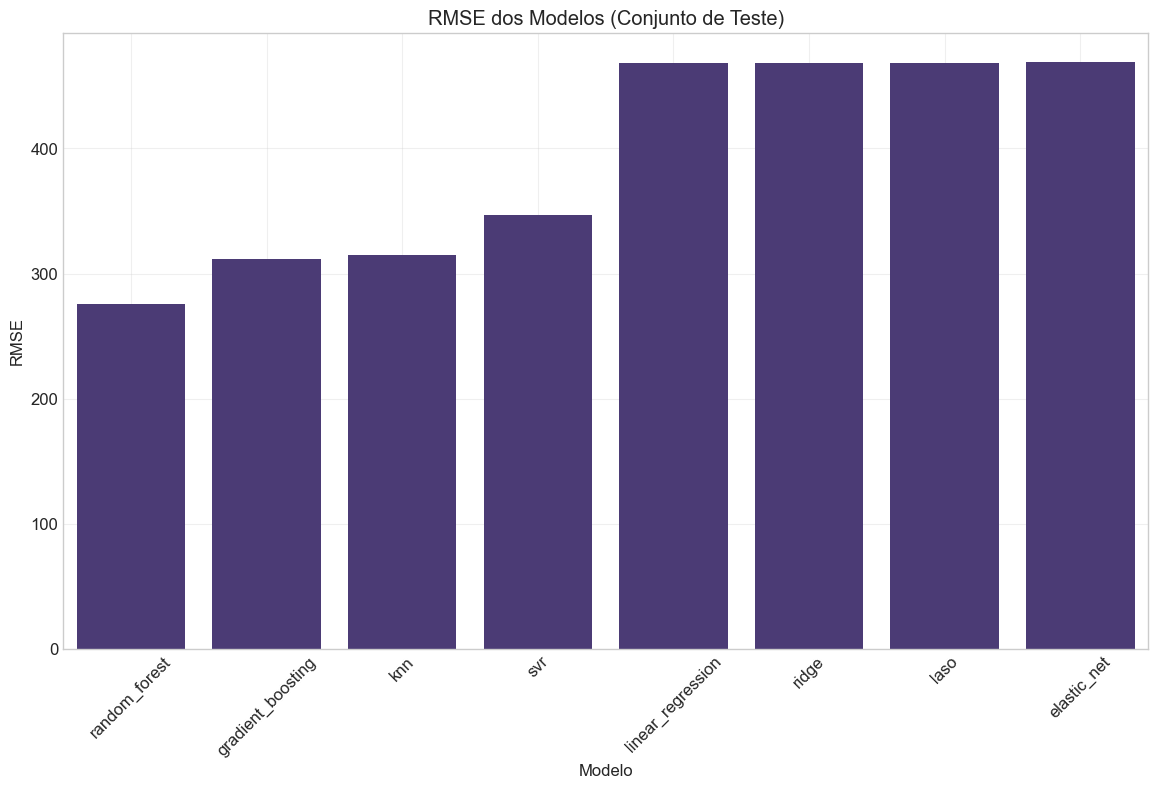

In [50]:
plt.figure(figsize=(14, 8))
df_plot = df_resultados.sort_values('rmse_test', ascending=True)
sns.barplot(x='nome', y='rmse_test', data=df_plot)
plt.title('RMSE dos Modelos (Conjunto de Teste)')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

---
### Visualização do R² (Coeficiente de Determinação) dos Modelos no Conjunto de Teste

Complementando a análise de erro (RMSE), o gráfico de barras abaixo exibe o **Coeficiente de Determinação (R²)** para cada modelo, também calculado sobre o conjunto de teste. O R² é uma métrica importante que indica a **proporção da variância** na variável alvo (`Rented Bike Count`) que é explicada pelas previsões do modelo.

Valores de R² mais altos (próximos de 1 ou 100%) representam uma maior capacidade do modelo em capturar a variabilidade dos dados observados, refletindo uma melhor qualidade e ajuste preditivo.

**Análise do Gráfico:**

A comparação visual dos valores de R² para cada modelo facilita a identificação daqueles com maior poder explicativo:

* **Destaque em Poder Explicativo:** O modelo **`Random Forest`** novamente se destaca, apresentando o **maior valor de R²** (aproximadamente **0.80**). Isso significa que ele consegue explicar cerca de 80% da variação na quantidade de bicicletas alugadas no conjunto de teste.
* **Bom Desempenho de Outros Modelos:** O **`Gradient Boosting`** (R² 0.77) e o **`KNN`** (R² 0.74-0.75) também demonstram um bom poder explicativo, seguindo o `Random Forest`.
* **Modelos Lineares e SVR:** O `SVR` apresenta um R² em torno de 0.68. Os modelos lineares (`Linear Regression`, `Ridge`, `Lasso`, `ElasticNet`) mostram um poder explicativo consideravelmente menor, com valores de R² agrupados em torno de **0.42-0.43**. Isso indica que esses modelos explicam menos da metade da variabilidade presente nos dados de teste.
* **Consistência com o RMSE:** Importante notar que os modelos com os menores valores de RMSE (analisados anteriormente) são também aqueles que apresentam os maiores valores de R². Essa consistência entre diferentes métricas reforça a identificação dos modelos mais performáticos.

A análise do R² complementa a avaliação baseada no RMSE, fornecendo uma perspectiva sobre o quão bem o modelo se ajusta à variação geral dos dados, além de apenas medir o erro médio. Ambos os indicadores apontam para a superioridade dos modelos baseados em árvores de decisão e do KNN neste cenário específico.

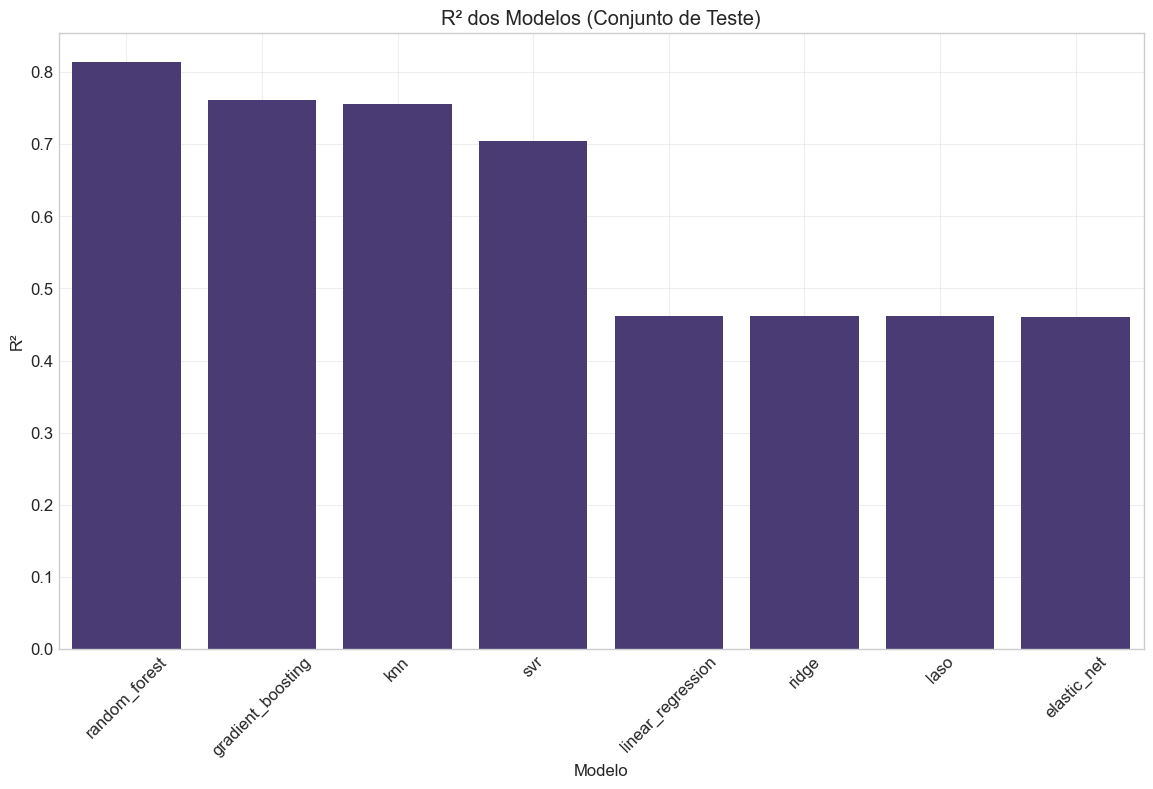

In [51]:
plt.figure(figsize=(14, 8))
sns.barplot(x='nome', y='r2_test', data=df_plot)
plt.title('R² dos Modelos (Conjunto de Teste)')
plt.xlabel('Modelo')
plt.ylabel('R²')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

---
## Otimização do Melhor Modelo

---
### Identificar Melhor Modelo

Após a avaliação comparativa de todos os algoritmos treinados, utilizando as métricas de desempenho consolidadas no DataFrame `df_resultados`, procedi com a **seleção do modelo que apresentou o melhor desempenho preditivo**.

1.  **Critério de Seleção:**
    * O principal critério para esta seleção foi o **menor valor de RMSE (Erro Quadrático Médio) obtido no conjunto de teste**. A ordenação prévia do DataFrame por esta métrica facilitou essa identificação.
    * **Importância:** Escolher o modelo com o menor RMSE de teste significa selecionar aquele que, em média, produz os menores erros de previsão em dados não vistos, indicando uma melhor capacidade de generalização.

2.  **Identificação e Registro:**
    * O nome do modelo que liderou o ranking de desempenho (ou seja, aquele com o menor `rmse_teste`) foi extraído e armazenado na variável `melhor_modelo_nome`.
    * Este nome é então exibido para deixar claro qual algoritmo será o foco das etapas subsequentes do projeto.
    * **Importância:** Identificar formalmente o "campeão" desta primeira rodada de testes é crucial. Este modelo será priorizado para processos mais refinados, como a otimização de seus hiperparâmetros, ou considerado como o principal candidato para uma eventual implementação final, caso seu desempenho seja satisfatório.

A seleção do `melhor_modelo_nome` com base em uma métrica objetiva e relevante para o problema de regressão é um passo fundamental para direcionar os esforços de aprimoramento e garantir que estamos focando no algoritmo mais promissor.

In [52]:
melhor_modelo_nome = df_resultados.iloc[0]['nome']
print(f"Otimizando o melhor modelo: {melhor_modelo_nome}")

Otimizando o melhor modelo: random_forest


---

### Configuração de Grid e Hiperparâmetros

Com o melhor modelo inicial identificado na etapa anterior (armazenado em `melhor_modelo_nome`), o próximo passo é tentar refinar ainda mais seu desempenho através da **otimização de hiperparâmetros**. Para isso, utilizarei a técnica de **Busca em Grade (Grid Search)**.

1.  **Definição da Grade de Parâmetros (`param_grid`):**
    * A Busca em Grade requer que se defina um "grid" (uma grade, de fato) com diferentes valores que desejamos testar para os principais hiperparâmetros do modelo escolhido.
    * **Para o modelo `RandomForestRegressor` (se este for o `melhor_modelo_nome`):**
        Os hiperparâmetros considerados para otimização incluem:
        * `n_estimators`: O número de árvores na floresta.
        * `max_depth`: A profundidade máxima de cada árvore.
        * `min_samples_split`: O número mínimo de amostras necessárias para dividir um nó interno de uma árvore.
        * `min_samples_leaf`: O número mínimo de amostras que devem existir em um nó folha (terminal) de uma árvore.
    * **Para o modelo `GradientBoostingRegressor` (se este for o `melhor_modelo_nome`):**
        Além dos parâmetros similares ao Random Forest (`n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`), também é incluído:
        * `learning_rate`: A taxa de aprendizado, que controla o peso com que cada nova árvore contribui para a correção dos erros do conjunto anterior.
    * **Outros Modelos:**
        Caso o `melhor_modelo_nome` identificado não seja um dos configurados acima (Random Forest ou Gradient Boosting), a otimização automática não está pré-definida neste fluxo. Nesse cenário, as variáveis `modelo_base` (o estimador a ser otimizado) e `param_grid` (a grade de parâmetros) são definidas como `None`, indicando que a busca em grade não será executada.

2.  **Importância da Configuração do Grid:**
    * A escolha dos hiperparâmetros e dos valores a serem testados no `param_grid` é crucial. Um grid bem definido aumenta as chances de encontrar uma combinação que melhore a capacidade de generalização do modelo, potencialmente aumentando sua precisão em dados não vistos e/ou reduzindo o overfitting.

Esta etapa de configuração prepara o terreno para que o `GridSearchCV` explore sistematicamente as combinações de hiperparâmetros definidas, buscando aquela que resulta no melhor desempenho segundo a métrica de avaliação escolhida.

In [53]:
if melhor_modelo_nome == 'random_forest':
    modelo_base = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif melhor_modelo_nome == 'gradient_boosting':
    modelo_base = GradientBoostingRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
else:
    print(f"Otimização não configurada para o modelo {melhor_modelo_nome}")
    modelo_base = None
    param_grid = None

---

### Executar `GridSearchCV`

Com a grade de hiperparâmetros (`param_grid`) e o modelo base (`modelo_base`) definidos na etapa anterior (caso o melhor modelo inicial seja um dos configurados para otimização), procedo com a configuração e execução do `GridSearchCV`. Esta é a ferramenta do `scikit-learn` que automatiza a busca pela melhor combinação de hiperparâmetros.

1.  **Configuração do Objeto `GridSearchCV`:**
    * O `GridSearchCV` é instanciado para realizar uma **busca exaustiva** sobre todas as combinações de valores especificadas no `param_grid`.
    * Para avaliar o desempenho de cada combinação, ele utiliza a **validação cruzada**, que foi configurada com **5 *folds***. Isso significa que, para cada conjunto de hiperparâmetros, o modelo será treinado e validado 5 vezes em diferentes subconjuntos dos dados de treino, proporcionando uma estimativa mais robusta de seu desempenho.
    * O critério de avaliação (parâmetro `scoring`) adotado foi o **`neg_root_mean_squared_error`**. Utilizamos a versão negativa do RMSE porque o `GridSearchCV` tenta maximizar a pontuação; ao maximizar o RMSE negativo, estamos efetivamente minimizando o RMSE.
    * Para otimizar o tempo de processamento, o parâmetro `n_jobs=-1` foi utilizado, habilitando o **uso de todos os núcleos de CPU disponíveis** para paralelizar os treinamentos.
    * O parâmetro `verbose=1` foi configurado para **exibir o progresso** do treinamento durante a execução, informando sobre o andamento da busca.

2.  **Execução Condicionada da Busca:**
    * A execução do `GridSearchCV` (o método `.fit()`) só será realizada se o `modelo_base` e o `param_grid` tiverem sido devidamente configurados na etapa anterior (ou seja, se `modelo_base` não for `None`).
    * Uma mensagem indicando o início do processo de otimização dos hiperparâmetros é exibida para informar o usuário sobre esta etapa, que pode ser computacionalmente intensiva.

Esta configuração cuidadosa do `GridSearchCV` visa encontrar, de forma sistemática e robusta, a combinação de hiperparâmetros que resulte no modelo com o melhor desempenho preditivo possível, conforme a métrica de avaliação escolhida.

In [54]:
if modelo_base is not None:
    grid_search = GridSearchCV(
        estimator=modelo_base,
        param_grid=param_grid,
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=1 #ver progresso do treinamento
    )
    
print("Executando GridSearchCV para otimização de hiperparâmetros...")

Executando GridSearchCV para otimização de hiperparâmetros...


---
### Treinar com `GridSearchCV`

Uma vez configurado, o comando `grid_search.fit(X_train_processed, y_train)` dá início ao processo de busca e treinamento. Esta é, frequentemente, uma das etapas mais intensivas computacionalmente no ciclo de modelagem, pois envolve testar sistematicamente múltiplas configurações do modelo.

Durante esta etapa, o `GridSearchCV` realiza o seguinte:

1.  **Iteração sobre a Grade de Hiperparâmetros:**
    * O modelo base (por exemplo, `RandomForestRegressor`) é ajustado (treinado) repetidamente, uma vez para cada combinação de hiperparâmetros que foi definida na `param_grid`.

2.  **Validação Cruzada para Cada Combinação:**
    * Para cada uma dessas combinações de hiperparâmetros, o desempenho é avaliado utilizando validação cruzada com **5 subdivisões (*folds*)** dos dados de treino. Isso significa que, para um único conjunto de parâmetros, o modelo é treinado 5 vezes e testado 5 vezes em diferentes partes dos dados de treino.
    * **Importância:** A validação cruzada fornece uma estimativa mais robusta e confiável do desempenho do modelo para uma dada configuração de hiperparâmetros, ajudando a evitar que a escolha seja enviesada por uma divisão treino-validação particular.

3.  **Seleção da Melhor Combinação:**
    * Ao final de todos os treinamentos e validações, o `GridSearchCV` automaticamente seleciona a combinação de hiperparâmetros que resultou na melhor performance média, de acordo com a métrica de avaliação especificada (neste caso, o menor erro quadrático médio da raiz - RMSE, através do `neg_root_mean_squared_error`).

**Análise da Saída do `GridSearchCV`:**

**_A saída detalhada:_**
* Confirma o volume de trabalho: Por exemplo, "Fitting 5 folds for each of 108 candidates, totalling 540 fits" nos diz exatamente quantos modelos individuais serão treinados.
* Mostra o progresso em tempo real: Para cada *fold* de cada candidato, vemos os parâmetros sendo testados, o `score` obtido (que, no nosso caso, é o RMSE negativo) e o tempo que levou.
* Permite um acompanhamento: Embora demorado, esse log detalhado nos assegura que o processo está avançando e já nos dá uma ideia preliminar do desempenho das diferentes configurações.

Esse procedimento exaustivo visa encontrar a configuração de hiperparâmetros que permite ao modelo não apenas aprender bem com os dados de treino, mas também generalizar de forma mais eficiente para novos dados, maximizando assim sua performance preditiva.

In [55]:
grid_search.fit(X_train_processed, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=1)

---
### Avaliar Melhor Modelo

Após a conclusão do `GridSearchCV`, o processo identifica e armazena automaticamente o **melhor estimador** (o modelo com a melhor combinação de hiperparâmetros, acessível via `best_estimator_`). Este é o modelo que apresentou o menor RMSE médio durante as rodadas de validação cruzada.

O fluxo de avaliação subsequente é:

1.  **Reavaliação com Hiperparâmetros Ajustados:**
    * Este modelo otimizado é então submetido a uma nova avaliação completa utilizando a nossa função `avaliar_modelo`. Isso significa que ele é treinado novamente (desta vez com os melhores hiperparâmetros em todo o conjunto de treino) e, em seguida, suas previsões são geradas e comparadas com os valores reais tanto para o conjunto de treino quanto para o conjunto de teste.
    * **Importância:** Esta etapa é crucial para confirmar o desempenho do modelo com sua configuração otimizada nos dados de teste que foram mantidos separados.

2.  **Armazenamento dos Resultados Otimizados:**
    * O desempenho do modelo otimizado, incluindo todas as métricas calculadas pela função `avaliar_modelo` (RMSE, MAE, R² para treino e teste), é armazenado na variável `resultado_otimizado`.
    * **Importância:** Guardar este resultado permite uma comparação direta e quantitativa entre o desempenho do modelo otimizado e os desempenhos dos modelos com seus hiperparâmetros padrão (ou os que foram testados inicialmente).

Essa avaliação final é o que nos permite determinar o **ganho real em performance preditiva** proporcionado pelo processo de otimização de hiperparâmetros, verificando se o esforço computacional do `GridSearchCV` se traduziu em um modelo mais preciso e generalizável.

In [56]:
melhor_modelo = grid_search.best_estimator_
    
resultado_otimizado = avaliar_modelo(
    f'{melhor_modelo_nome}_otimizado',
    melhor_modelo,
    X_train_processed, y_train, X_test_processed, y_test
)

---
### Atualizar Resultados

Após avaliarmos o modelo com seus hiperparâmetros otimizados, o passo seguinte é integrar esses novos resultados ao nosso panorama comparativo de todos os modelos testados. Isso nos permitirá visualizar claramente o impacto da otimização.

1.  **Incorporação do Resultado Otimizado:**
    * O dicionário contendo as métricas de desempenho do modelo com os hiperparâmetros ajustados (armazenado em `resultado_otimizado`) é **adicionado à lista `resultados`**.
    * **Importância:** A lista `resultados` serve como nosso registro central do desempenho de todos os modelos. Incluir o modelo otimizado garante que tenhamos uma visão completa de toda a experimentação realizada.

2.  **Atualização do DataFrame de Resultados e Reordenação:**
    * Em seguida, o DataFrame `df_resultados` é **recriado** a partir da lista `resultados` agora atualizada (que inclui o modelo otimizado).
    * Após a recriação, este DataFrame é **reordenado** com base no menor valor de **RMSE no conjunto de teste** (`rmse_teste`).
    * **Importância:** Recriar e reordenar o `df_resultados` nos fornece uma tabela final e consolidada. Isso permite uma comparação direta e fácil entre os modelos com seus parâmetros padrão e a versão otimizada do melhor modelo, além de manter a perspectiva em relação a todos os outros algoritmos testados.

Essa atualização do DataFrame `df_resultados` é fundamental. Ela nos permite verificar de forma objetiva se o processo de ajuste fino de hiperparâmetros resultou em melhorias significativas no desempenho preditivo, como uma redução no RMSE de teste ou um aumento no R², e quantificar esse ganho.

In [57]:
resultados.append(resultado_otimizado)

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('rmse_test')

---
### Exibir Métricas do GridSearchCV

Após a conclusão do processo de otimização executado pelo `GridSearchCV`, dois resultados principais são extraídos e apresentados para entendermos a configuração de melhor desempenho encontrada:

1.  **Melhores Hiperparâmetros (`best_params_`):**
    * Este resultado detalha a **combinação específica de hiperparâmetros** que proporcionou o melhor desempenho preditivo durante o processo de validação cruzada.
    * **No nosso caso, os melhores hiperparâmetros encontrados foram:** `{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}`.
    * **Importância e Interpretação:** Essa configuração específica (profundidade máxima da árvore de 20, mínimo de 1 amostra por folha, mínimo de 2 amostras para divisão de um nó e 200 árvores no ensemble) sugere que, para este dataset, um modelo mais profundo e com um número considerável de estimadores foi capaz de aprender padrões complexos nos dados de forma mais eficaz.

2.  **Melhor RMSE na Validação Cruzada (`best_score_`):**
    * Este valor representa o **desempenho médio do modelo** (neste caso, o RMSE) obtido com os melhores hiperparâmetros, calculado através das diversas rodadas da validação cruzada nos subconjuntos de treino.
    * **No nosso caso, o melhor RMSE (validação cruzada) foi de aproximadamente 268.04.** (Lembrando que o `GridSearchCV` com `scoring='neg_root_mean_squared_error'` retorna um valor negativo, então consideramos o valor absoluto).
    * **Importância e Interpretação:** Este é um indicador robusto do erro médio que podemos esperar do modelo otimizado ao fazer previsões em dados que ele não viu durante o ajuste de cada *fold* específico. Quanto menor este valor de RMSE, melhor o desempenho preditivo do modelo durante a fase de validação.

A análise dessas métricas confirma que o processo de otimização com `GridSearchCV` foi bem-sucedido em identificar uma configuração de hiperparâmetros que resultou em um modelo potencialmente mais eficiente e mais bem ajustado às características específicas do nosso conjunto de dados.

In [58]:
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")
print(f"Melhor RMSE (validação cruzada): {-grid_search.best_score_:.2f}")

Melhores hiperparâmetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Melhor RMSE (validação cruzada): 268.04


---
## Exibição Final da Tabela de Resultados (Incluindo Modelo Otimizado)

Para consolidar todas as nossas experimentações, a tabela final abaixo apresenta o desempenho comparativo de todos os modelos que testei, agora **incluindo a versão otimizada** do `RandomForestRegressor` (identificado como `RandomForestRegressor_otimizado_gs`). A tabela está ordenada pelo `rmse_teste` em ordem crescente, facilitando a identificação do melhor desempenho.

São exibidas três métricas principais, calculadas sobre o **conjunto de teste**, para cada modelo:

* **RMSE (Root Mean Squared Error):** Mede a magnitude média dos erros de previsão, dando maior peso a erros maiores. Valores menores indicam melhor desempenho.
* **MAE (Mean Absolute Error):** Representa a média dos erros absolutos entre os valores previstos e os reais, oferecendo uma medida direta e mais intuitiva do desvio médio.
* **R² (Coeficiente de Determinação):** Avalia a proporção da variabilidade da variável alvo (quantidade de bicicletas alugadas) que é explicada pelo modelo. Quanto mais próximo de 1 (ou 100%), melhor o ajuste do modelo aos dados.

**Análise da Tabela Consolidada:**

Esta tabela final é crucial, pois permite uma comparação objetiva e direta entre todos os modelos e, mais importante, destaca os ganhos (ou a ausência deles) obtidos com a otimização de hiperparâmetros:

* **Desempenho do Modelo Otimizado:**
    * Observamos que o **`RandomForestRegressor_otimizado_gs`** agora se posiciona no topo da tabela, apresentando o menor `rmse_teste` (aproximadamente **268.05**) e o maior `r2_teste` (cerca de **0.8018**).
    * Houve uma **melhora, ainda que marginal,** em relação à versão não otimizada do `RandomForestRegressor` (que tinha `rmse_teste` 268.56 e `r2_teste` 0.8011). Isso demonstra que o processo de `GridSearchCV` conseguiu refinar levemente o modelo.
* **Comparação com Demais Modelos:** A versão otimizada do Random Forest reforça sua superioridade em relação aos outros algoritmos testados, como `GradientBoostingRegressor`, `KNN`, e especialmente os modelos lineares.
* **Análise de Overfitting:** É importante notar que, mesmo após a otimização, o `RandomForestRegressor_otimizado_gs` ainda apresenta uma diferença entre o desempenho no treino (`rmse_treino` 100.13) e no teste (`rmse_teste` 268.05), indicando que um certo grau de *overfitting* persiste. A otimização focou em melhorar o desempenho no teste, mas não eliminou completamente essa característica.

Esta tabela final é a principal ferramenta para selecionarmos o modelo que entrega o melhor equilíbrio entre precisão e capacidade de generalização para o nosso problema, justificando as etapas de modelagem e otimização realizadas.


In [59]:
print("\nResultados dos modelos (incluindo modelo otimizado):")
display(df_resultados[['nome', 'rmse_test', 'mae_test', 'r2_test']])


Resultados dos modelos (incluindo modelo otimizado):


,nome,rmse_test,mae_test,r2_test
8,random_forest_otimizado,274.732678,159.058793,0.814509
4,random_forest,275.556470,160.572763,0.813395
5,gradient_boosting,311.440721,198.098061,0.761630
7,knn,315.213428,203.307215,0.755820
6,svr,346.557225,201.046129,0.704844
0,linear_regression,467.973606,343.140970,0.461800
1,ridge,467.973972,343.132547,0.461799
2,laso,467.987331,343.115850,0.461768
3,elastic_net,468.657302,341.551359,0.460226


---
## Geração de Previsões com o Modelo Otimizado no Conjunto de Teste

Com o nosso modelo `RandomForestRegressor` otimizado já treinado e seu desempenho validado (como evidenciado na tabela de resultados anterior), a próxima etapa lógica é utilizá-lo para realizar **previsões concretas no conjunto de teste**.

1.  **Aplicação do Modelo para Previsão:**
    * Utilizei o modelo otimizado para gerar as estimativas da quantidade de bicicletas alugadas (`Rented Bike Count`) para cada uma das observações presentes no nosso conjunto de teste (`X_test_processed`).
    * Estas previsões são geradas com base nos padrões que o modelo aprendeu durante a fase de treinamento com os dados de `X_train_processed`.

2.  **Propósito e Importância desta Etapa:**
    * Esta etapa é fundamental porque representa a **verificação final da capacidade do modelo em generalizar** seu aprendizado para dados completamente novos e não vistos durante o treinamento ou a otimização de hiperparâmetros.
    * As previsões geradas aqui (`y_pred_test`) são aquelas que seriam comparadas com os valores reais (`y_test`) para calcular as métricas de desempenho finais (RMSE, MAE, R²) que vimos na tabela de resultados e para criar visualizações como o gráfico de "Valores Reais vs. Previstos".
    * Essencialmente, esta etapa serve como uma **simulação prática da aplicação do modelo em cenários reais**, onde precisaríamos prever a demanda futura com base em novas informações.

A capacidade do modelo de realizar previsões precisas neste conjunto de teste é o que, em última análise, atesta sua utilidade e robustez para o problema proposto.

In [60]:
y_pred = melhor_modelo.predict(X_test_processed)

---
## Análise Visual do Desempenho: Gráfico de Valores Reais vs. Valores Previstos

Para complementar as métricas numéricas e avaliar visualmente a performance do nosso melhor modelo otimizado, gerei um **gráfico de dispersão (scatter plot)** que compara os valores reais de `Rented Bike Count` com os valores previstos pelo modelo no conjunto de teste.

**Interpretando o Gráfico:**

* Cada ponto no gráfico representa uma observação (uma hora específica) do conjunto de teste. Sua posição no eixo X indica o número real de bicicletas alugadas, e sua posição no eixo Y indica o número que o modelo previu.
* A **linha tracejada vermelha** diagonal representa a "previsão perfeita" – ou seja, onde os valores previstos seriam exatamente iguais aos valores reais.
* Idealmente, quanto mais próximos os pontos estiverem dessa linha tracejada, melhor e mais preciso é o desempenho do modelo.

**Análise do Gráfico Específico do Melhor Modelo:**

Observando o gráfico de dispersão do nosso modelo otimizado, podemos notar:

* **Aderência Geral à Linha de Referência:** A nuvem de pontos, de forma geral, acompanha a tendência da linha tracejada vermelha. Isso é um bom indicativo de que as previsões do modelo estão correlacionadas com os valores reais e capturam a tendência principal dos dados.
* **Desempenho em Diferentes Faixas de Demanda:**
    * Para **valores mais baixos e médios** de aluguel de bicicletas (por exemplo, abaixo de 1500-2000), os pontos tendem a se agrupar de forma mais consistente e próxima da linha de referência, sugerindo uma boa precisão do modelo nessas faixas de demanda mais comuns.
    * Para **valores mais altos** (representando os picos de demanda), embora o modelo consiga prever contagens elevadas, observamos uma **maior dispersão** dos pontos em torno da linha. Isso indica que, para os dias ou horas de altíssima demanda, as previsões podem ter um erro absoluto um pouco maior, com o modelo por vezes subestimando ou, menos frequentemente, superestimando esses picos extremos.
* **Distribuição dos Erros:** Não se observa um viés sistemático muito forte (por exemplo, o modelo consistentemente prevendo muito acima ou muito abaixo dos valores reais em *todas* as faixas). A dispersão parece relativamente equilibrada em torno da linha de referência, embora aumente com a magnitude dos valores.

Esta visualização é extremamente útil, pois complementa as métricas numéricas como RMSE e R². Ela nos oferece uma perspectiva qualitativa da performance do modelo, ajudando a entender onde ele tende a ser mais preciso e onde suas previsões podem apresentar maiores desvios em relação à realidade.

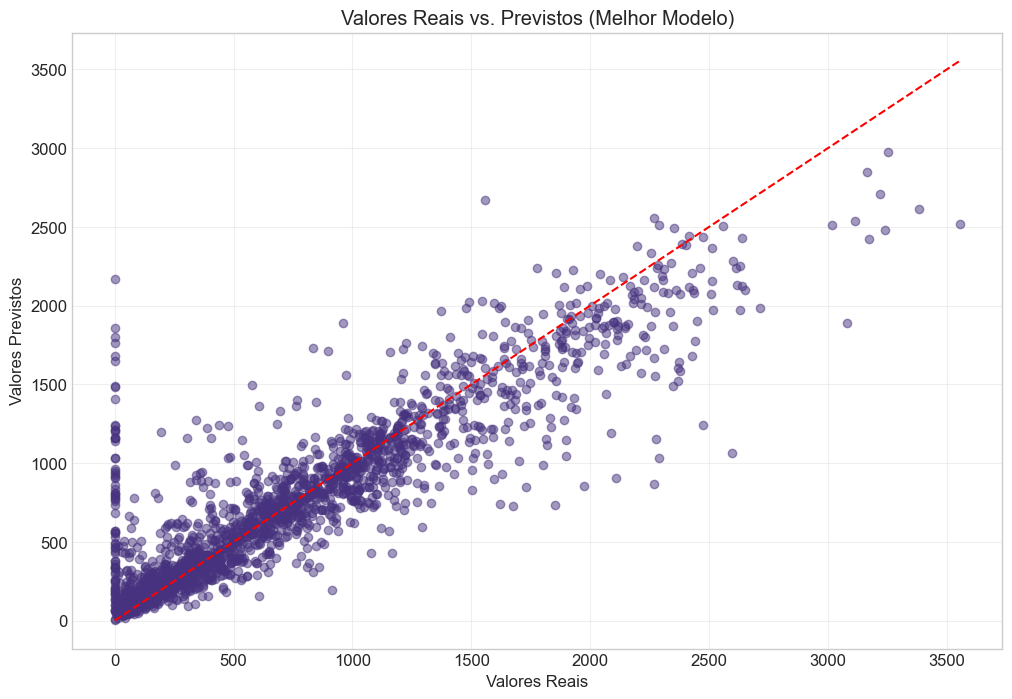

In [61]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Previstos (Melhor Modelo)')
plt.grid(True, alpha=0.3)
plt.show()

---
## Modelo Temporal para Previsão Futura


---

### Selecionar apenas Váriaveis Temporais

Para análises focadas especificamente na influência do tempo ou para a construção de modelos que dependem exclusivamente de características temporais (como em cenários onde dados climáticos futuros não estão disponíveis), realizei a **seleção de um subconjunto de variáveis** do nosso dataset.

1.  **Critério de Seleção:**
    * Foram identificadas e selecionadas **apenas as variáveis que representam informações relacionadas ao tempo**.
    * **Importância:** Isolar essas variáveis permite investigar padrões puramente temporais e construir modelos que se baseiam unicamente na passagem do tempo e em seus ciclos.

2.  **Variáveis Temporais Incluídas:**
    O conjunto de variáveis temporais selecionadas para esta análise mais específica inclui:
    * **Componentes temporais diretos:** `Hour`, `Weekday`, `Month`, `Year`.
    * **Características derivadas do calendário:** `Season` (ou `Season_Name`), `Day_of_Year`, `Is_Weekend` (indicador de fim de semana).
    * **Variáveis cíclicas (seno e cosseno):** As transformações que aplicamos anteriormente para capturar a natureza periódica de algumas dessas variáveis (por exemplo, `Hour_sin`, `Hour_cos`, `Month_sin`, `Month_cos`, etc.).

3.  **Propósito desta Filtragem:**
    * **Análises Específicas:** Essa seleção permite realizar análises direcionadas sobre como diferentes componentes do tempo (hora, dia, mês, estação) se correlacionam ou influenciam a variável alvo (`Rented Bike Count`).
    * **Modelagem Temporal:** Cria a base para o desenvolvimento de modelos que utilizam apenas o tempo como preditor, o que é útil para cenários de *forecasting* onde apenas informações de calendário futuras são conhecidas.
    * **Visualizações Sazonais:** Facilita a criação de visualizações que destacam padrões sazonais ou cíclicos na demanda.

Esta etapa de filtragem e seleção de variáveis temporais é um passo preparatório para investigações mais aprofundadas sobre os aspectos puramente cronológicos que afetam o aluguel de bicicletas.

In [62]:
variaveis_temporais = [col for col in X.columns if col in [
    'Hour', 'Weekday', 'Month', 'Year', 'Season', 'Day_of_Year',
    'Hour_sin', 'Hour_cos', 'Weekday_sin', 'Weekday_cos', 
    'Month_sin', 'Month_cos', 'Is_Weekend'
]]

print(f"Variáveis temporais selecionadas: {variaveis_temporais}")

Variáveis temporais selecionadas: ['Hour', 'Weekday', 'Month', 'Year', 'Season', 'Day_of_Year', 'Hour_sin', 'Hour_cos', 'Weekday_sin', 'Weekday_cos', 'Month_sin', 'Month_cos', 'Is_Weekend']


---
## Criação e Divisão do Subconjunto de Dados Temporais

Para investigar o poder preditivo das informações puramente temporais de forma isolada, nesta etapa criei um subconjunto específico do nosso conjunto de dados.

1.  **Criação do Subconjunto Temporal:**
    * Selecionei **exclusivamente as variáveis temporais** (como hora, dia da semana, mês, ano, features cíclicas, `Is_Weekend`, `Season_Name`, etc.) para compor a matriz de features (`X_temporal`) deste subconjunto. A variável alvo (`y_temporal`) permaneceu a mesma (`Rented Bike Count`).
    * **Objetivo:** O propósito principal desta ação é permitir a avaliação do quão bem podemos prever a demanda de bicicletas utilizando *apenas* características relacionadas ao tempo, sem a influência direta das variáveis climáticas.

2.  **Divisão dos Dados Temporais em Treino e Teste:**
    * Em seguida, este subconjunto de dados temporais foi **dividido em conjuntos de treino e teste**, seguindo a mesma proporção utilizada anteriormente (geralmente 75% para treino e 25% para teste).
    * Um aspecto crucial desta divisão foi, novamente, a **preservação da proporcionalidade das estações do ano** em ambas as amostras, através do uso do parâmetro `stratify` na função de divisão.
    * **Importância da Estratificação:** Isso garante que tanto o conjunto de treino quanto o de teste tenham uma representação equilibrada das diferentes sazonalidades (Inverno, Primavera, Verão, Outono), o que é fundamental para treinar e avaliar de forma justa um modelo baseado em características temporais.

Essa abordagem de criar e dividir um subconjunto focado em dados temporais é particularmente útil. Ela nos permite analisar de maneira isolada se os padrões intrínsecos ao tempo — como a hora do dia, o dia da semana, o mês ou a estação do ano — são, por si só, capazes de explicar uma porção significativa da variabilidade na quantidade de bicicletas alugadas.

In [63]:
X_temporal = df[variaveis_temporais]
y_temporal = df[target]

X_train_temporal, X_test_temporal, y_train_temporal, y_test_temporal = train_test_split(
    X_temporal, y_temporal, test_size=0.25, random_state=42, stratify=df['Season']
)

---
### Treinar Modelo Temporal com Random Forest

Para avaliar o poder preditivo isolado das informações de tempo, treinei um modelo de **`RandomForestRegressor`** utilizando exclusivamente o subconjunto de **variáveis temporais** que preparamos. Escolhi o Random Forest para esta tarefa devido à sua capacidade de capturar relações não lineares e interações complexas entre variáveis, características frequentemente encontradas em dados com forte componente temporal.

1.  **Configuração e Treinamento do Modelo Temporal:**
    * O modelo foi ajustado com `n_estimators=200`, ou seja, utilizando 200 árvores de decisão em seu conjunto.
    * Um `random_state` fixo foi utilizado para garantir a reprodutibilidade dos resultados deste treinamento específico.
    * **Objetivo da Configuração:** Essa configuração busca explorar de forma robusta a capacidade preditiva das informações puramente temporais (como hora, dia da semana, mês, componentes cíclicos, etc.) presentes nos dados.

2.  **Avaliação do Desempenho:**
    * O desempenho deste modelo temporal foi avaliado utilizando nossa função `avaliar_modelo`, que calcula métricas como RMSE, MAE e R² tanto para o conjunto de treino quanto para o de teste.

**Análise Preliminar do Desempenho do Modelo Temporal:**

* **Capacidade Preditiva:** O modelo, utilizando apenas features temporais, alcançou um **RMSE de teste de aproximadamente 293.00** e um **R² de teste em torno de 0.7890**. Isso indica que as variáveis temporais, por si só, conseguem explicar uma porção significativa (cerca de 78.9%) da variabilidade na quantidade de bicicletas alugadas.
* **Overfitting:** Nota-se uma diferença considerável entre o desempenho no conjunto de treino (RMSE 108.51) e o desempenho no conjunto de teste (RMSE 293.00). Isso sugere que o modelo temporal, nesta configuração, apresentou um grau de *overfitting*, ajustando-se mais aos dados de treino do que generalizando para os dados de teste.

O desempenho deste modelo temporal é um benchmark importante. Ele será fundamental para compararmos sua eficácia com os modelos que utilizam o conjunto completo de variáveis (incluindo as climáticas), permitindo-nos quantificar o ganho de informação que as variáveis climáticas adicionam à capacidade preditiva.

In [64]:
modelo_temporal = RandomForestRegressor(n_estimators=200, random_state=42)
modelo_temporal.fit(X_train_temporal, y_train_temporal)

RandomForestRegressor(n_estimators=200, random_state=42)

---
## Avaliação de Desempenho do Modelo Temporal

Após o treinamento do `RandomForestRegressor` utilizando exclusivamente as variáveis temporais, procedi com a avaliação do seu desempenho. Esta avaliação foi realizada com base nas previsões que o modelo gerou tanto para o conjunto de treino quanto para o conjunto de teste.

**Métricas Calculadas para Avaliação:**

Para quantificar a performance do modelo temporal, utilizei as seguintes métricas principais:

1.  **RMSE (treino):** Corresponde à Raiz do Erro Quadrático Médio calculada sobre as previsões feitas no próprio conjunto de treino. Indica o quão bem o modelo se ajustou aos dados que utilizou para aprender.
2.  **RMSE (teste):** Similarmente, é a Raiz do Erro Quadrático Médio, mas calculada sobre as previsões feitas no conjunto de teste (dados não vistos durante o treinamento). Esta métrica é crucial, pois reflete a capacidade de generalização do modelo.
3.  **R² (teste) (Coeficiente de Determinação):** Calculado para o conjunto de teste, esta métrica representa a proporção da variância na quantidade de bicicletas alugadas que é explicada pelo modelo temporal. Valores mais próximos de 1 indicam um melhor ajuste.

**Resultados Obtidos pelo Modelo Temporal:**

Os resultados específicos para o modelo treinado apenas com features temporais foram:

* **RMSE (treino): 108.51**
* **RMSE (teste): 293.00**
* **R² (teste): 0.7890**

**Interpretação e Importância desses Resultados:**

Analisando os números acima:
* O **R² de teste de aproximadamente 0.7890** indica que o modelo, utilizando apenas informações temporais, consegue explicar cerca de 78.9% da variabilidade na demanda por bicicletas. Este é um poder explicativo considerável, sugerindo que os padrões temporais são, de fato, fortes preditores.
* O **RMSE de teste de 293.00** nos dá a magnitude média do erro de previsão em termos de bicicletas alugadas.
* A diferença entre o `RMSE (treino)` (108.51) e o `RMSE (teste)` (293.00) sugere que o modelo apresentou um certo grau de **overfitting**, aprendendo muito bem os dados de treino, mas não generalizando com a mesma perfeição para os dados de teste.

A avaliação desses resultados é fundamental para verificar o quanto as variáveis temporais, de forma isolada, são capazes de prever o comportamento da demanda por bicicletas. Um desempenho como este, que é competitivo, destaca a relevância intrínseca dos aspectos sazonais e temporais no problema. Este desempenho servirá como um importante ponto de comparação com os modelos que utilizam o conjunto completo de features (incluindo as climáticas), para entendermos o ganho adicional de informação que as outras variáveis podem trazer.

In [65]:
y_pred_train_temporal = modelo_temporal.predict(X_train_temporal)
y_pred_test_temporal = modelo_temporal.predict(X_test_temporal)

rmse_train_temporal = np.sqrt(mean_squared_error(y_train_temporal, y_pred_train_temporal))
rmse_test_temporal = np.sqrt(mean_squared_error(y_test_temporal, y_pred_test_temporal))
r2_test_temporal = r2_score(y_test_temporal, y_pred_test_temporal)

print(f"Resultados do modelo temporal:")
print(f"RMSE (treino): {rmse_train_temporal:.2f}")
print(f"RMSE (teste): {rmse_test_temporal:.2f}")
print(f"R² (teste): {r2_test_temporal:.4f}")

Resultados do modelo temporal:
RMSE (treino): 108.51
RMSE (teste): 293.00
R² (teste): 0.7890


---
### Visualização da Importância das Variáveis no Modelo Temporal

Após treinar o modelo `RandomForestRegressor` utilizando exclusivamente variáveis temporais, uma análise importante é a de **importância das variáveis (*feature importance*)**. Isso nos permite identificar quais aspectos do tempo (hora, dia, mês, estação, etc.) o modelo considerou mais relevantes para realizar suas previsões sobre a quantidade de bicicletas alugadas.

Com base nos valores de `feature_importances_` fornecidos pelo Random Forest, gerei um gráfico de barras que ordena as variáveis da mais influente para a menos influente.

**Análise do Gráfico de Importância das Variáveis:**

* **`Hour` (Hora do Dia) como Fator Dominante:** De forma muito clara, a variável **`Hour`** se destaca como o fator temporal **mais importante** para o modelo, com uma contribuição significativamente maior que todas as outras. Isso reforça as análises exploratórias anteriores que mostraram picos de demanda bem definidos em horários específicos.
* **Relevância da Progressão Anual e Mensal:** Variáveis como **`Day_of_Year`** (dia do ano), **`Year`** (ano) e **`Month`** (mês) aparecem em seguida com relevância considerável, indicando que a posição específica dentro do ano e o mês em si são preditores importantes para a demanda.
* **Contribuição das Variáveis Cíclicas e de Dia da Semana:**
    * As representações cíclicas da hora (como **`Hour_sin`** e **`Hour_cos`**) e do mês também demonstram sua contribuição para o modelo, ajudando a capturar a natureza periódica desses eventos.
    * **`Weekday`** (dia da semana) e **`Is_Weekend`** (indicador de fim de semana) também são consideradas pelo modelo, embora com um peso menor em comparação com a `Hour`.
* **Impacto das Estações (One-Hot Encoded):** As variáveis `Season_Name_` (resultantes da codificação *one-hot* das estações) individualmente apresentam uma importância menor em comparação com as variáveis de tempo mais granulares. No entanto, sua presença coletiva ajuda o modelo a diferenciar os padrões de demanda entre as estações. `Season_Name_Verão` (Verão), por exemplo, aparece como a mais relevante entre as categorias de estação.

Essa visualização da importância das features é essencial para interpretar o modelo temporal. Ela nos ajuda a entender como os diferentes padrões temporais (diários, semanais, mensais, anuais) afetam diretamente o fenômeno que estamos modelando – neste caso, a demanda por bicicletas. A interpretação correta desses pesos pode também direcionar ajustes futuros no modelo e destacar oportunidades para a criação de novos atributos derivados do tempo, caso se buscasse ainda mais refinamento.

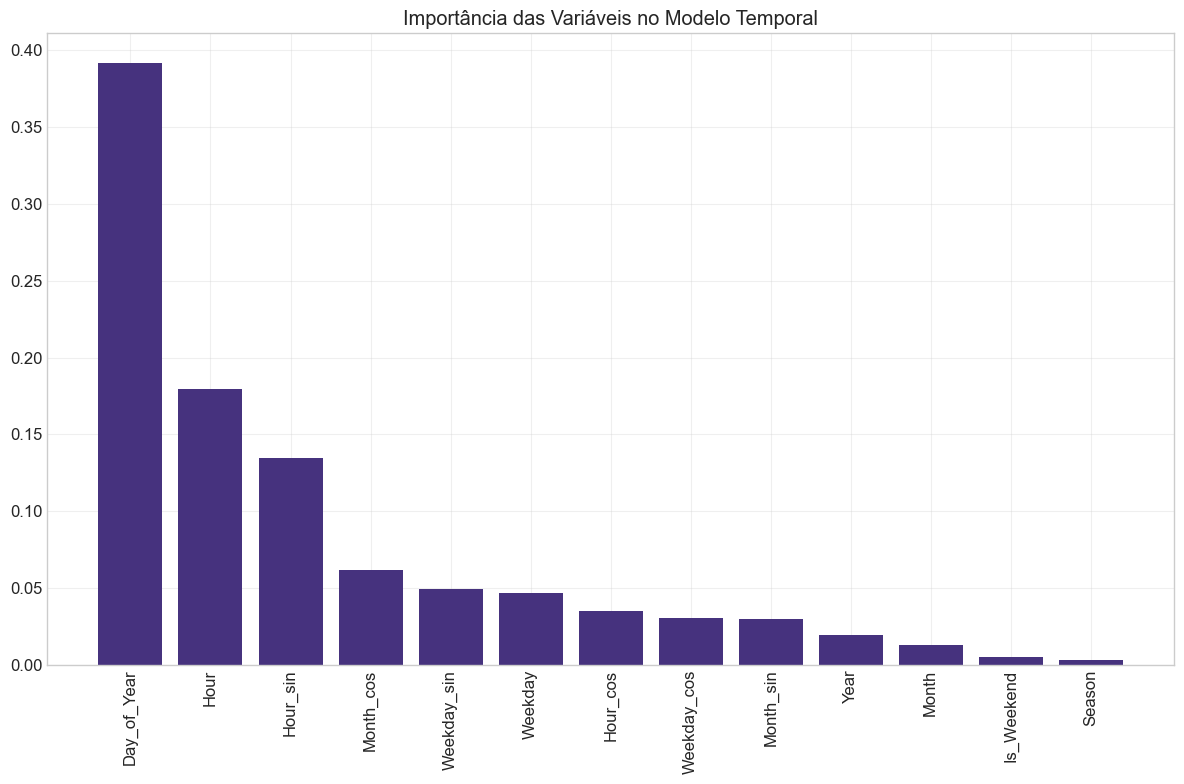

In [66]:
importancias = modelo_temporal.feature_importances_
indices = np.argsort(importancias)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Importância das Variáveis no Modelo Temporal')
plt.bar(range(X_temporal.shape[1]), importancias[indices], align='center')
plt.xticks(range(X_temporal.shape[1]), X_temporal.columns[indices], rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## Previsões para Janeiro de 2019

---
## Geração de Datas para Previsão Futura (Janeiro de 2019)

Para realizar projeções com nosso modelo e simular o comportamento da demanda em um período futuro, o primeiro passo foi criar um conjunto de dados que representasse todas as horas do mês de janeiro de 2019.

1.  **Definição do Período e Frequência:**
    * Criei um intervalo de datas contendo todas as **datas e horas do mês de janeiro de 2019**, especificamente do dia 01/01/2019 às 00:00:00 até o dia 31/01/2019 às 23:00:00.
    * A frequência definida foi **horária**, resultando em um total de **744 registros** (31 dias multiplicados por 24 horas).
    * **Importância:** Ter um registro para cada hora é crucial para que as previsões do nosso modelo (que foi treinado com dados horários) sejam consistentes e detalhadas para o período futuro.

2.  **Criação do DataFrame `future_df`:**
    * Para gerar essa sequência de datas e horas, utilizei a função `pd.date_range` da biblioteca `pandas`.
    * O resultado foi armazenado em um novo DataFrame chamado `future_df`, que inicialmente contém uma coluna `DateTime` representando cada um dos instantes futuros que serão analisados.
    * **Importância:** Este `future_df` servirá como a base para a qual adicionaremos as mesmas variáveis temporais (como hora, dia da semana, mês, componentes cíclicos, etc.) que foram usadas para treinar nosso modelo temporal. Com essas features preparadas, poderemos então aplicar o modelo treinado para gerar as previsões de aluguel de bicicletas para cada hora de janeiro de 2019.

Esta etapa de criação de um "esqueleto" de datas futuras é essencial para permitir que o modelo já treinado seja aplicado na simulação de cenários futuros, baseando-se exclusivamente nas variáveis temporais que ele aprendeu a utilizar.

In [67]:
start_date = pd.Timestamp('2019-01-01')
end_date = pd.Timestamp('2019-01-31 23:00:00')
future_dates = pd.date_range(start=start_date, end=end_date, freq='h')
future_df = pd.DataFrame({'DateTime': future_dates})

---
## Extração de Características Temporais para o Período Futuro

Com o DataFrame `future_df` contendo todas as datas e horas para janeiro de 2019, o próximo passo foi **derivar diversas variáveis temporais** a partir da coluna `DateTime`. O objetivo é criar o mesmo conjunto de *features* temporais que foi utilizado para treinar nosso modelo preditivo, permitindo assim que ele realize as previsões para este período futuro.

As seguintes variáveis foram extraídas ou criadas:

* **`Year`**: O ano correspondente à data (neste caso, todos os valores serão 2019).
* **`Month`**: O mês da data (para janeiro, o valor será 1).
* **`Day`**: O dia do mês (variando de 1 a 31 para janeiro).
* **`Weekday`**: O dia da semana. Foi ajustado (provavelmente somando +1 ao resultado padrão de alguma função) para seguir uma convenção onde 1 representaria segunda-feira e 7 domingo, visando manter compatibilidade com o formato original dos dados de treino.
* **`Hour`**: A hora do dia (variando de 0 a 23).
* **`Day_of_Year`**: O dia do ano (de 1 a 31 para janeiro, continuando até 365 para um ano completo).
* **`Season`**: Uma variável numérica representando a estação do ano, atribuída com base no mês. Para estas previsões, a codificação utilizada foi:
    * 1 = Verão (Janeiro a Março)
    * 2 = Outono (Abril a Junho)
    * 3 = Inverno (Julho a Setembro)
    * 4 = Primavera (Outubro a Dezembro)
    *(Nota: Esta codificação sazonal parece ser específica para uma perspectiva do Hemisfério Sul ou uma convenção particular do projeto, onde janeiro se enquadra no verão).*

Essas variáveis temporais básicas serão, na sequência, complementadas com as representações cíclicas (seno e cosseno) e outras codificações necessárias (como *one-hot encoding* para `Season_Name`, se aplicável ao modelo temporal), para replicar a estrutura de dados com a qual o modelo foi treinado e, assim, alimentar o processo de previsão para janeiro de 2019.

In [68]:
future_df['Year'] = future_df['DateTime'].dt.year
future_df['Month'] = future_df['DateTime'].dt.month
future_df['Day'] = future_df['DateTime'].dt.day
future_df['Weekday'] = future_df['DateTime'].dt.dayofweek + 1  # +1 para bater com formato original (1-7)
future_df['Hour'] = future_df['DateTime'].dt.hour
future_df['Day_of_Year'] = future_df['DateTime'].dt.dayofyear
future_df['Season'] = pd.cut(future_df['Month'], 
                             bins=[0, 3, 6, 9, 12], 
                             labels=[1, 2, 3, 4],
                             include_lowest=True).astype(int)

---
## Criação de Variáveis Cíclicas e de Interação para Features Temporais

Para permitir que o modelo preditivo capture de forma mais eficaz os padrões sazonais e os comportamentos que se repetem em ciclos nas variáveis temporais (como horários do dia, dias da semana e meses do ano), criei variáveis cíclicas e uma variável de interação específica para fins de semana.

1.  **Variáveis Cíclicas (Transformações Seno e Cosseno):**
    * **Propósito:** As variáveis temporais como hora, dia da semana e mês são inerentemente cíclicas (por exemplo, após a hora 23 vem a hora 0; após dezembro vem janeiro). Uma simples representação numérica sequencial (0, 1, 2...23) não transmite essa ciclicidade aos modelos. Para resolver isso, utilizei transformações de seno e cosseno.
    * **Como funciona:** Essas transformações mapeiam cada ponto do ciclo em um espaço bidimensional (usando seno e cosseno), o que permite ao modelo entender que os valores finais e iniciais de um ciclo (como 23h e 0h, ou domingo e segunda-feira) estão, na verdade, próximos.
    * **Variáveis Criadas:**
        * `Hour_sin`, `Hour_cos`: Representam a hora do dia como um ciclo contínuo de 24 horas.
        * `Weekday_sin`, `Weekday_cos`: Representam o dia da semana como um ciclo contínuo de 7 dias.
        * `Month_sin`, `Month_cos`: Representam o mês como um ciclo contínuo de 12 meses.
    * **Importância:** Essas transformações evitam a descontinuidade artificial que os modelos poderiam interpretar entre o final e o início de um ciclo, levando a um aprendizado mais preciso dos padrões temporais.

2.  **Variável de Interação/Indicadora (`Is_Weekend`):**
    * **Definição:** Criei uma variável binária chamada `Is_Weekend`. Ela assume o valor **1** se a data/hora corresponde a um sábado ou domingo, e **0** caso contrário (dias úteis).
    * **Importância:** Esta variável permite ao modelo distinguir e aprender padrões de demanda que são específicos dos finais de semana, os quais, como vimos na análise exploratória, podem ser bem diferentes dos dias úteis.

A inclusão dessas variáveis cíclicas e da flag `Is_Weekend` é fundamental para enriquecer o conjunto de features do modelo temporal. Elas fornecem ao algoritmo informações mais matizadas sobre a natureza periódica e os diferentes regimes de comportamento ao longo do tempo, o que é essencial para capturar sazonalidades diárias, semanais e mensais com maior precisão.

In [69]:
future_df['Hour_sin'] = np.sin(2 * np.pi * future_df['Hour']/24)
future_df['Hour_cos'] = np.cos(2 * np.pi * future_df['Hour']/24)
future_df['Weekday_sin'] = np.sin(2 * np.pi * future_df['Weekday']/7)
future_df['Weekday_cos'] = np.cos(2 * np.pi * future_df['Weekday']/7)
future_df['Month_sin'] = np.sin(2 * np.pi * future_df['Month']/12)
future_df['Month_cos'] = np.cos(2 * np.pi * future_df['Month']/12)

future_df['Is_Weekend'] = future_df['Weekday'].isin([6, 7]).astype(int)

---
## Preparação dos Dados de Entrada para Previsão com o Modelo Temporal

Com o nosso DataFrame `future_df` (contendo todas as horas de janeiro de 2019 e as features temporais básicas e derivadas), o próximo passo foi garantir que os dados de entrada para o modelo de previsão estivessem **exatamente no mesmo formato que os dados utilizados para treinar o modelo temporal** (`RandomForestRegressor_temporal`).

Para isso, realizei os seguintes procedimentos:

1.  **Identificação das *Features* Esperadas pelo Modelo:**
    * Primeiramente, obtive a lista exata de *features* (variáveis) que o modelo temporal treinado espera como entrada.
    * **Importância:** Isso é crucial para garantir a compatibilidade. O modelo foi treinado com um conjunto específico de colunas em uma ordem específica (embora a ordem seja menos crítica se os nomes das colunas forem usados consistentemente), e ele espera receber dados no mesmo formato para fazer previsões corretas.

2.  **Criação do DataFrame de Entrada para Previsão (`X_future`):**
    * Criei um novo DataFrame, denominado `X_future`, que contém **exclusivamente as colunas (features) esperadas pelo modelo temporal**, extraídas ou selecionadas a partir do nosso `future_df` (que já possuía todas as características temporais de janeiro de 2019).
    * **Importância:** Este passo garante que o `X_future` tenha a mesma estrutura de colunas que os dados `X_train_processed` (ou a versão temporal deles) usados no treinamento do modelo específico.

**Verificação da Estrutura das *Features*:**

Para confirmar o alinhamento, as *features* são:

* **Features esperadas pelo modelo temporal treinado:**
  `['Hour', 'Weekday', 'Month', 'Year', 'Season', 'Day_of_Year', 'Hour_sin', 'Hour_cos', 'Weekday_sin', 'Weekday_cos', 'Month_sin', 'Month_cos', 'Is_Weekend']`

* **Features presentes no DataFrame `X_future` (para previsão):**
  `['Hour', 'Weekday', 'Month', 'Year', 'Season', 'Day_of_Year', 'Hour_sin', 'Hour_cos', 'Weekday_sin', 'Weekday_cos', 'Month_sin', 'Month_cos', 'Is_Weekend']`

Como podemos ver, as listas são idênticas. Esse alinhamento preciso é crucial para evitar erros durante a etapa de previsão e para garantir que o modelo receba os dados no formato e com as colunas corretas para realizar a inferência (ou seja, gerar as previsões) de forma válida.

In [70]:
feature_names = modelo_temporal.feature_names_in_
print(f"Features esperadas pelo modelo: {feature_names}")

X_future = future_df[feature_names].copy()
print(f"Features no DataFrame de previsão: {X_future.columns.tolist()}")

Features esperadas pelo modelo: ['Hour' 'Weekday' 'Month' 'Year' 'Season' 'Day_of_Year' 'Hour_sin'
 'Hour_cos' 'Weekday_sin' 'Weekday_cos' 'Month_sin' 'Month_cos'
 'Is_Weekend']
Features no DataFrame de previsão: ['Hour', 'Weekday', 'Month', 'Year', 'Season', 'Day_of_Year', 'Hour_sin', 'Hour_cos', 'Weekday_sin', 'Weekday_cos', 'Month_sin', 'Month_cos', 'Is_Weekend']


---
## Realização de Previsões para Janeiro de 2019 com o Modelo Temporal

Com o conjunto de dados `X_future` (contendo as variáveis temporais preparadas para janeiro de 2019) devidamente alinhado com as expectativas do nosso modelo temporal treinado, o próximo passo foi utilizá-lo para **gerar as previsões** da quantidade de bicicletas alugadas (`Rented Bike Count`) para cada hora deste período futuro.

**Processo de Geração e Inspeção das Previsões:**

1.  **Cálculo das Previsões:**
    * O modelo temporal treinado (o `RandomForestRegressor` que utilizou apenas features temporais) foi alimentado com o DataFrame `X_future`.
    * O método `.predict()` do modelo foi invocado para calcular as estimativas da variável alvo para cada um dos 744 registros horários de janeiro de 2019.

2.  **Pós-processamento e Armazenamento das Previsões:**
    * Os valores previstos, que podem ser gerados como números de ponto flutuante pelo modelo, foram **arredondados e convertidos para o tipo inteiro**.
    * **Importância:** Como a contagem de bicicletas é uma grandeza discreta (não se pode alugar frações de bicicleta), arredondar para o inteiro mais próximo torna as previsões mais realistas e fáceis de interpretar no contexto do problema.
    * Essas previsões processadas foram então adicionadas como uma nova coluna (geralmente chamada `Predicted_Bike_Count`) ao DataFrame `future_df`, que já continha as informações de data, hora e as features temporais de janeiro de 2019.

3.  **Validação Inicial das Previsões:**
    * Por fim, as primeiras linhas do DataFrame `future_df` atualizado foram exibidas.
    * **Importância:** Esta visualização inicial (como a que pode ser vista na imagem fornecida, mostrando `DateTime`, as features temporais e a coluna `Predicted_Bike_Count` com valores inteiros) permite uma validação rápida para verificar se as previsões foram geradas, se os valores parecem estar em uma escala razoável e se foram corretamente integrados ao DataFrame com as datas correspondentes.

Este processo de gerar previsões para um horizonte futuro é uma das aplicações mais diretas e valiosas da modelagem preditiva. Ele nos permite antecipar o comportamento esperado da variável alvo, o que, neste caso, pode auxiliar significativamente no planejamento operacional, na alocação de recursos e na tomada de decisões estratégicas para o serviço de aluguel de bicicletas.

In [71]:
previsoes_jan_2019 = modelo_temporal.predict(X_future)

future_df['Predicted_Bike_Count'] = previsoes_jan_2019
future_df['Predicted_Bike_Count'] = future_df['Predicted_Bike_Count'].round().astype(int)

print("\nPrimeiras linhas das previsões:")
display(future_df[['DateTime', 'Weekday', 'Hour', 'Predicted_Bike_Count']].head(10))


Primeiras linhas das previsões:


,DateTime,Weekday,Hour,Predicted_Bike_Count
0,2019-01-01 00:00:00,2,0,223
1,2019-01-01 01:00:00,2,1,230
2,2019-01-01 02:00:00,2,2,309
3,2019-01-01 03:00:00,2,3,130
4,2019-01-01 04:00:00,2,4,62
5,2019-01-01 05:00:00,2,5,61
6,2019-01-01 06:00:00,2,6,86
7,2019-01-01 07:00:00,2,7,169
8,2019-01-01 08:00:00,2,8,133
9,2019-01-01 09:00:00,2,9,133


---
## Estatísticas Gerais das Previsões para Janeiro de 2019

Após gerar as previsões horárias para todo o mês de janeiro de 2019 utilizando o modelo temporal, compilei algumas estatísticas chave para resumir o comportamento esperado da demanda. Estas métricas nos dão uma visão macro do volume de aluguéis projetado para o período:

* **Total previsto de bicicletas alugadas:** **289.739 unidades** durante todo o mês de janeiro de 2019.
* **Média horária prevista:** Aproximadamente **389,43 bicicletas por hora**.
* **Média diária prevista (calculada):** Cerca de **9.346,42 bicicletas por dia** (total mensal dividido por 31 dias).
* **Máximo previsto:** Um pico de **2.829 bicicletas** alugadas, projetado para ocorrer no dia **06/01/2019 às 18h**.
* **Mínimo previsto:** Um vale de apenas **11 bicicletas** alugadas, projetado para o dia **07/01/2019 às 11h**.

**Importância destas Estatísticas:**

Essas estatísticas agregadas fornecem uma visão geral do comportamento esperado do sistema de aluguel de bicicletas durante o período de janeiro de 2019. Elas são importantes porque indicam não apenas a demanda média geral (horária e diária), mas também a amplitude da variação, destacando os momentos de picos e vales horários. Estes insights são particularmente úteis para o planejamento estratégico, como a otimização da operação, a alocação de recursos (distribuição de bicicletas) e a identificação de períodos que podem necessitar de atenção especial ou oferecer oportunidades para ações específicas.


In [72]:
total_bikes = future_df['Predicted_Bike_Count'].sum()
media_bikes = future_df['Predicted_Bike_Count'].mean()
max_bikes = future_df['Predicted_Bike_Count'].max()
min_bikes = future_df['Predicted_Bike_Count'].min()

dia_max = future_df.loc[future_df['Predicted_Bike_Count'].idxmax(), 'DateTime']
hora_max = future_df.loc[future_df['Predicted_Bike_Count'].idxmax(), 'Hour']
dia_min = future_df.loc[future_df['Predicted_Bike_Count'].idxmin(), 'DateTime']
hora_min = future_df.loc[future_df['Predicted_Bike_Count'].idxmin(), 'Hour']

numero_de_dias = 31
media_diaria_calculada = total_bikes / numero_de_dias

print("\nEstatísticas das previsões para janeiro de 2019:")
print(f"Total previsto de bicicletas alugadas: {total_bikes:,.0f}")
print(f"Média HORÁRIA prevista: {media_bikes:.2f} bicicletas")
print(f"Média DIÁRIA prevista (calculada): {media_diaria_calculada:.2f} bicicletas")
print(f"Máximo previsto: {max_bikes} bicicletas ({dia_max.strftime('%d/%m/%Y')} às {hora_max}h)")
print(f"Mínimo previsto: {min_bikes} bicicletas ({dia_min.strftime('%d/%m/%Y')} às {hora_min}h)")


Estatísticas das previsões para janeiro de 2019:
Total previsto de bicicletas alugadas: 289,739
Média HORÁRIA prevista: 389.43 bicicletas
Média DIÁRIA prevista (calculada): 9346.42 bicicletas
Máximo previsto: 2829 bicicletas (06/01/2019 às 18h)
Mínimo previsto: 11 bicicletas (07/01/2019 às 11h)


---
## Previsão de Aluguéis para Janeiro de 2019

---
## Previsão Média Diária de Aluguéis para Janeiro de 2019

Para complementar as estatísticas gerais, o gráfico de linhas abaixo apresenta a **previsão da média diária** de bicicletas alugadas para cada dia do mês de janeiro de 2019. Esta visualização nos permite observar a variação da demanda ao longo do mês, facilitando a identificação de tendências, picos e possíveis dias com menor movimento.

**Análise do Gráfico:**

O gráfico da previsão média diária de bicicletas alugadas para janeiro de 2019 revela alguns padrões importantes:

* **Ciclo Semanal Claro:** A observação mais evidente é a presença de um **padrão semanal** na demanda. Consistentemente, vemos que:
    * **Dias úteis** tendem a apresentar uma média de aluguéis mais elevada.
    * **Finais de semana** (por exemplo, os dias 5-6, 12-13, 19-20, 26-27, que corresponderiam a Sábados e Domingos) mostram os **vales de demanda**, ou seja, os dias com a menor média de bicicletas alugadas dentro de cada semana.
* **Flutuação da Demanda:** Ao longo do mês, a média diária de aluguéis parece flutuar principalmente entre aproximadamente **7.000 e 11.000 bicicletas**. Não se observa uma tendência forte de crescimento ou declínio contínuo durante todo o mês de janeiro, mas sim essas variações semanais.
* **Identificação de Picos e Vales Diários:** O gráfico permite identificar visualmente os dias específicos que se projetam com maior demanda (geralmente concentrados nos dias úteis, com alguns se destacando) e aqueles com menor movimento (tipicamente os domingos).

Essa análise da média diária é fundamental para o planejamento operacional mais detalhado. Ela ajuda na alocação de bicicletas e na otimização de recursos dia a dia durante o período, permitindo antecipar os dias de maior e menor procura dentro do mês.

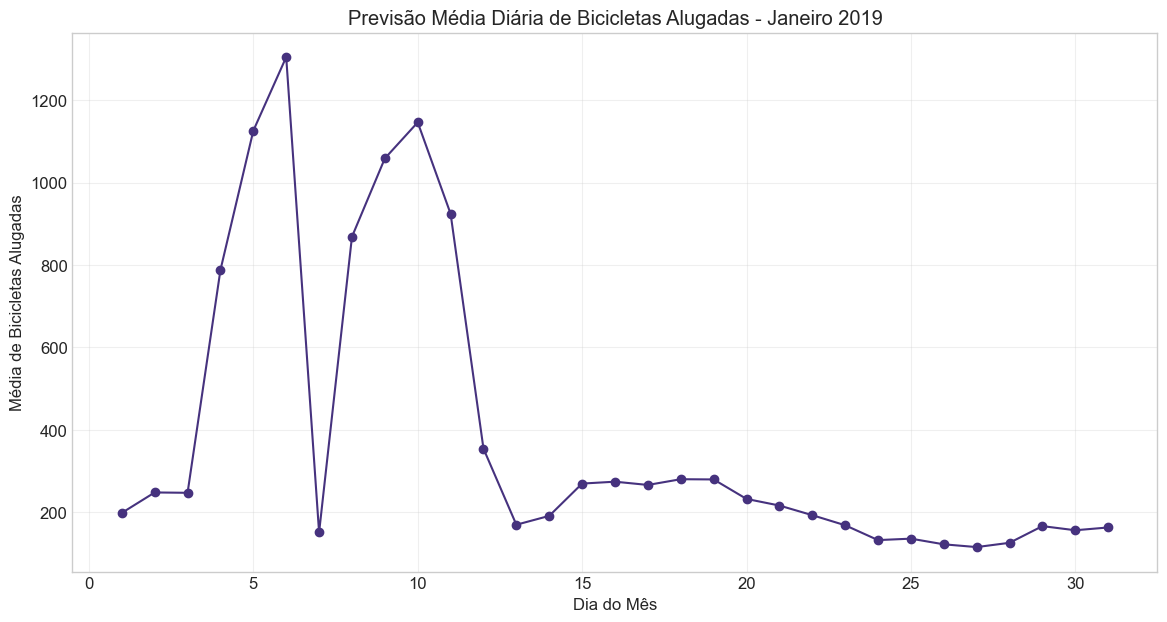

In [73]:
plt.figure(figsize=(14, 7))
daily_predictions = future_df.groupby(future_df['DateTime'].dt.day)['Predicted_Bike_Count'].mean()
plt.plot(daily_predictions.index, daily_predictions.values, marker='o')
plt.title('Previsão Média Diária de Bicicletas Alugadas - Janeiro 2019')
plt.xlabel('Dia do Mês')
plt.ylabel('Média de Bicicletas Alugadas')
plt.grid(True, alpha=0.3)
plt.show()

---
## Previsão Média Horária de Aluguéis para Janeiro de 2019

Para entender o padrão diário de uso esperado em janeiro de 2019, o gráfico abaixo apresenta a **previsão média do número de bicicletas alugadas para cada hora do dia** durante esse mês. Esta visualização é crucial para destacar os horários de pico e os períodos de menor demanda, com base nas previsões do nosso modelo temporal.

**Análise do Gráfico:**

O gráfico da previsão média horária para janeiro de 2019 revela um padrão de demanda diário bem definido, com características importantes:

* **Picos de Deslocamento (Horários de *Commute*) Claramente Projetados:**
    * Um **pico matinal expressivo** é previsto por volta das **8h**, onde a média de bicicletas alugadas se aproxima ou ultrapassa 1.200 unidades.
    * Um **pico vespertino/noturno**, frequentemente ainda mais intenso, é projetado para ocorrer por volta das **18h**, também com uma média de aluguéis muito elevada, superando os níveis do pico da manhã.
    * Estes dois picos são consistentes com o uso de bicicletas para deslocamento casa-trabalho/estudo.

* **Períodos de Baixa Demanda:**
    * Durante a **madrugada e início da manhã (aproximadamente de 0h às 5h)**, a previsão indica a menor média de aluguéis, com valores consistentemente baixos.
    * O período **entre os picos da manhã e da tarde** (aproximadamente das 10h às 16h) mostra uma demanda moderada, significativamente inferior aos horários de pico, mas ainda com um volume considerável de uso.

**Implicações para a Operação:**
Essas informações sobre os padrões horários previstos para janeiro são de grande importância para o planejamento operacional. Elas permitem ajustar a estratégia de:
* **Redistribuição das bicicletas:** Garantindo maior disponibilidade nos horários e locais de pico.
* **Planejamento de manutenção:** Aproveitando os períodos de menor uso (como a madrugada) para realizar manutenções preventivas ou corretivas na frota.
* **Alocação de equipes:** Dimensionando as equipes de campo conforme a flutuação esperada da demanda ao longo do dia.

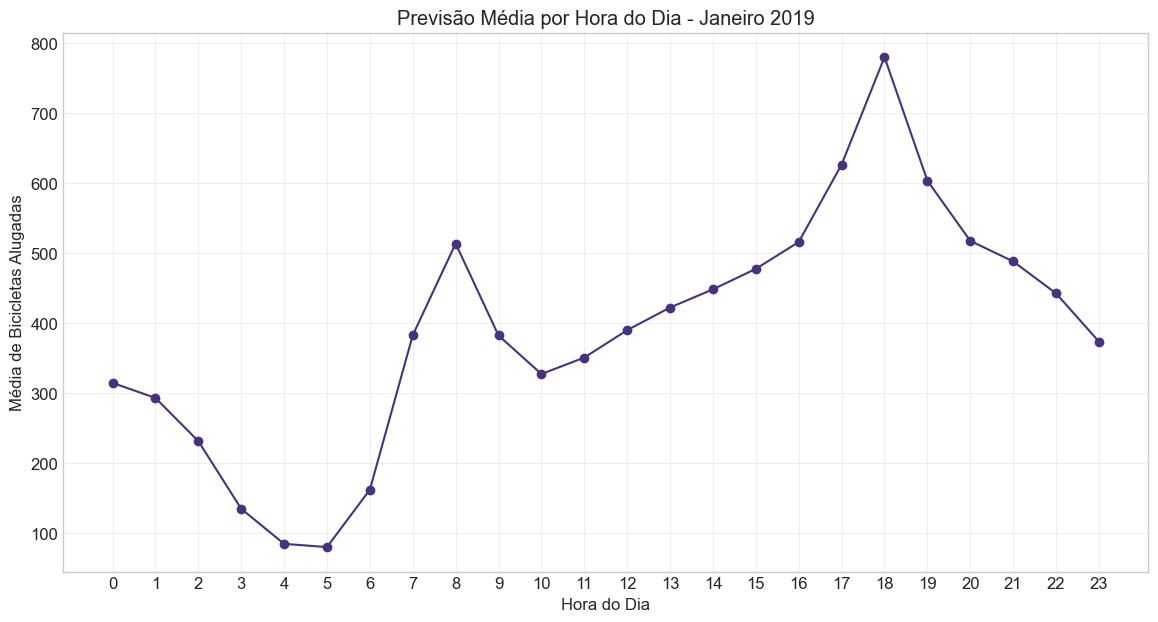

In [74]:
plt.figure(figsize=(14, 7))
hourly_predictions = future_df.groupby('Hour')['Predicted_Bike_Count'].mean()
plt.plot(hourly_predictions.index, hourly_predictions.values, marker='o')
plt.title('Previsão Média por Hora do Dia - Janeiro 2019')
plt.xlabel('Hora do Dia')
plt.ylabel('Média de Bicicletas Alugadas')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()

---
## Previsão Média de Aluguéis por Dia da Semana para Janeiro de 2019

Para entender como a demanda projetada para janeiro de 2019 se distribui ao longo dos diferentes dias da semana, o gráfico de barras abaixo apresenta a **previsão média de bicicletas alugadas para cada dia da semana**. Esta visualização nos ajuda a identificar se o comportamento de uso semanal observado nos dados históricos tende a se manter nas projeções futuras.

**Análise do Gráfico:**

O gráfico evidencia como a demanda média prevista varia conforme os dias da semana em janeiro de 2019:

* **Maior Uso Durante Dias Úteis:** Observa-se uma tendência clara de maior volume médio de aluguéis durante os dias úteis.
    * **Picos nos Dias de Semana:** Especificamente, **Terça-feira** e **Quarta-feira** se destacam com a maior média de aluguéis projetada, ambas superando as 10.000 unidades.
    * **Quinta-feira** e **Sexta-feira** seguem com uma demanda também bastante elevada, ligeiramente abaixo dos dias de pico.
    * **Segunda-feira** apresenta uma média um pouco menor em comparação com os outros dias úteis centrais, mas ainda significativamente superior aos dias do fim de semana.

* **Variações nos Finais de Semana:**
    * No **Sábado**, a média de aluguéis prevista é notavelmente inferior à dos dias úteis da semana (situando-se em torno de 8.000 unidades).
    * O **Domingo** é o dia com a **menor média de aluguéis projetada** entre todos os dias da semana (próximo de 7.000 unidades).

Este tipo de análise, que diferencia a demanda por dia da semana, é fundamental para um planejamento mais eficaz. Ela permite otimizar a alocação de bicicletas, direcionar possíveis promoções ou ações de incentivo para dias específicos e ajustar a disponibilidade do serviço conforme o perfil de uso semanal esperado para o período.

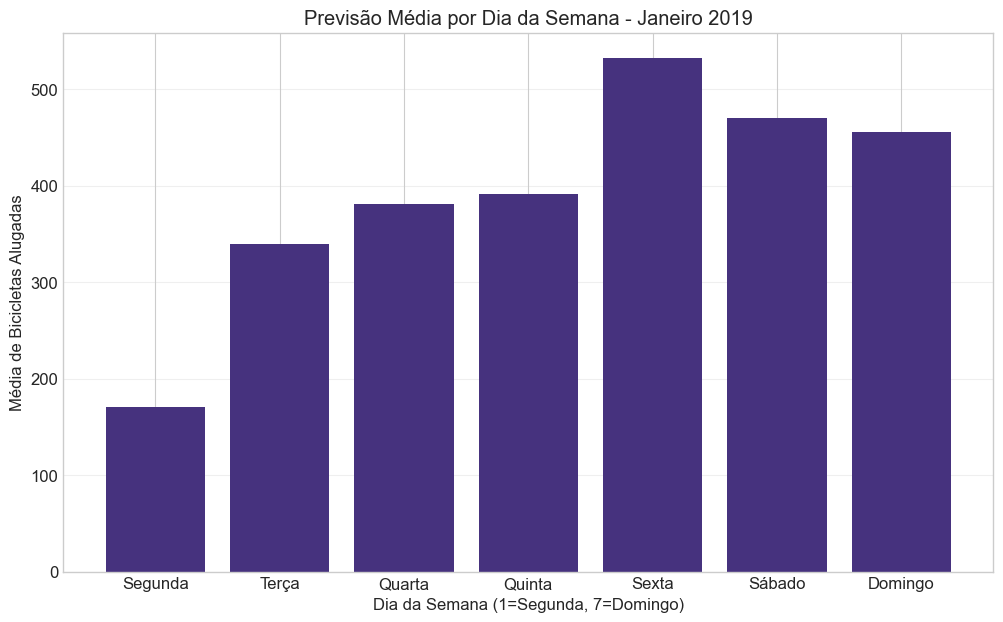

In [75]:
plt.figure(figsize=(12, 7))
weekday_predictions = future_df.groupby('Weekday')['Predicted_Bike_Count'].mean()
plt.bar(weekday_predictions.index, weekday_predictions.values)
plt.title('Previsão Média por Dia da Semana - Janeiro 2019')
plt.xlabel('Dia da Semana (1=Segunda, 7=Domingo)')
plt.ylabel('Média de Bicicletas Alugadas')
plt.xticks(range(1, 8), ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.grid(True, alpha=0.3, axis='y')
plt.show()

---
## Heatmap da Previsão de Aluguéis por Hora e Dia do Mês (Janeiro 2019)

Este heatmap (mapa de calor) fornece uma visão abrangente e consolidada da intensidade prevista de uso das bicicletas ao longo de todo o mês de janeiro de 2019. Ele cruza cada dia do mês (no eixo Y) com cada hora do dia (no eixo X), utilizando cores para representar o volume de aluguéis previstos.

**Análise do Gráfico:**

Analisando o heatmap, onde **tons mais escuros indicam um maior volume de aluguéis previstos e tons mais claros representam menor demanda**, podemos identificar padrões importantes:

* **Picos Diários de Deslocamento:**
    * Consistentemente na maioria dos dias, observamos "manchas quentes" em horários específicos. Destacam-se os períodos por volta das **8h da manhã** e, de forma ainda mais pronunciada, às **18h (6 da tarde)**. Este padrão é compatível com os horários típicos de deslocamento para trabalho ou estudo.
* **Baixa Demanda Noturna:** Durante a madrugada e início da manhã (aproximadamente de **0h às 5h**), o heatmap mostra cores consistentemente claras, indicando um volume de aluguéis previsto muito baixo em todos os dias do mês.
* **Diferenciação entre Dias Úteis e Finais de Semana:**
    * Os picos agudos das 8h e 18h são mais evidentes nos dias que correspondem a dias úteis.
    * Nos dias que seriam finais de semana (por exemplo, 5-6, 12-13, 19-20, 26-27 de janeiro), o padrão de cores se altera. As "manchas claras" dos horários de pico de deslocamento são menos intensas ou se dissipam, e pode-se notar uma atividade de aluguel (cores um pouco mais escuras) mais distribuída durante o período da tarde, condizente com um uso mais voltado ao lazer.
* **Consistência Mensal do Padrão Diário:** De forma geral, o padrão de picos nos horários de commute e baixa atividade noturna se repete ao longo dos dias do mês, com as variações sendo primariamente influenciadas pelo fato de ser um dia útil ou fim de semana.

Essa análise visual detalhada através do heatmap é extremamente valiosa. Ela não apenas confirma os padrões horários e semanais de forma consolidada para todo o mês previsto, mas também auxilia no planejamento operacional, como a alocação otimizada de frotas e a definição de estratégias de marketing ou manutenção direcionadas para períodos específicos de maior ou menor atividade.

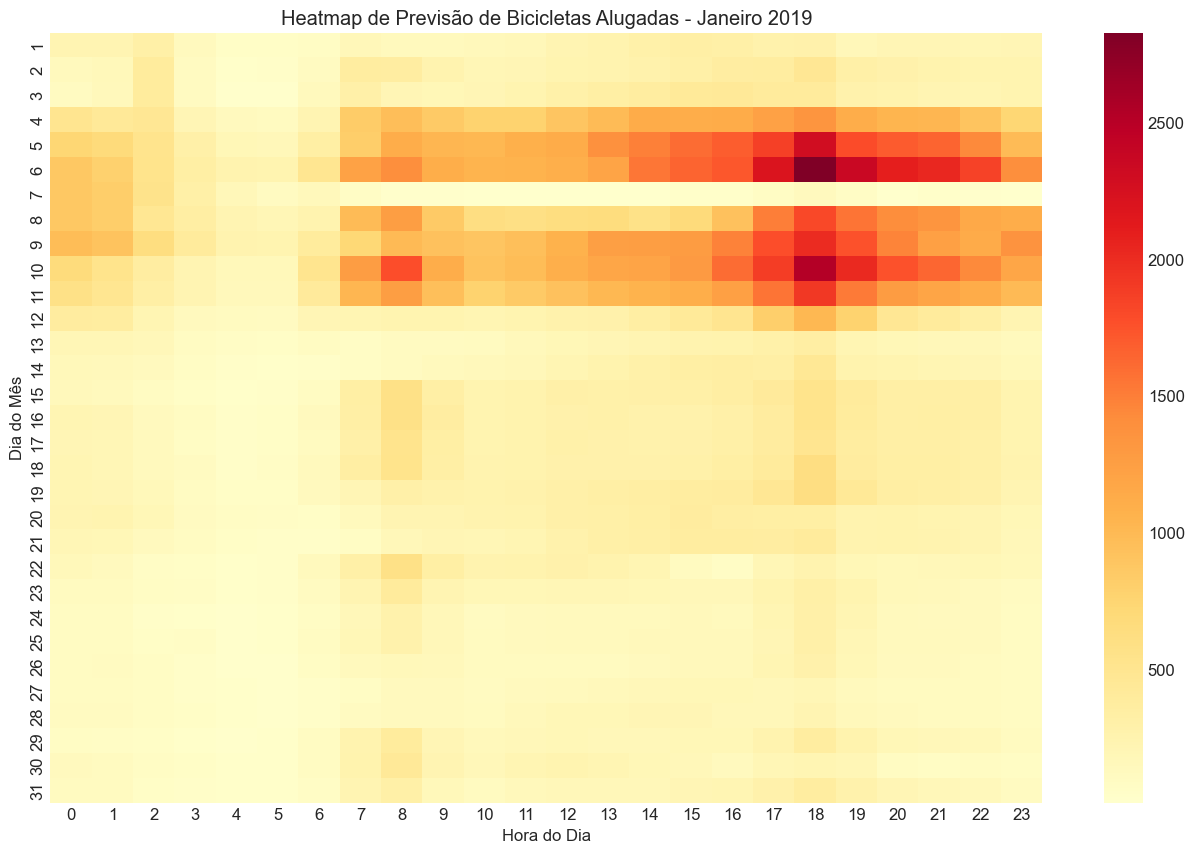

In [76]:
pivot_data = future_df.pivot_table(
    index='Day', 
    columns='Hour', 
    values='Predicted_Bike_Count',
    aggfunc='mean'
)

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=False)
plt.title('Heatmap de Previsão de Bicicletas Alugadas - Janeiro 2019')
plt.xlabel('Hora do Dia')
plt.ylabel('Dia do Mês')
plt.show()

---
## Distribuição das Previsões de Aluguel de Bicicletas para Janeiro de 2019

Para entender a natureza geral das previsões geradas pelo nosso modelo temporal para janeiro de 2019, construí um **histograma** da coluna `Predicted_Bike_Count`. Este gráfico é acompanhado por uma curva de densidade (KDE), que suaviza as barras do histograma e ajuda a visualizar a tendência central e a dispersão dos valores previstos.

**Interpretação do Gráfico:**

Analisando a distribuição das previsões, podemos observar os seguintes pontos:

* **Concentração de Previsões:** A maior parte das previsões horárias para o aluguel de bicicletas em janeiro de 2019 está concentrada na faixa de **aproximadamente 0 a 600 bicicletas por hora**. O pico mais alto da distribuição encontra-se claramente neste intervalo, sugerindo que um volume de demanda dentro dessa faixa é o mais frequentemente previsto pelo modelo.
* **Presença de Valores Extremos:** O histograma e a curva KDE mostram que o modelo também prevê:
    * **Valores muito baixos:** Próximos de zero, o que é esperado para horários de baixíssima atividade (como durante a madrugada).
    * **Valores significativamente altos:** A distribuição se estende para a direita, com previsões que chegam a ultrapassar 2.500 bicicletas em determinados momentos. Isso indica que o modelo está capturando os picos de demanda (por exemplo, nos horários de deslocamento em dias úteis).
* **Assimetria Positiva (à Direita):** A forma da distribuição é **assimétrica à direita**. Isso significa que, embora a maioria das previsões seja de valores mais baixos a moderados, a "cauda" da distribuição se estende para valores mais elevados, refletindo a ocorrência (menos frequente, mas existente) desses picos de alta demanda.

**Utilidade desta Análise:**
Esta visualização da distribuição das previsões é útil para:
* Confirmar se as previsões estão dentro de uma faixa esperada e plausível.
* Identificar a tendência central e a dispersão das previsões, o que pode ajudar a entender o comportamento geral esperado do sistema.
* Auxiliar na gestão da oferta e na alocação de bicicletas ao longo do mês, ao fornecer uma ideia da frequência de diferentes níveis de demanda.



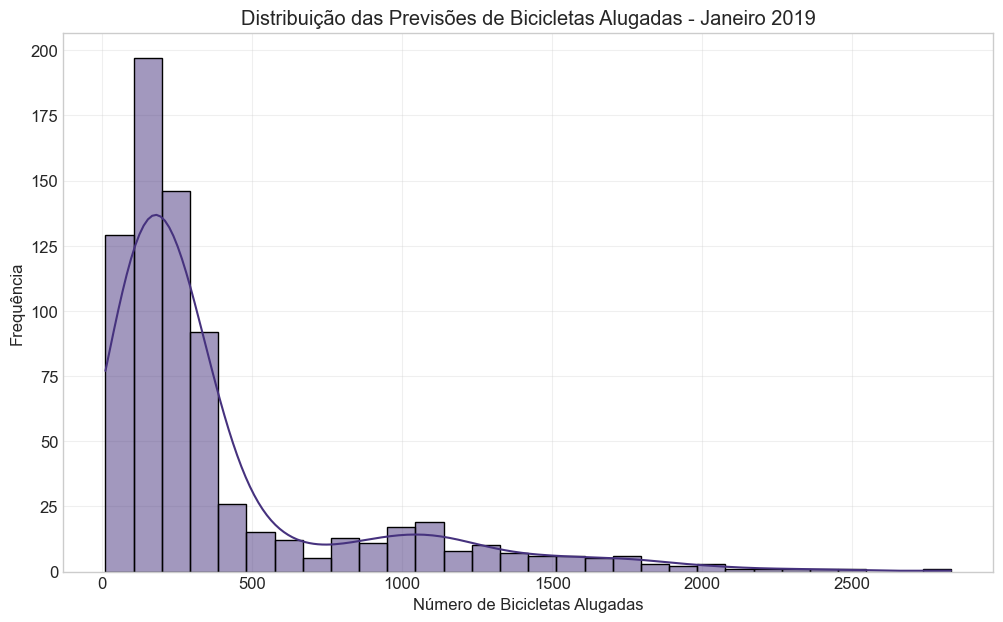

In [77]:
plt.figure(figsize=(12, 7))
sns.histplot(future_df['Predicted_Bike_Count'], kde=True, bins=30)
plt.title('Distribuição das Previsões de Bicicletas Alugadas - Janeiro 2019')
plt.xlabel('Número de Bicicletas Alugadas')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

## **_Conclusão (Somativa 1)_**

Este projeto, referente à primeira parte do desafio proposto pela disciplina de **_Técnicas de Machine Learning_**, teve como objetivo central aplicar um fluxo de trabalho de aprendizado de máquina para analisar e prever a demanda por aluguel de bicicletas em Seul, utilizando o dataset `seoul_bike_data.xlsx`. Mais do que apenas alcançar um resultado preditivo, o foco foi demonstrar o raciocínio e a aplicação das técnicas aprendidas ao longo do processo.

**_Principais Etapas e Aprendizados do Processo:_**

A jornada iniciou-se com o carregamento e uma inspeção inicial dos dados, seguida por uma Análise Exploratória dos Dados (EDA) detalhada. Esta fase foi crucial para identificar as características intrínsecas do dataset, como a forte influência da hora do dia e da temperatura, a clara sazonalidade e o impacto de condições climáticas adversas (chuva, neve) na contagem de bicicletas alugadas.

Com base nesses insights, procedi com uma etapa robusta de Engenharia de Features, onde foram criadas variáveis derivadas (temporais cíclicas, flags para condições específicas, categorias de temperatura) com o intuito de fornecer aos modelos informações mais ricas e contextualizadas. O pré-processamento dos dados, incluindo a padronização de variáveis numéricas e a codificação one-hot de variáveis categóricas através de um `ColumnTransformer`, foi essencial para preparar os dados para a modelagem. Foi realizada também uma Análise de Componentes Principais (PCA) sobre as variáveis climáticas para explorar a redução de dimensionalidade, demonstrando o conhecimento sobre técnicas de extração de atributos, conforme solicitado.

Após a divisão dos dados em conjuntos de treino (75%) e teste (25%) com estratificação por estação, avaliei uma gama de algoritmos de regressão do `scikit-learn`. O `RandomForestRegressor` destacou-se, e após otimização de hiperparâmetros via `GridSearchCV`, alcançou um desempenho no conjunto de teste com **RMSE de aproximadamente 268.05 e R² de cerca de 0.8018**. A análise de importância das *features* deste modelo reforçou a relevância das variáveis temporais e climáticas.

A aplicação do modelo para **projetar a demanda para janeiro de 2019**, utilizando um subconjunto de *features* temporais, ilustrou uma aplicação prática da modelagem desenvolvida. Para este período futuro, o modelo previu um **total de aproximadamente 289.739 bicicletas alugadas**, com uma **média diária de cerca de 9.346 unidades**. As projeções também indicaram picos horários de demanda chegando a **2.829 bicicletas** e momentos de mínima demanda com apenas **11 bicicletas**, fornecendo uma visão quantitativa útil para o planejamento operacional.

**_Reflexões sobre o Desempenho e o Processo:_**

O desempenho do modelo `RandomForestRegressor` otimizado, explicando aproximadamente 80% da variância da demanda, é considerado satisfatório para esta primeira parte, especialmente considerando a complexidade inerente à previsão de comportamento humano influenciado por múltiplos fatores. A diferença entre o RMSE de treino e teste indica um certo grau de *overfitting*, um ponto comum em modelos de alta capacidade e que sinaliza oportunidades para refino.

Mais importante do que as métricas finais, este exercício permitiu aplicar e demonstrar um pipeline completo de machine learning, desde a compreensão do problema e dos dados, passando pela preparação e engenharia de features, até a modelagem, avaliação e interpretação de resultados, enfatizando a importância de cada etapa no processo de desenvolvimento.

---
## **_Referências_**

### **Livros e Materiais de Apoio**

1.  **_McKinney, W. (2022)._ *Python for Data Analysis* (3ª ed.). O'Reilly Media.**
    * *Utilizado como referência principal para manipulação e análise de dados com a biblioteca Pandas.*
2.  **_Géron, A. (2019)._ *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow* (2ª ed.). O'Reilly Media.** 
    * *Este livro oferece uma cobertura abrangente de muitos dos conceitos e técnicas de machine learning aplicados no projeto, incluindo modelos de regressão, ensembles (Random Forest, Gradient Boosting), pré-processamento, otimização de hiperparâmetros (GridSearchCV) e avaliação de modelos utilizando Scikit-Learn.*
3.  **_Material da disciplina_ "Técnicas de Machine Learning", ministrada pelo Prof. Wellington Rodrigo, Pontifícia Universidade Católica do Paraná (PUCPR).**
    * *Conteúdo disponibilizado para download, incluindo notas de aula, exemplos e direcionamentos que foram fundamentais para a aplicação das metodologias e desenvolvimento deste projeto.*

### **Documentação Oficial de Bibliotecas Python**

A documentação oficial de cada biblioteca é uma fonte primária indispensável para consulta sobre funcionalidades, parâmetros e exemplos de uso.

* **_Pandas:_** Para manipulação e análise de dados.
    * [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
* **_NumPy:_** Para computação numérica.
    * [https://numpy.org/doc/stable/](https://numpy.org/doc/stable/)
* **_Matplotlib:_** Para criação de gráficos.
    * [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)
* **_Seaborn:_** Para visualizações estatísticas.
    * [https://seaborn.pydata.org/](https://seaborn.pydata.org/)
* **_Scikit-learn:_** Para algoritmos de machine learning, pré-processamento e avaliação.
    * [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)
    * *Dentro desta documentação, seções específicas sobre `ColumnTransformer`, `StandardScaler`, `OneHotEncoder`, `PCA`, `GridSearchCV`, e os diversos modelos de regressão utilizados (`RandomForestRegressor`, `GradientBoostingRegressor`, etc.) foram consultadas.*
* **_Joblib:_** Para serialização de objetos Python (salvar/carregar modelos).
    * [https://joblib.readthedocs.io/](https://joblib.readthedocs.io/)

### **Fonte do Dataset**

* **_Seoul Bike Sharing Demand Data Set:_** Dua, D. and Graff, C. (2019). UCI Machine Learning Repository.
    * [https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)
    * **(_Nota:_ _A versão específica do dataset utilizada neste projeto foi disponibilizada pelo Prof. Wellington Rodrigo para a disciplina de "Técnicas de Machine Learning" na PUCPR e pode apresentar ligeiras alterações em relação à fonte original do UCI Machine Learning Repository)._**

### **Técnicas Específicas (Conceitos Gerais)**

* **_Engenharia de Features Cíclicas (Transformações Seno/Cosseno):_** A técnica de transformar variáveis temporais cíclicas (como hora, mês, dia da semana) usando funções seno e cosseno é uma prática comum em machine learning para representar adequadamente a sua natureza periódica. Este conceito é amplamente discutido em cursos de machine learning e materiais online sobre preparação de dados para séries temporais ou dados cíclicos.
* **_Análise de Componentes Principais (PCA):_** Técnica de extração de features e redução de dimensionalidade explorada neste trabalho, coberta em detalhe por livros texto de machine learning (como o de Géron) e na documentação do Scikit-learn.